# Author

1. Daniel Najoan **(First Author)**
2. Ghazali Akmal Rabbani **(Second Author)**
3. Muhammad Dhiaz Rafilianza **(Third Author)**

# EXPLORATORY DATA ANALYSIS

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings("ignore")

## 1. Data Extraction

In [ ]:
data = pd.read_csv('DataFrameTeamPositionNonGK_AllClub.csv')
data.head(2)

Unnamed: 0  sofifa_id  ...   rcb    rb
0           0     158023  ...  52+2  63+2
1           1      20801  ...  53+3  61+3

[2 rows x 105 columns]

# Delete column that will not be unused

In [ ]:
del_cols = [0,1,2,4,6,16,22,24,26,28,30,31,38,39,40,41,42,43,44]
new_data = data.drop(data.columns[del_cols],axis=1)

In [ ]:
new_data.head(2)

short_name  age  height_cm  weight_kg  ...   lcb    cb   rcb    rb
0           L. Messi   32        170         72  ...  52+2  52+2  52+2  63+2
1  Cristiano Ronaldo   34        187         83  ...  53+3  53+3  53+3  61+3

[2 rows x 86 columns]

## 2. EDA

### Summary Statistical Analysis

##### Information Analysis

Summary information of each column in dataframe

In [ ]:
new_data.describe()

age  ...  goalkeeping_reflexes
count  13690.000000  ...          13690.000000
mean      25.751132  ...             10.538130
std        4.404332  ...              3.121994
min       16.000000  ...              1.000000
25%       22.000000  ...              8.000000
50%       26.000000  ...             11.000000
75%       29.000000  ...             13.000000
max       42.000000  ...             48.000000

[8 rows x 52 columns]

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13690 entries, 0 to 13689
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  13690 non-null  object 
 1   age                         13690 non-null  int64  
 2   height_cm                   13690 non-null  int64  
 3   weight_kg                   13690 non-null  int64  
 4   nationality                 13690 non-null  object 
 5   club                        13690 non-null  object 
 6   overall                     13690 non-null  int64  
 7   potential                   13690 non-null  int64  
 8   value_eur                   13690 non-null  int64  
 9   wage_eur                    13690 non-null  int64  
 10  player_positions            13690 non-null  object 
 11  international_reputation    13690 non-null  int64  
 12  weak_foot                   13690 non-null  int64  
 13  skill_moves                 136

Based on the summary information in the above, there are **44 columns with integer type(int64)** and **8 columns with float type(float64)** which denotes **Numerical Column** and **34 columns with object type** which denotes **Categorical Column** .  And also there are **13690 data**

**Check for Missing Value**

There are some missing value in this dataset

In [ ]:
new_data.notnull().all().all()

False

##### **Statistical Numerical Analysis**

In [ ]:
new_data.describe()

age  ...  goalkeeping_reflexes
count  13690.000000  ...          13690.000000
mean      25.751132  ...             10.538130
std        4.404332  ...              3.121994
min       16.000000  ...              1.000000
25%       22.000000  ...              8.000000
50%       26.000000  ...             11.000000
75%       29.000000  ...             13.000000
max       42.000000  ...             48.000000

[8 rows x 52 columns]



*   **Count** is a total data of each column
*   **Mean** is an average of all the numbers
*   **std** or Standard Deviation is measurement to tell how a set of values spread out from their mean. A low Standard Deviation whows that the values are close to the mean and a high Standard Deviation shows a high diversion from the mean



##### **Statistical Categorical Analysis**

Create a list of categorical column and pass the value to **data_col_category** variable

In [ ]:
data_col_category = new_data.select_dtypes(include=['object']).columns.tolist()
data_col_category

['short_name',
 'nationality',
 'club',
 'player_positions',
 'work_rate',
 'body_type',
 'team_position',
 'loaned_from',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

Create a list of numerical column and pass the value to **data_col_numeric** variable

In [ ]:
data_col_numeric = new_data.select_dtypes(include=['int64']).columns.tolist()
data_col_numeric

['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

Create a list of float column and pass the value to **data_col_float** variable

In [ ]:
data_col_float = new_data.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['release_clause_eur',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

Indexing and selecting column with categorical value from main dataframe. And pass the value to **data_categorical** variable

In [ ]:
data_categorical = new_data[data_col_category]
data_categorical.head(2)

short_name nationality          club  ...    cb   rcb    rb
0           L. Messi   Argentina  FC Barcelona  ...  52+2  52+2  63+2
1  Cristiano Ronaldo    Portugal      Juventus  ...  53+3  53+3  61+3

[2 rows x 34 columns]

The result of categorical analysis from each categorical column in dataframe

In [ ]:
data_categorical.describe()

short_name nationality      club  ...     cb    rcb     rb
count          13690       13690     13690  ...  13690  13690  13690
unique         13112         156       696  ...    109    109     96
top     J. Rodríguez     England  Hobro IK  ...   63+2   63+2   63+2
freq               9        1203        21  ...    563    563    610

[4 rows x 34 columns]



*   **count** is total data of each column
*   **unique** is total of unique data in each column.
*   **top** is the most frequency or mode data in each column
*   **freq** is total of top data or mode data in each column.



### Univariate Analysis

#### Boxplot

Create a boxplot numerical function

In [ ]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(new_data[numerical]).set_title(numerical)
    median = new_data[numerical].median()
    FirstQuartile = new_data[numerical].quantile(0.25)
    ThirdQuartile = new_data[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(new_data[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in new_data[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(new_data[numerical], showfliers = False).set_title(numerical + ' No Outliers')

# Numerical Univariate Analysis

## Age Boxplot

Statistical Data Summary
Median :  26.0
1st Quartile :  22.0
3rd Quartile :  29.0
IQR :  7.0
Upper Fence :  39.5
Lower Fence :  11.5

Outliers Data Detection
Upper Outliers Data :  [40, 40, 40, 40, 40, 41, 41, 42]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


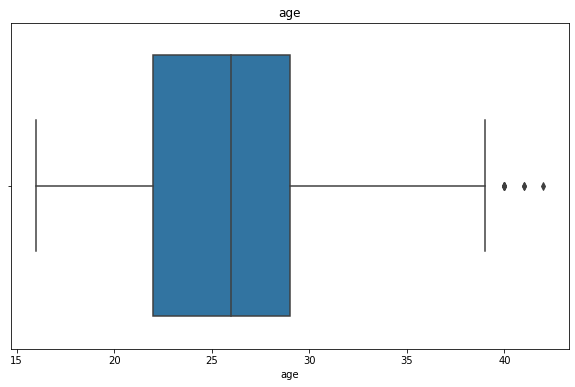

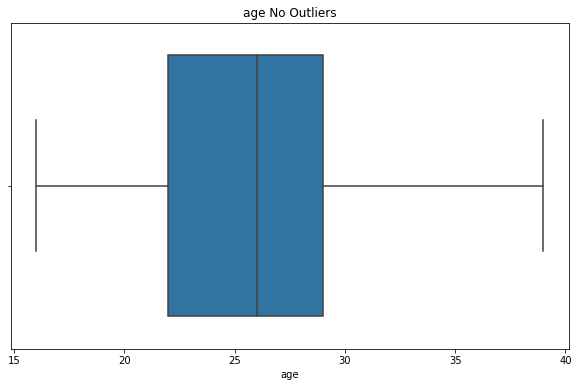

In [ ]:
boxplot_numerical(data_col_numeric[0])

## Height_cm Boxplot

Statistical Data Summary
Median :  180.0
1st Quartile :  176.0
3rd Quartile :  185.0
IQR :  9.0
Upper Fence :  198.5
Lower Fence :  162.5

Outliers Data Detection
Upper Outliers Data :  [199, 199, 199, 199, 199, 199, 200, 200, 200, 200, 201, 201, 201, 201, 201, 203, 203, 203]
Upper Outliers Status :  True
Lower Outliers Data :  [156, 157, 158, 158, 158, 159, 159, 160, 160, 160, 161, 161, 161, 161, 161, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162]
Lower Outliers Status :  True


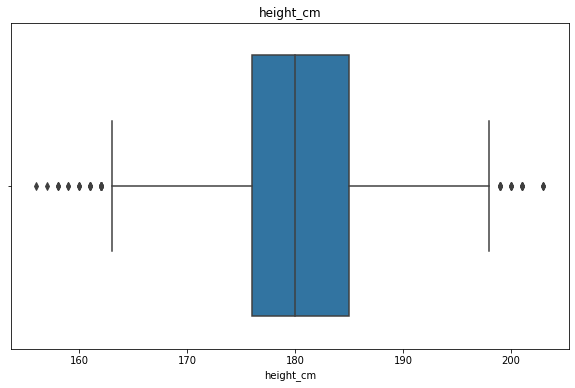

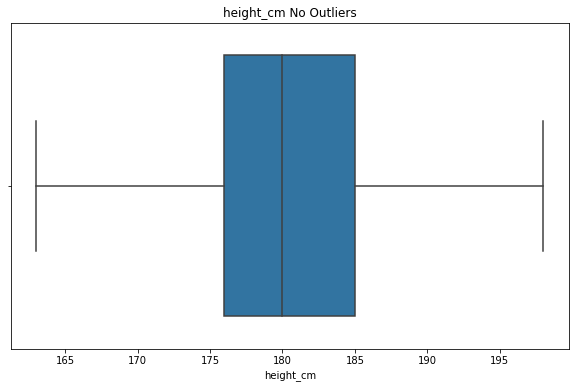

In [ ]:
boxplot_numerical(data_col_numeric[1])

## Weight_kg Boxplot

Statistical Data Summary
Median :  75.0
1st Quartile :  70.0
3rd Quartile :  79.0
IQR :  9.0
Upper Fence :  92.5
Lower Fence :  56.5

Outliers Data Detection
Upper Outliers Data :  [93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 97, 97, 97, 97, 97, 97, 98, 98, 98, 98, 99, 100, 101, 101, 101, 110]
Upper Outliers Status :  True
Lower Outliers Data :  [50, 52, 53, 54, 54, 54, 54, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]
Lower Outliers Status :  True


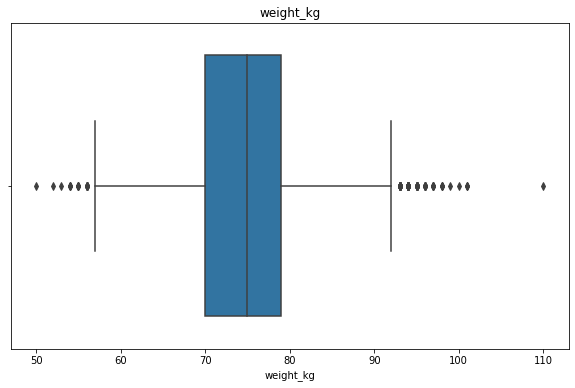

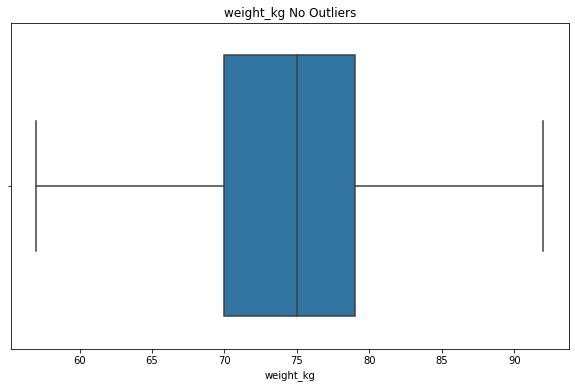

In [ ]:
boxplot_numerical(data_col_numeric[2])

## Overall Boxplot

Statistical Data Summary
Median :  67.0
1st Quartile :  63.0
3rd Quartile :  72.0
IQR :  9.0
Upper Fence :  85.5
Lower Fence :  49.5

Outliers Data Detection
Upper Outliers Data :  [86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 91, 91, 92, 93, 94]
Upper Outliers Status :  True
Lower Outliers Data :  [48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49]
Lower Outliers Status :  True


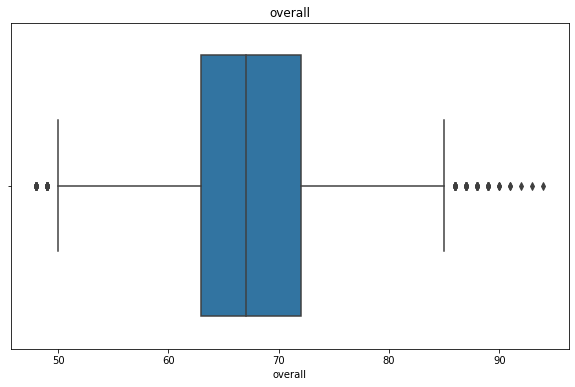

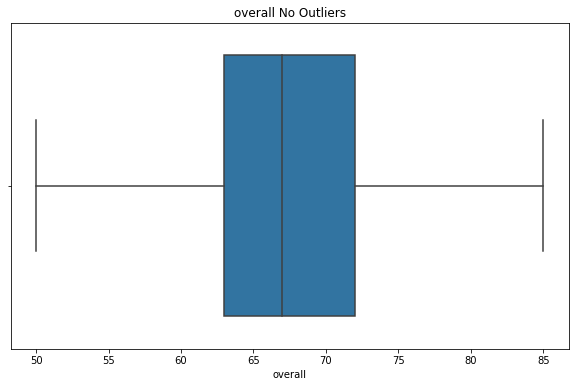

In [ ]:
boxplot_numerical(data_col_numeric[3])

## Potential Boxplot

Statistical Data Summary
Median :  71.0
1st Quartile :  68.0
3rd Quartile :  76.0
IQR :  8.0
Upper Fence :  88.0
Lower Fence :  56.0

Outliers Data Detection
Upper Outliers Data :  [89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 93, 93, 93, 94, 95]
Upper Outliers Status :  True
Lower Outliers Data :  [49, 50, 51, 51, 52, 52, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 55, 55, 55, 55]
Lower Outliers Status :  True


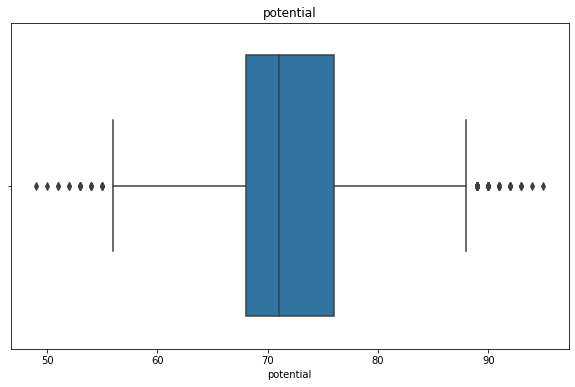

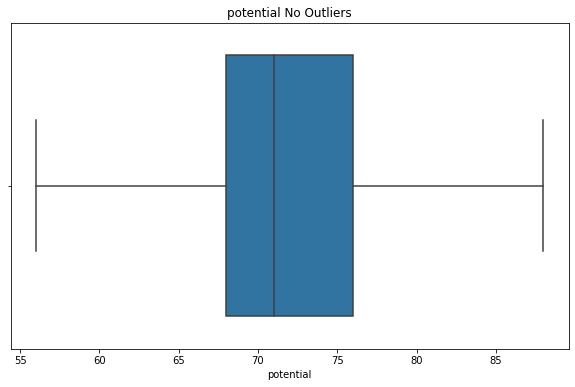

In [ ]:
boxplot_numerical(data_col_numeric[4])

## Value_eur Boxplot

Statistical Data Summary
Median :  850000.0
1st Quartile :  425000.0
3rd Quartile :  2700000.0
IQR :  2275000.0
Upper Fence :  6112500.0
Lower Fence :  -2987500.0

Outliers Data Detection
Upper Outliers Data :  [6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 6500000, 65000

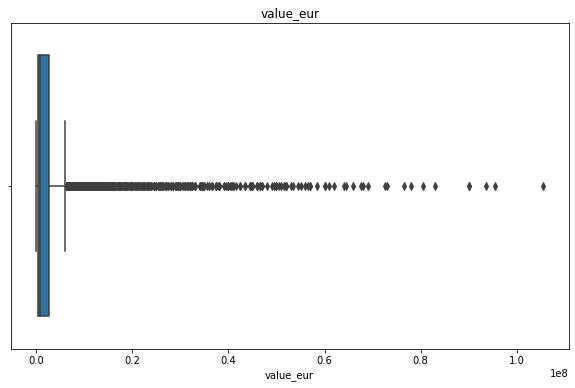

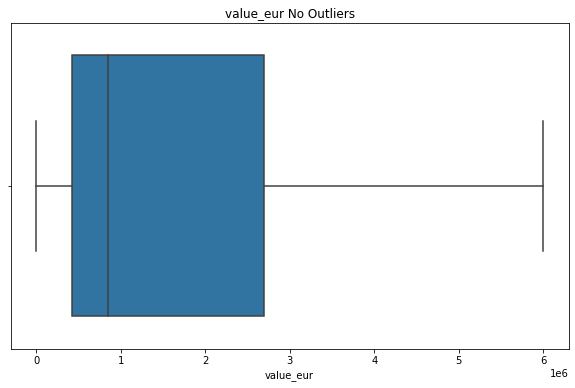

In [ ]:
boxplot_numerical(data_col_numeric[5])

## Wage_eur

Statistical Data Summary
Median :  3000.0
1st Quartile :  2000.0
3rd Quartile :  10000.0
IQR :  8000.0
Upper Fence :  22000.0
Lower Fence :  -10000.0

Outliers Data Detection
Upper Outliers Data :  [23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 24000, 240

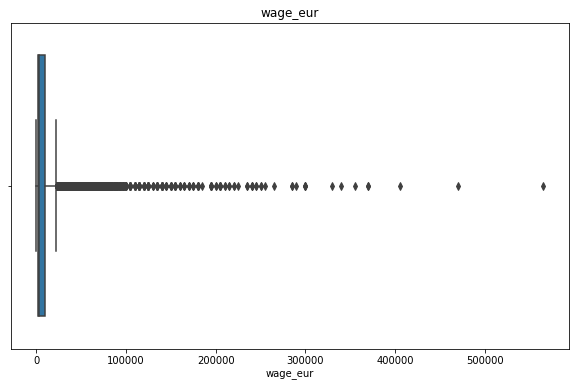

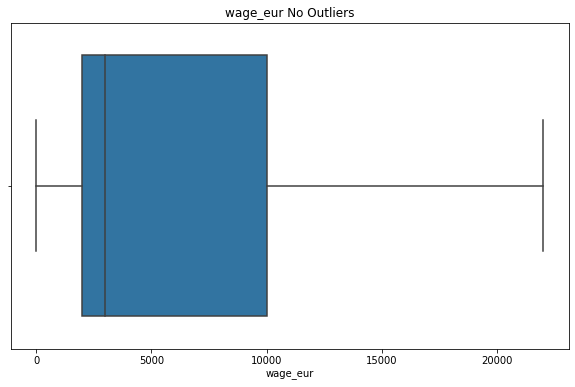

In [ ]:
boxplot_numerical(data_col_numeric[6])

## International_reputation Boxplot

Statistical Data Summary
Median :  1.0
1st Quartile :  1.0
3rd Quartile :  1.0
IQR :  0.0
Upper Fence :  1.0
Lower Fence :  1.0

Outliers Data Detection
Upper Outliers Data :  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

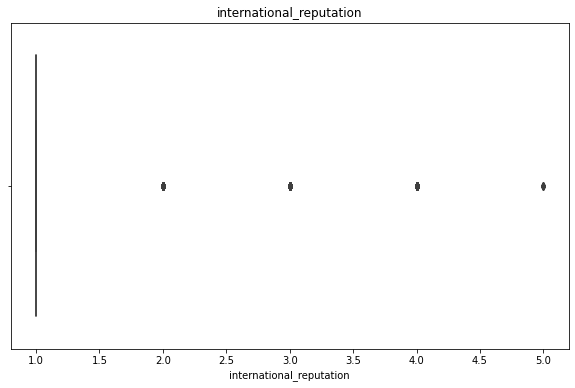

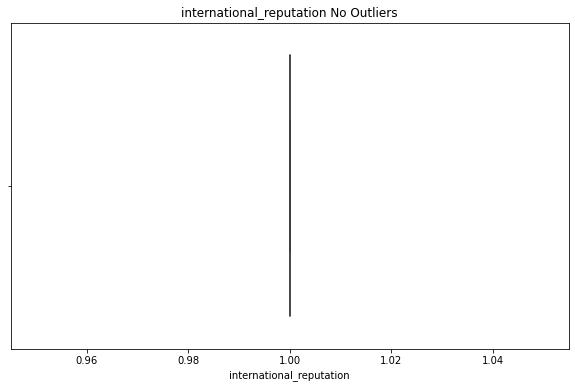

In [ ]:
boxplot_numerical(data_col_numeric[7])

## Weak_foot Boxplot

Statistical Data Summary
Median :  3.0
1st Quartile :  3.0
3rd Quartile :  3.0
IQR :  0.0
Upper Fence :  3.0
Lower Fence :  3.0

Outliers Data Detection
Upper Outliers Data :  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

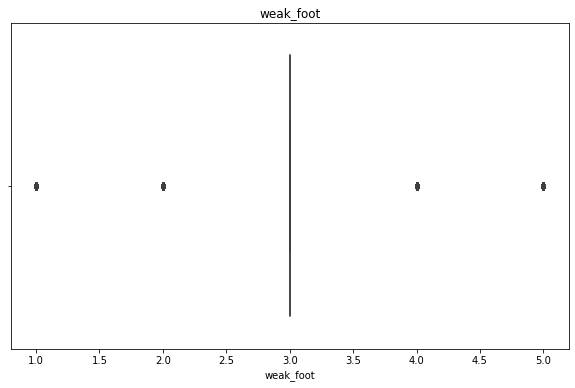

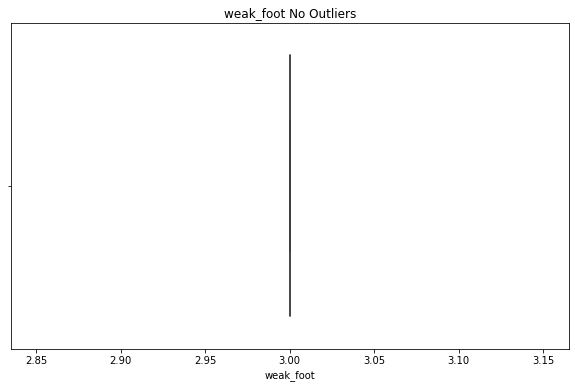

In [ ]:
boxplot_numerical(data_col_numeric[8])

## Skill_moves Boxplot

Statistical Data Summary
Median :  2.0
1st Quartile :  2.0
3rd Quartile :  3.0
IQR :  1.0
Upper Fence :  4.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


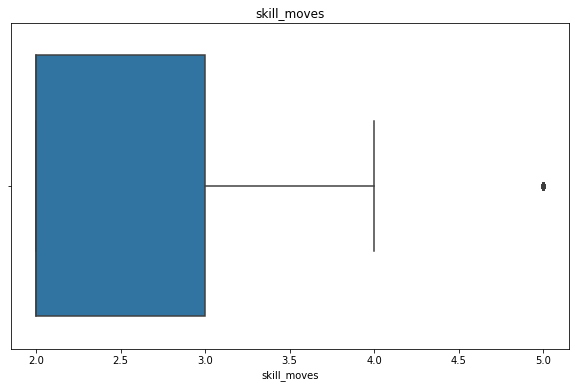

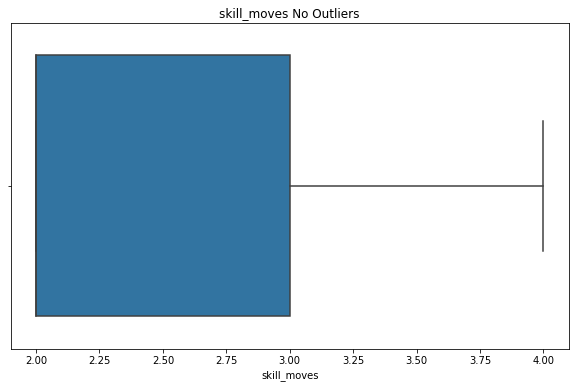

In [ ]:
boxplot_numerical(data_col_numeric[9])

## Attacking_crossing Boxplot

Statistical Data Summary
Median :  58.0
1st Quartile :  46.0
3rd Quartile :  65.0
IQR :  19.0
Upper Fence :  93.5
Lower Fence :  17.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [11, 11, 11, 14, 14, 15, 15, 15, 16, 17, 17, 17, 17, 17]
Lower Outliers Status :  True


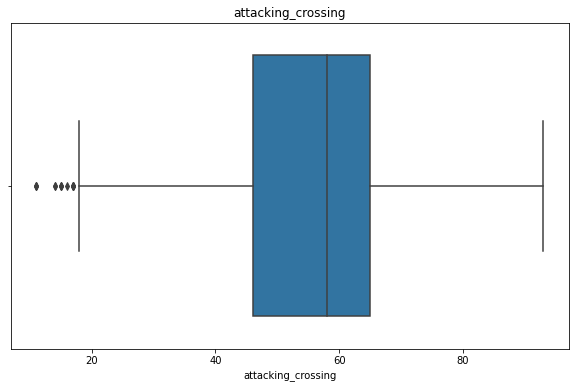

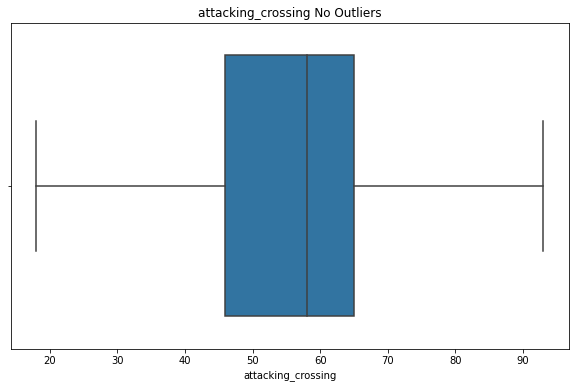

In [ ]:
boxplot_numerical(data_col_numeric[10])

## Attacking_finishing Boxplot

Statistical Data Summary
Median :  53.0
1st Quartile :  37.0
3rd Quartile :  64.0
IQR :  27.0
Upper Fence :  104.5
Lower Fence :  -3.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


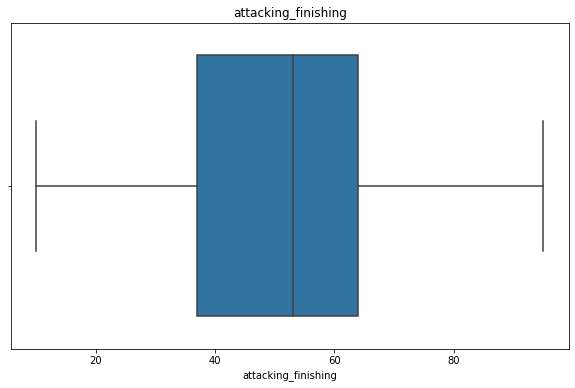

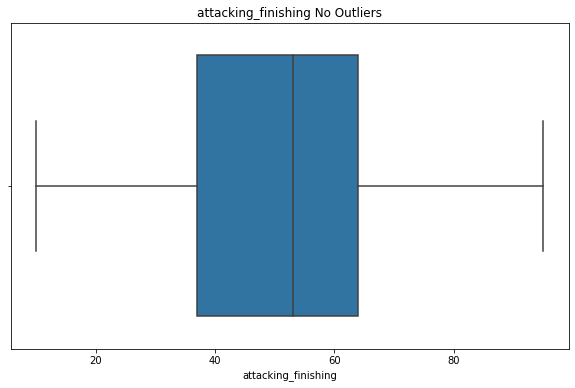

In [ ]:
boxplot_numerical(data_col_numeric[11])

## Attacking_heading_accuracy

Statistical Data Summary
Median :  58.0
1st Quartile :  50.0
3rd Quartile :  66.0
IQR :  16.0
Upper Fence :  90.0
Lower Fence :  26.0

Outliers Data Detection
Upper Outliers Data :  [91, 91, 92, 92, 92, 93, 93, 93]
Upper Outliers Status :  True
Lower Outliers Data :  [12, 18, 18, 19, 20, 20, 22, 22, 22, 22, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25]
Lower Outliers Status :  True


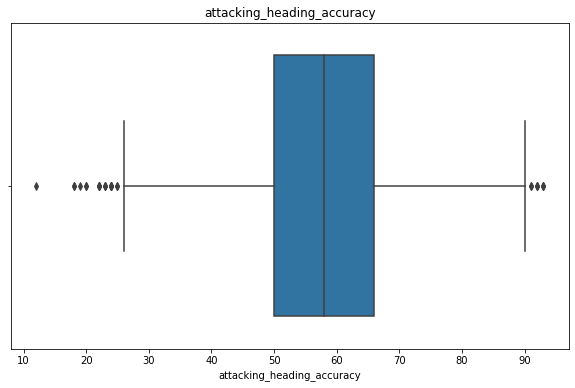

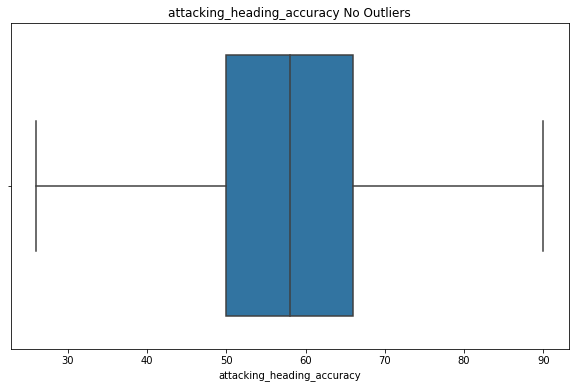

In [ ]:
boxplot_numerical(data_col_numeric[12])

## Attacking_short_passing Boxplot

Statistical Data Summary
Median :  64.0
1st Quartile :  58.0
3rd Quartile :  70.0
IQR :  12.0
Upper Fence :  88.0
Lower Fence :  40.0

Outliers Data Detection
Upper Outliers Data :  [89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 91, 91, 91, 91, 92, 92, 92, 92]
Upper Outliers Status :  True
Lower Outliers Data :  [25, 25, 25, 25, 26, 26, 26, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,

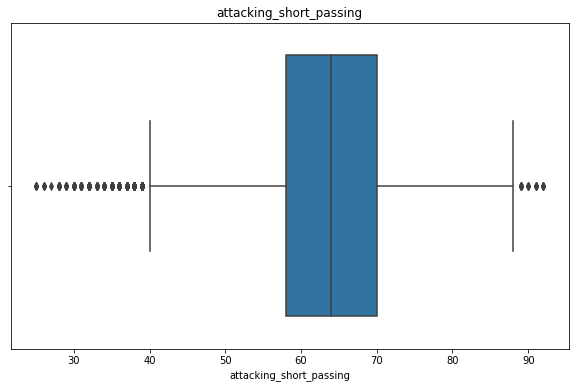

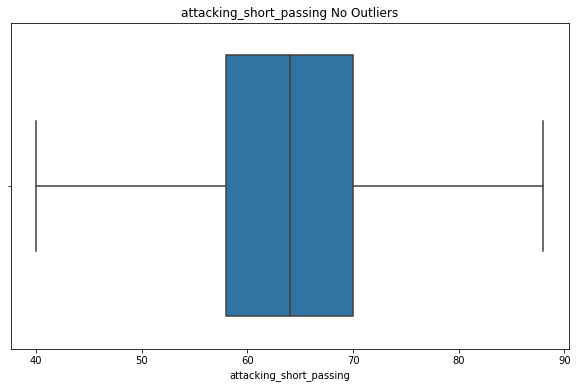

In [ ]:
boxplot_numerical(data_col_numeric[13])

## Attacking_volleys Boxplot

Statistical Data Summary
Median :  48.0
1st Quartile :  35.0
3rd Quartile :  59.0
IQR :  24.0
Upper Fence :  95.0
Lower Fence :  -1.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


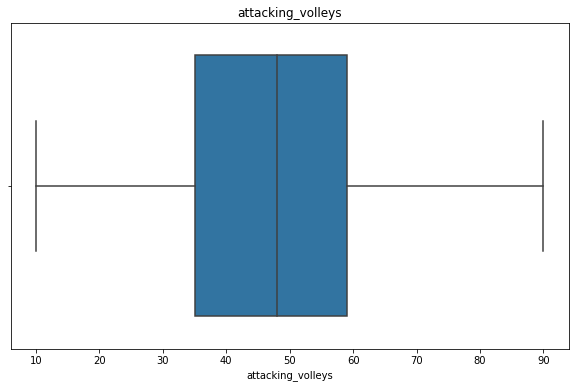

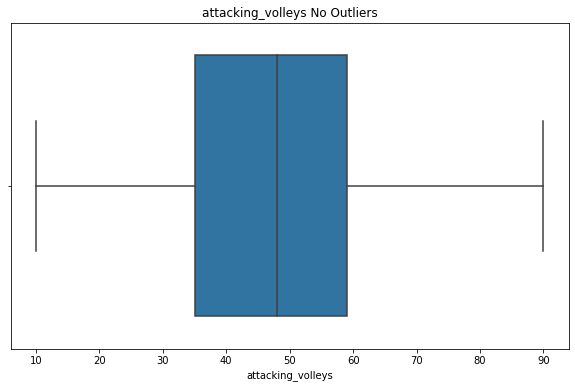

In [ ]:
boxplot_numerical(data_col_numeric[14])

## Skill_dribbling Boxplot

Statistical Data Summary
Median :  63.0
1st Quartile :  56.0
3rd Quartile :  70.0
IQR :  14.0
Upper Fence :  91.0
Lower Fence :  35.0

Outliers Data Detection
Upper Outliers Data :  [92, 92, 92, 92, 95, 96, 97]
Upper Outliers Status :  True
Lower Outliers Data :  [16, 16, 17, 18, 18, 18, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,

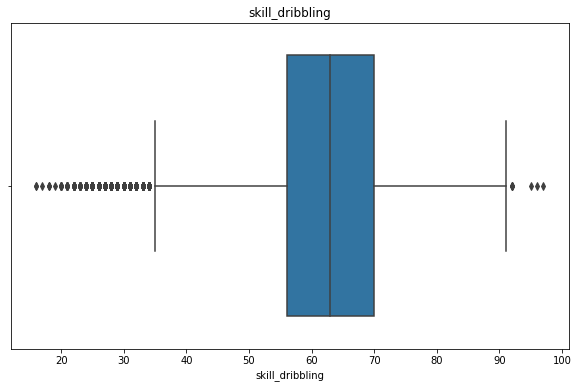

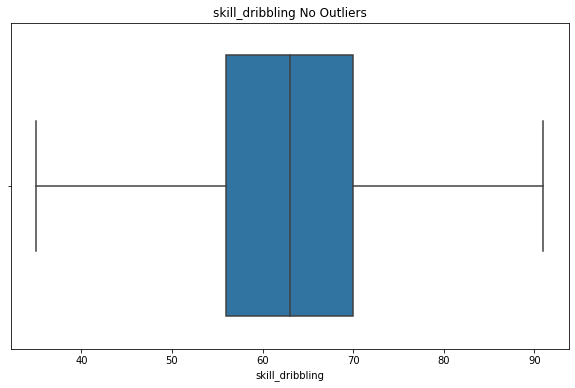

In [ ]:
boxplot_numerical(data_col_numeric[15])

## Skill_curve

Statistical Data Summary
Median :  53.0
1st Quartile :  41.0
3rd Quartile :  64.0
IQR :  23.0
Upper Fence :  98.5
Lower Fence :  6.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


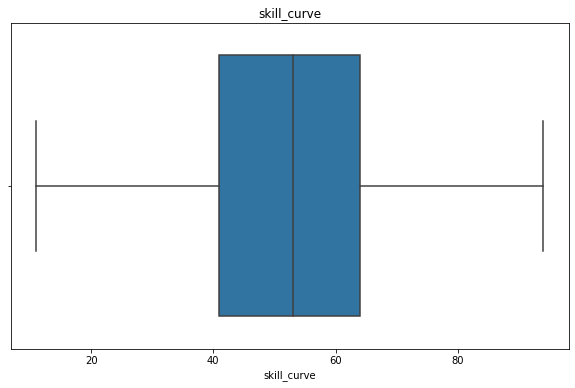

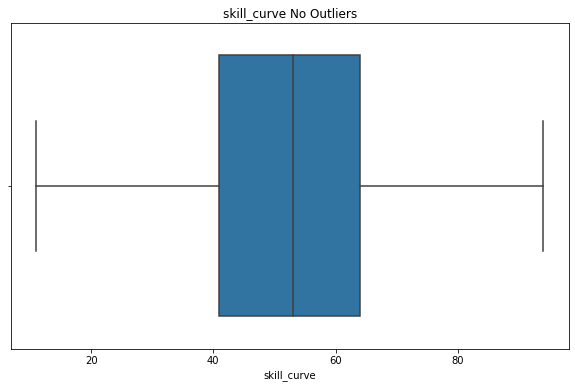

In [ ]:
boxplot_numerical(data_col_numeric[16])

## Skill_fk_accuracy Boxplot

Statistical Data Summary
Median :  45.0
1st Quartile :  35.0
3rd Quartile :  59.0
IQR :  24.0
Upper Fence :  95.0
Lower Fence :  -1.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


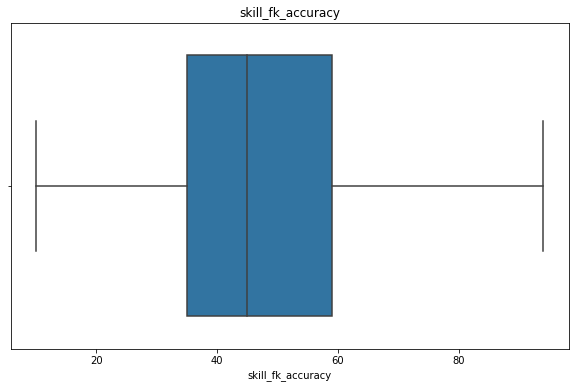

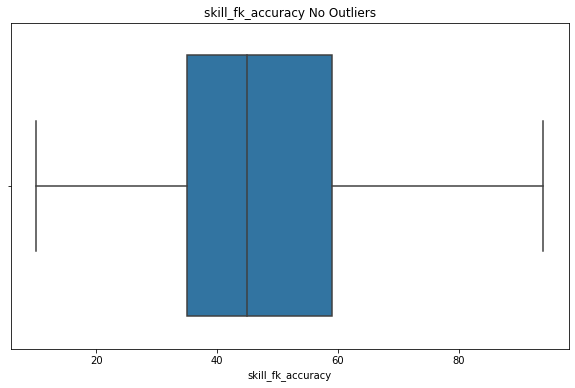

In [ ]:
boxplot_numerical(data_col_numeric[17])

## Skill_long_passing

Statistical Data Summary
Median :  59.0
1st Quartile :  50.0
3rd Quartile :  65.0
IQR :  15.0
Upper Fence :  87.5
Lower Fence :  27.5

Outliers Data Detection
Upper Outliers Data :  [88, 88, 89, 89, 89, 90, 90, 91, 92, 92]
Upper Outliers Status :  True
Lower Outliers Data :  [19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]
Lower O

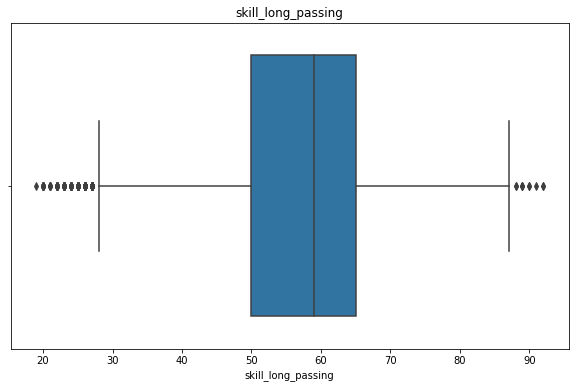

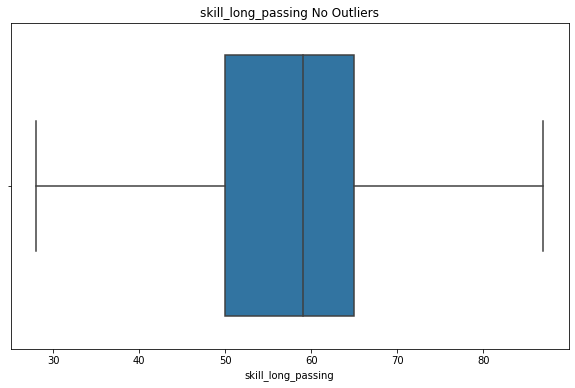

In [ ]:
boxplot_numerical(data_col_numeric[18])

## Skill_ball_control

Statistical Data Summary
Median :  65.0
1st Quartile :  59.0
3rd Quartile :  70.0
IQR :  11.0
Upper Fence :  86.5
Lower Fence :  42.5

Outliers Data Detection
Upper Outliers Data :  [87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 90, 90, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 93, 93, 93, 94, 95, 96]
Upper Outliers Status :  True
Lower Outliers Data :  [24, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35,

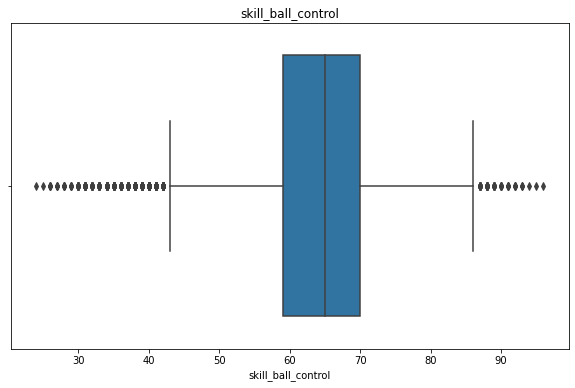

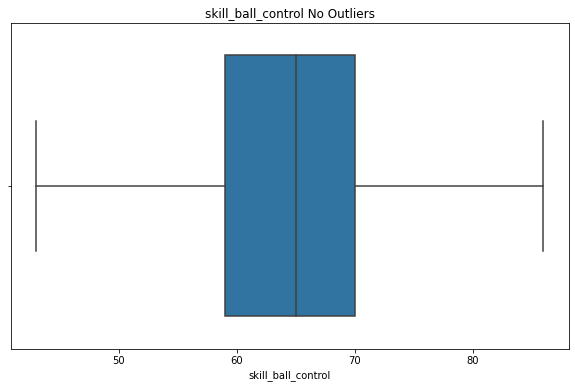

In [ ]:
boxplot_numerical(data_col_numeric[19])

## Movement_acceleration Boxplot

Statistical Data Summary
Median :  69.0
1st Quartile :  61.0
3rd Quartile :  76.0
IQR :  15.0
Upper Fence :  98.5
Lower Fence :  38.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [20, 24, 25, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 

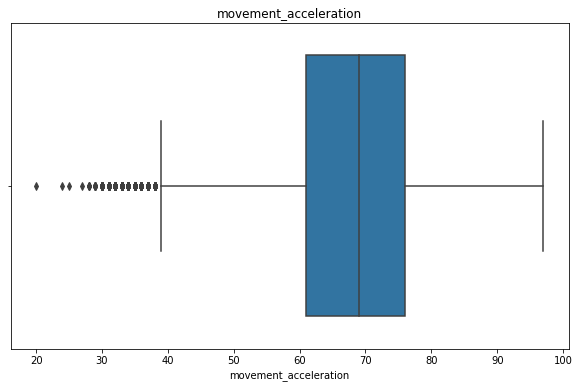

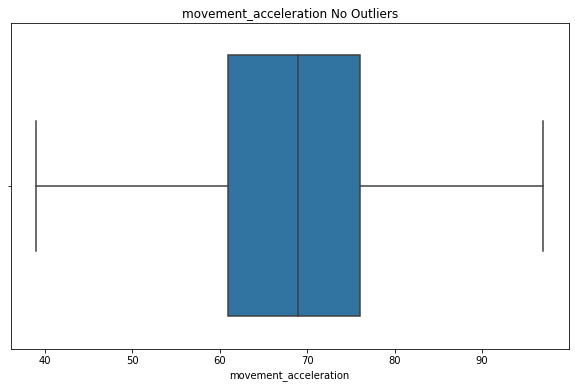

In [ ]:
boxplot_numerical(data_col_numeric[20])

## Movement_sprint_speed Boxplot

Statistical Data Summary
Median :  69.0
1st Quartile :  62.0
3rd Quartile :  76.0
IQR :  14.0
Upper Fence :  97.0
Lower Fence :  41.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [25, 25, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 

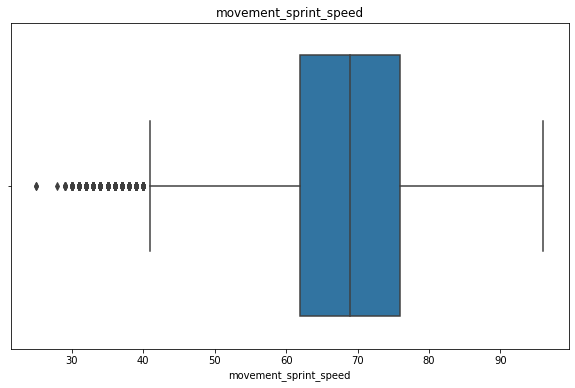

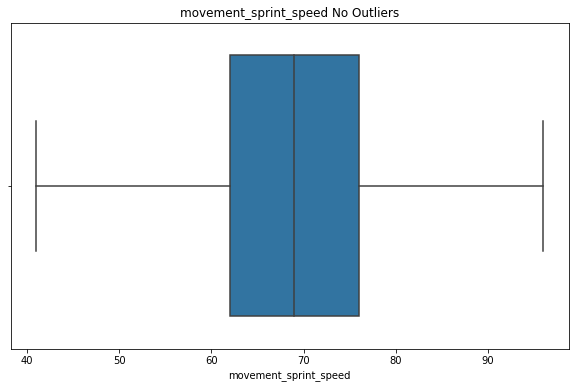

In [ ]:
boxplot_numerical(data_col_numeric[21])

## Movement_agility Boxplot

Statistical Data Summary
Median :  68.0
1st Quartile :  60.0
3rd Quartile :  75.0
IQR :  15.0
Upper Fence :  97.5
Lower Fence :  37.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [23, 26, 26, 26, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 

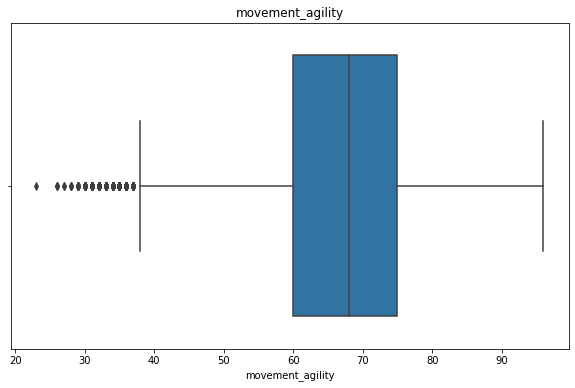

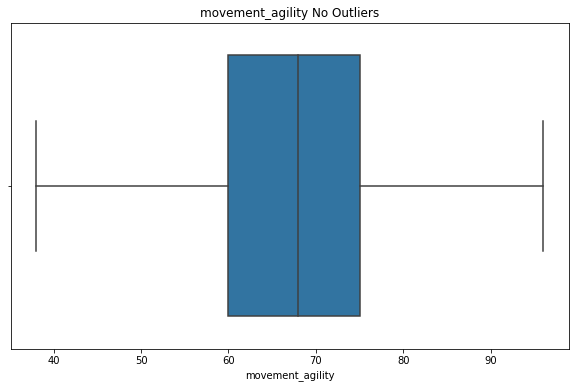

In [ ]:
boxplot_numerical(data_col_numeric[22])

## Movement_reactions Boxplot

Statistical Data Summary
Median :  63.0
1st Quartile :  58.0
3rd Quartile :  69.0
IQR :  11.0
Upper Fence :  85.5
Lower Fence :  41.5

Outliers Data Detection
Upper Outliers Data :  [86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 89, 89, 90, 90, 90, 91, 91, 91, 91, 92, 92, 92, 92, 92, 93, 95, 96]
Upper Outliers Status :  True
Lower Outliers Data :  [31, 31, 32, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]
Lower Outliers Status :  True


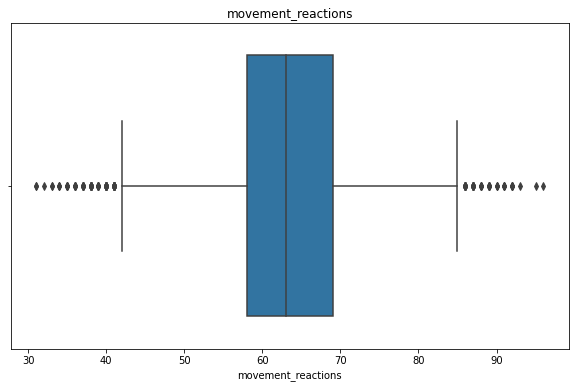

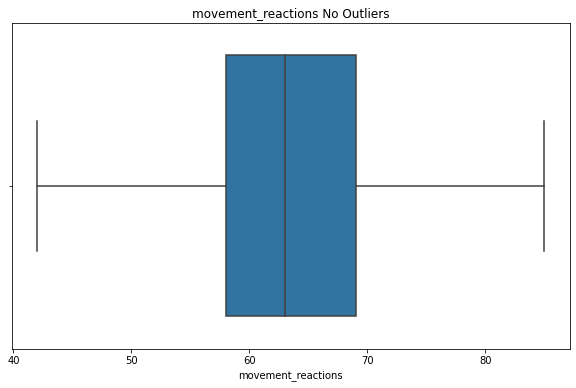

In [ ]:
boxplot_numerical(data_col_numeric[23])

## Movement_balance Boxplot

Statistical Data Summary
Median :  68.0
1st Quartile :  60.0
3rd Quartile :  75.0
IQR :  15.0
Upper Fence :  97.5
Lower Fence :  37.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [22, 26, 27, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 

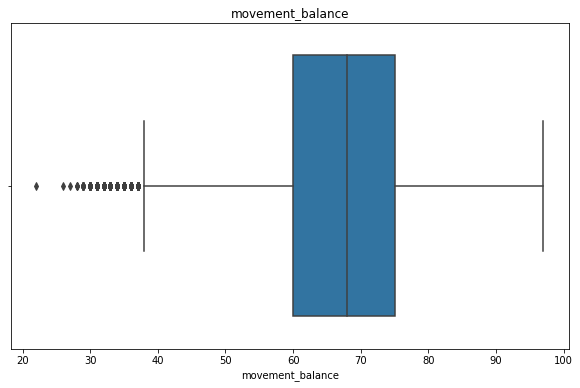

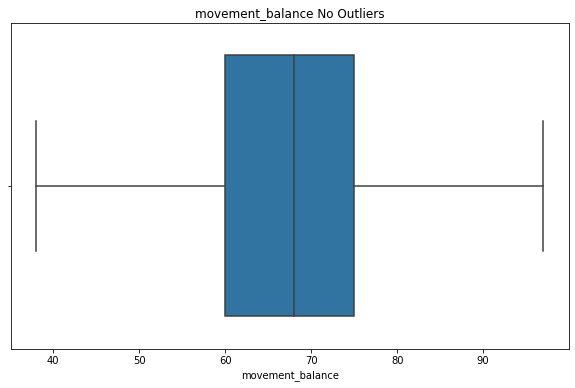

In [ ]:
boxplot_numerical(data_col_numeric[24])

## Power_shot_power Boxplot

Statistical Data Summary
Median :  63.0
1st Quartile :  52.0
3rd Quartile :  70.0
IQR :  18.0
Upper Fence :  97.0
Lower Fence :  25.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [14, 15, 16, 17, 18, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]
Lower Outliers Status :  True


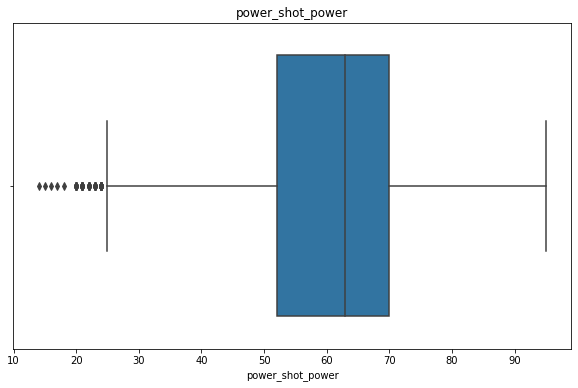

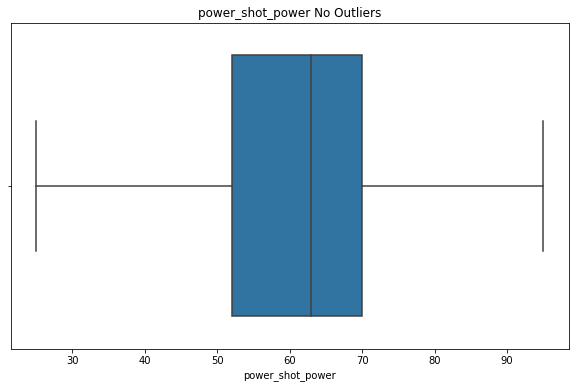

In [ ]:
boxplot_numerical(data_col_numeric[25])

## Power_jumping Boxplot

Statistical Data Summary
Median :  67.0
1st Quartile :  60.0
3rd Quartile :  74.0
IQR :  14.0
Upper Fence :  95.0
Lower Fence :  39.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [25, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 

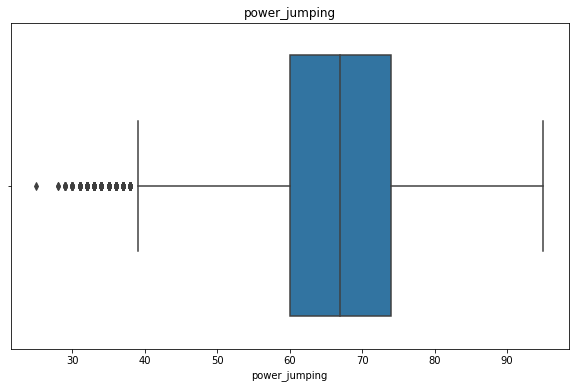

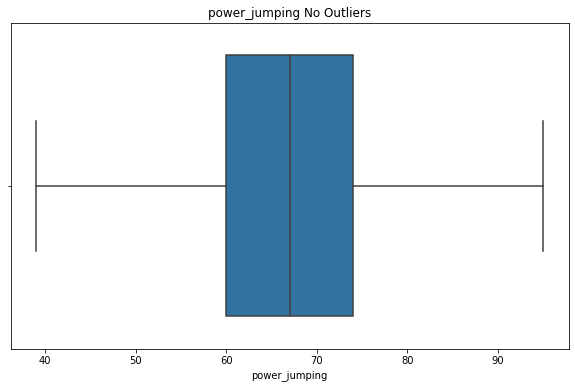

In [ ]:
boxplot_numerical(data_col_numeric[26])

## Power_stamina Boxplot

Statistical Data Summary
Median :  69.0
1st Quartile :  62.0
3rd Quartile :  75.0
IQR :  13.0
Upper Fence :  94.5
Lower Fence :  42.5

Outliers Data Detection
Upper Outliers Data :  [95, 95, 95, 96, 97]
Upper Outliers Status :  True
Lower Outliers Data :  [29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37,

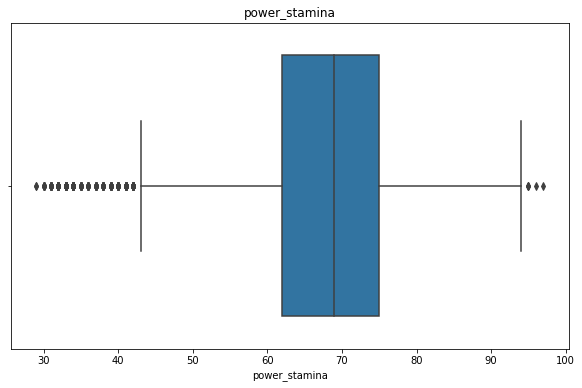

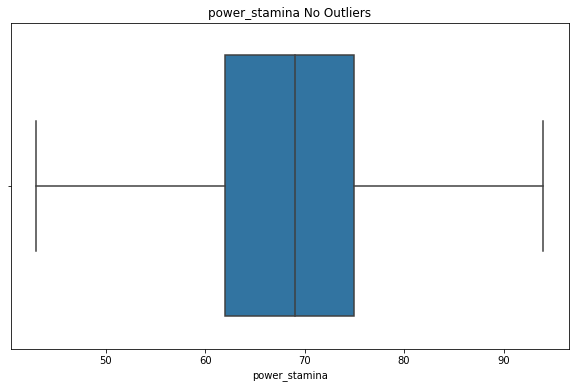

In [ ]:
boxplot_numerical(data_col_numeric[27])

## Power_strength Boxplot

Statistical Data Summary
Median :  68.0
1st Quartile :  60.0
3rd Quartile :  75.0
IQR :  15.0
Upper Fence :  97.5
Lower Fence :  37.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [20, 22, 25, 25, 27, 27, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 

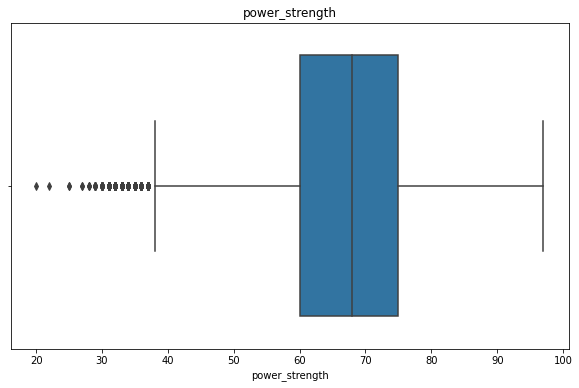

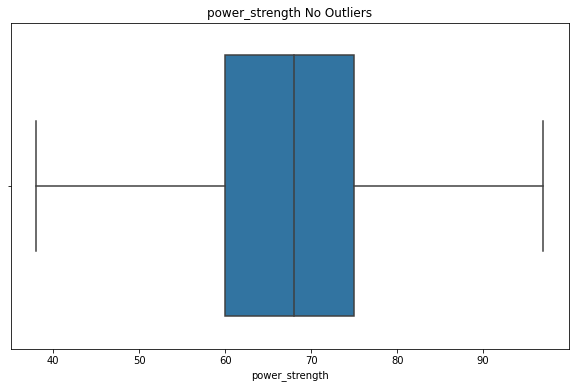

In [ ]:
boxplot_numerical(data_col_numeric[28])

## Power_long_shots Boxplot

Statistical Data Summary
Median :  55.0
1st Quartile :  41.0
3rd Quartile :  64.0
IQR :  23.0
Upper Fence :  98.5
Lower Fence :  6.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


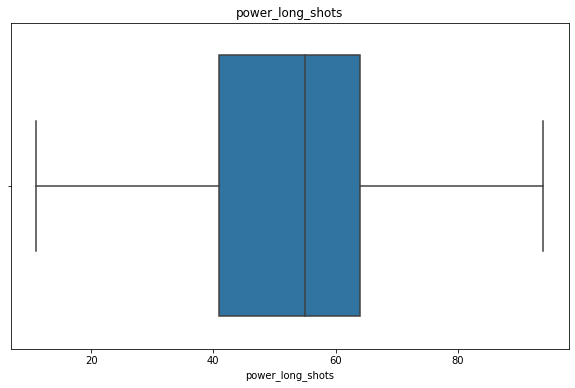

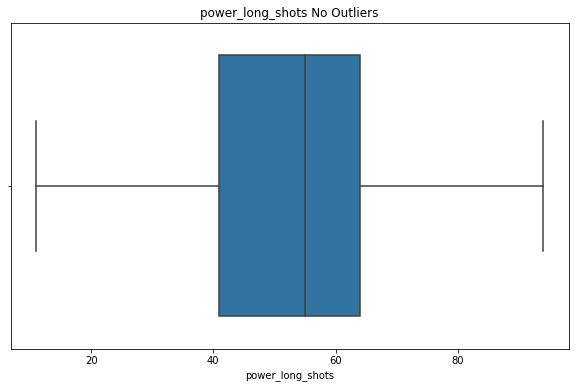

In [ ]:
boxplot_numerical(data_col_numeric[29])

## Mentality_aggression Boxplot

Statistical Data Summary
Median :  62.0
1st Quartile :  51.0
3rd Quartile :  71.0
IQR :  20.0
Upper Fence :  101.0
Lower Fence :  21.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [10, 14, 16, 17, 19, 20, 20]
Lower Outliers Status :  True


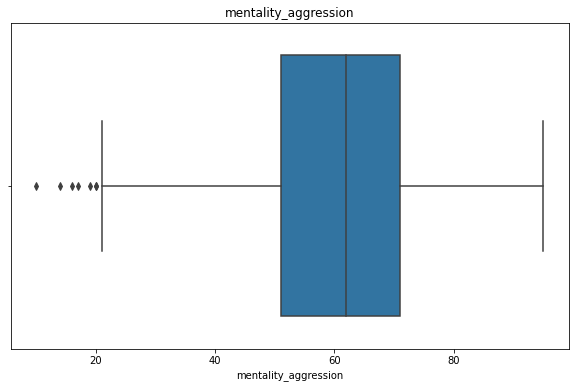

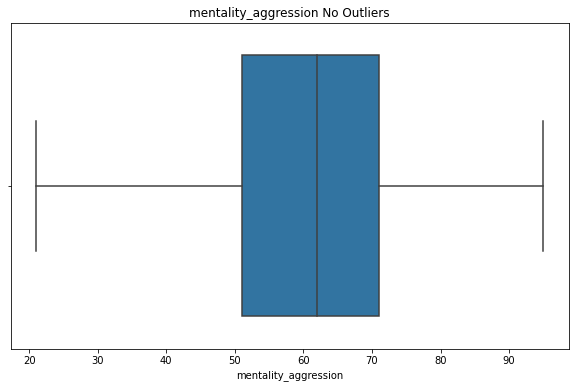

In [ ]:
boxplot_numerical(data_col_numeric[30])

## Mentality_interceptions Boxplot

Statistical Data Summary
Median :  57.0
1st Quartile :  35.0
3rd Quartile :  66.0
IQR :  31.0
Upper Fence :  112.5
Lower Fence :  -11.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


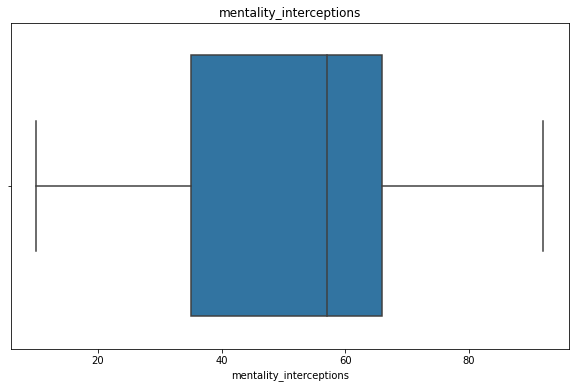

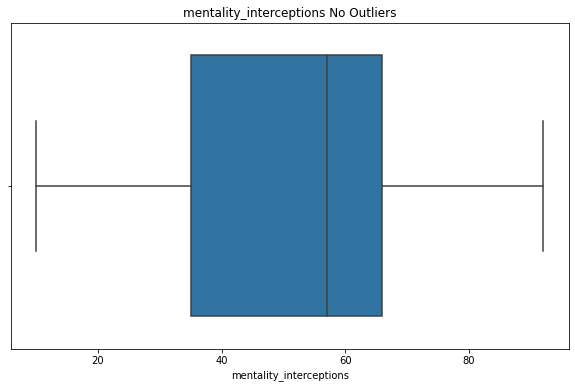

In [ ]:
boxplot_numerical(data_col_numeric[31])

## Mentality_positioning Boxplot

Statistical Data Summary
Median :  58.0
1st Quartile :  48.0
3rd Quartile :  66.0
IQR :  18.0
Upper Fence :  93.0
Lower Fence :  21.0

Outliers Data Detection
Upper Outliers Data :  [94, 95]
Upper Outliers Status :  True
Lower Outliers Data :  [11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Lower Outliers Status :  True


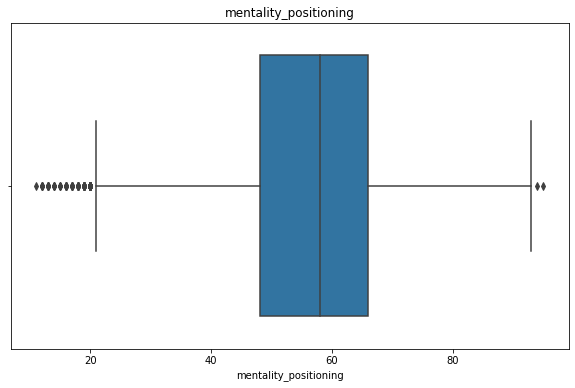

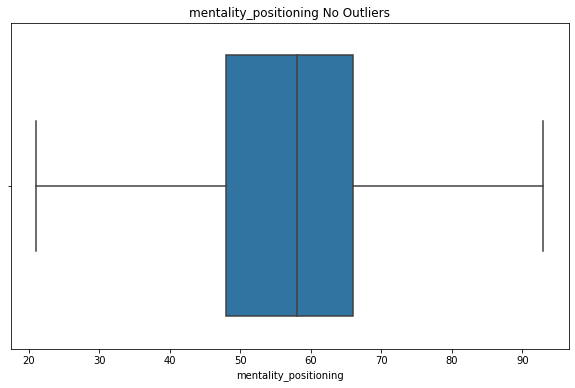

In [ ]:
boxplot_numerical(data_col_numeric[32])

## Mentality_vision Boxplot

Statistical Data Summary
Median :  58.0
1st Quartile :  48.0
3rd Quartile :  65.0
IQR :  17.0
Upper Fence :  90.5
Lower Fence :  22.5

Outliers Data Detection
Upper Outliers Data :  [91, 91, 92, 94, 94]
Upper Outliers Status :  True
Lower Outliers Data :  [12, 13, 14, 14, 14, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
Lower Outliers Status :  True


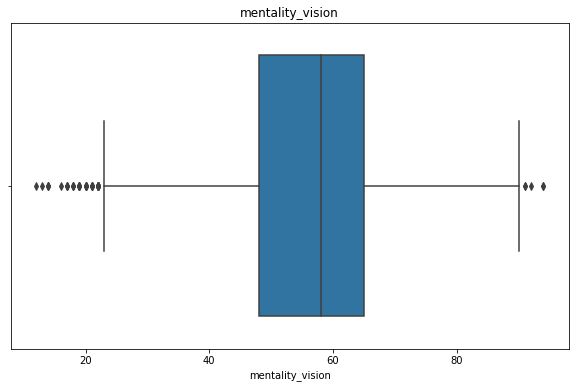

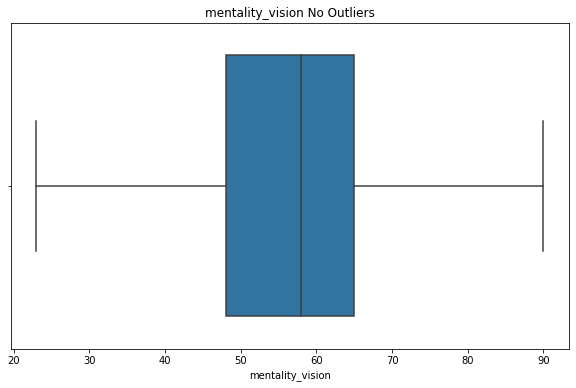

In [ ]:
boxplot_numerical(data_col_numeric[33])

## Mentality_penalties Boxplot

Statistical Data Summary
Median :  53.0
1st Quartile :  43.0
3rd Quartile :  62.0
IQR :  19.0
Upper Fence :  90.5
Lower Fence :  14.5

Outliers Data Detection
Upper Outliers Data :  [91, 91, 91, 91, 92]
Upper Outliers Status :  True
Lower Outliers Data :  [12, 12, 13, 13, 13, 13, 14, 14]
Lower Outliers Status :  True


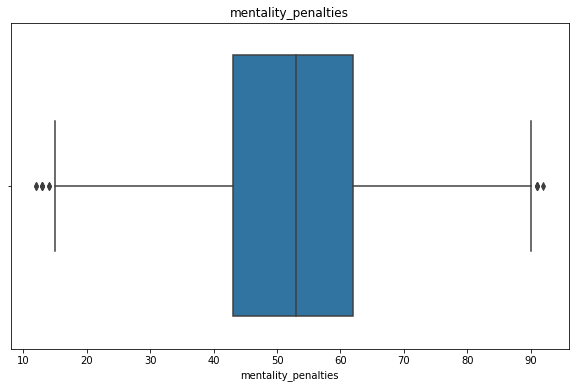

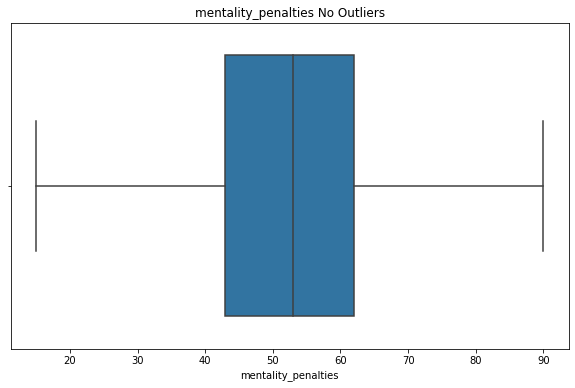

In [ ]:
boxplot_numerical(data_col_numeric[34])

## Mentality_composure Boxplot

Statistical Data Summary
Median :  62.0
1st Quartile :  55.0
3rd Quartile :  68.0
IQR :  13.0
Upper Fence :  87.5
Lower Fence :  35.5

Outliers Data Detection
Upper Outliers Data :  [88, 88, 88, 88, 88, 88, 89, 89, 89, 89, 89, 90, 90, 90, 90, 90, 91, 91, 91, 91, 92, 92, 92, 92, 92, 93, 94, 95, 95, 96]
Upper Outliers Status :  True
Lower Outliers Data :  [27, 30, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]
Lower Outliers Status :  True


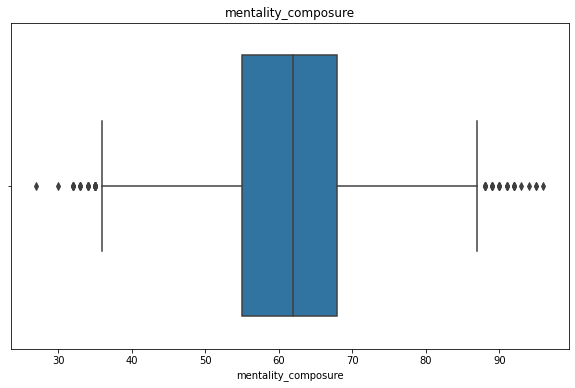

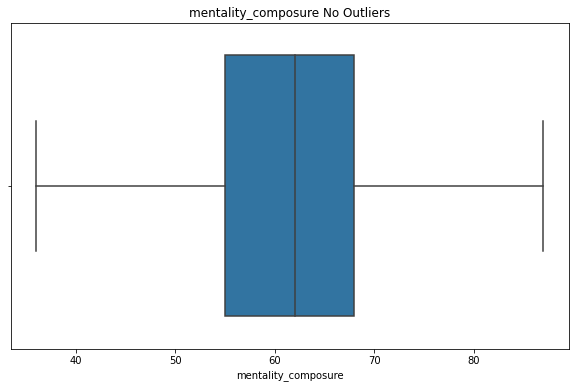

In [ ]:
boxplot_numerical(data_col_numeric[35])

## Defending_marking Boxplot

Statistical Data Summary
Median :  57.0
1st Quartile :  37.0
3rd Quartile :  65.0
IQR :  28.0
Upper Fence :  107.0
Lower Fence :  -5.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


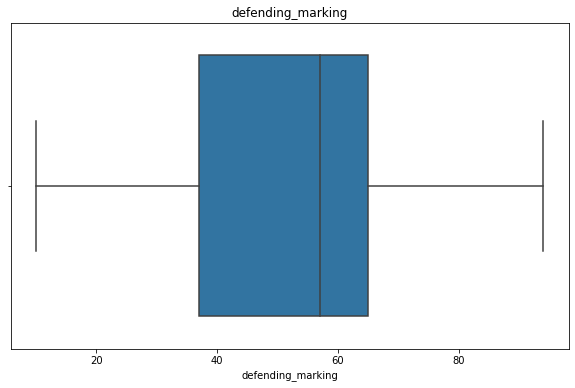

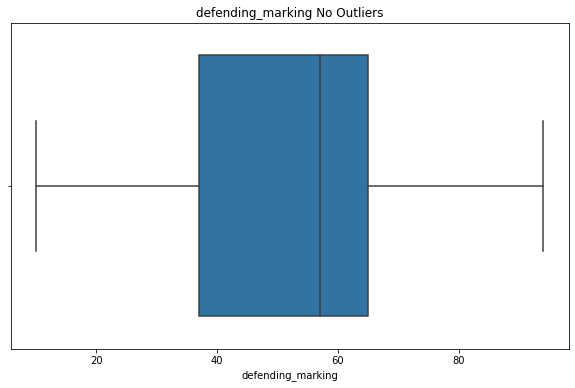

In [ ]:
boxplot_numerical(data_col_numeric[36])

## Defending_standing_tackle

Statistical Data Summary
Median :  60.0
1st Quartile :  36.0
3rd Quartile :  67.0
IQR :  31.0
Upper Fence :  113.5
Lower Fence :  -10.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


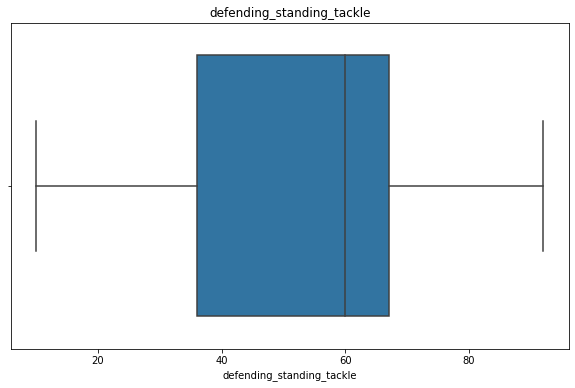

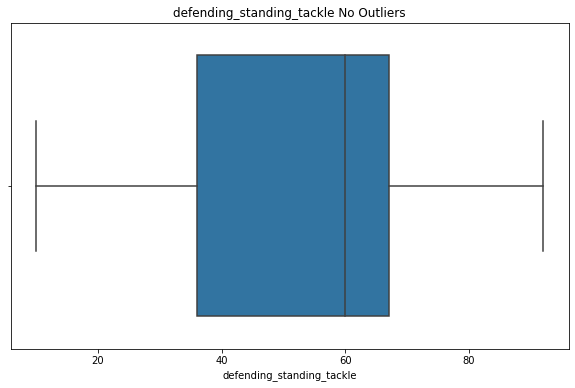

In [ ]:
boxplot_numerical(data_col_numeric[37])

## Defending_sliding_tackle

Statistical Data Summary
Median :  57.0
1st Quartile :  33.0
3rd Quartile :  65.0
IQR :  32.0
Upper Fence :  113.0
Lower Fence :  -15.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


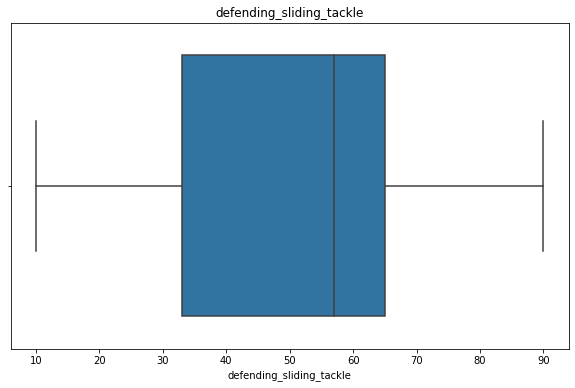

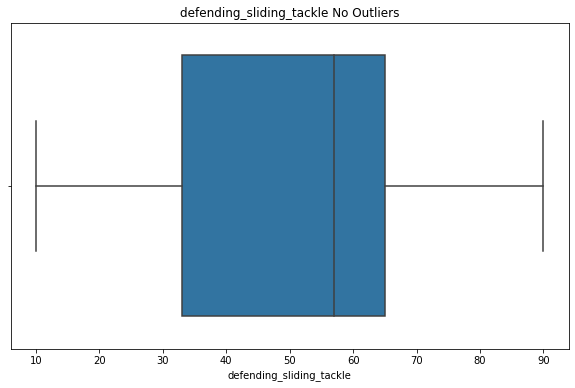

In [ ]:
boxplot_numerical(data_col_numeric[38])

## Goalkeeping_diving Boxplot

Statistical Data Summary
Median :  10.0
1st Quartile :  8.0
3rd Quartile :  13.0
IQR :  5.0
Upper Fence :  20.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [21, 22, 23, 27, 29, 32, 37, 58, 58, 75]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


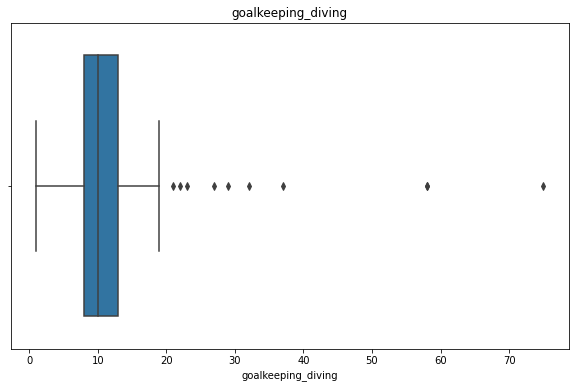

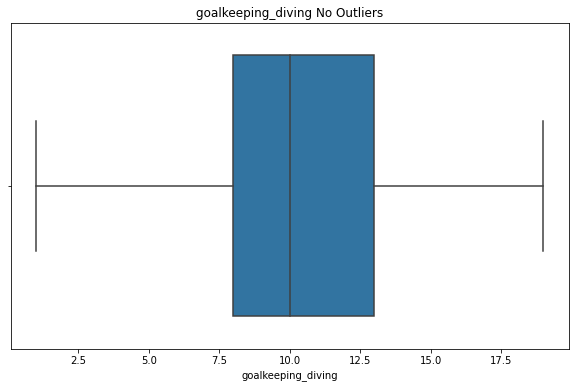

In [ ]:
boxplot_numerical(data_col_numeric[39])

## Goalkeeping_handling Boxplot

Statistical Data Summary
Median :  11.0
1st Quartile :  8.0
3rd Quartile :  13.0
IQR :  5.0
Upper Fence :  20.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [22, 25, 32, 33, 33, 40, 53, 62]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


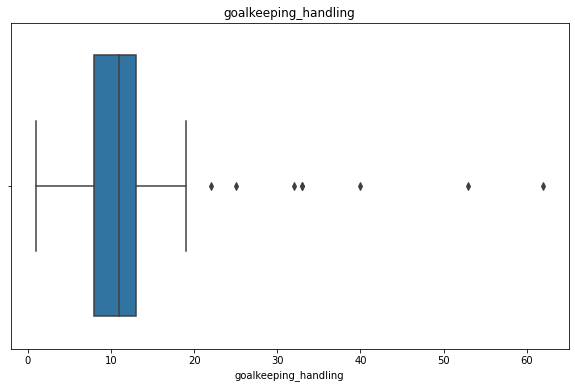

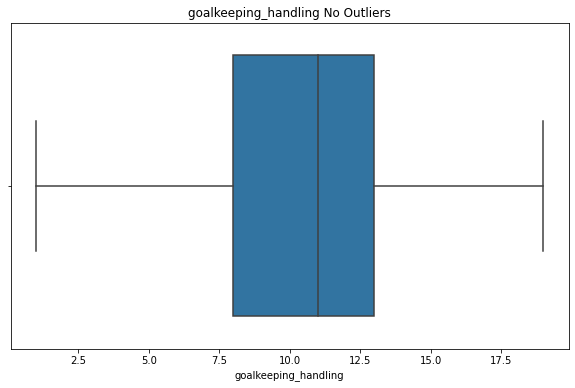

In [ ]:
boxplot_numerical(data_col_numeric[40])

## Goalkeeping_kicking Boxplot

Statistical Data Summary
Median :  11.0
1st Quartile :  8.0
3rd Quartile :  13.0
IQR :  5.0
Upper Fence :  20.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [22, 23, 23, 26, 27, 28, 30, 31, 36, 38, 41, 41, 42, 54, 64]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


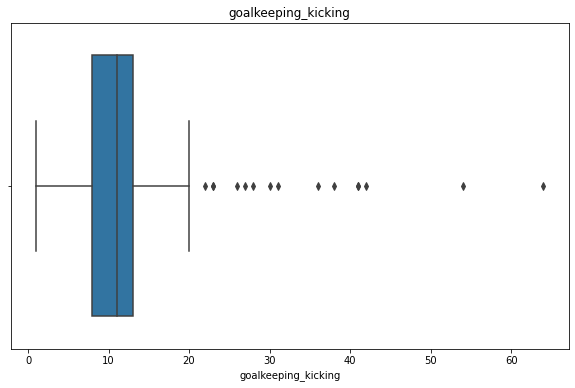

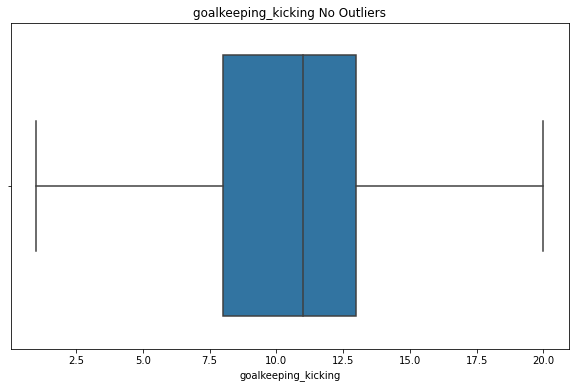

In [ ]:
boxplot_numerical(data_col_numeric[41])

## Goalkeeping_positioning Boxplot

Statistical Data Summary
Median :  10.0
1st Quartile :  8.0
3rd Quartile :  13.0
IQR :  5.0
Upper Fence :  20.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [23, 24, 26, 27, 32, 33, 56, 60, 71]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


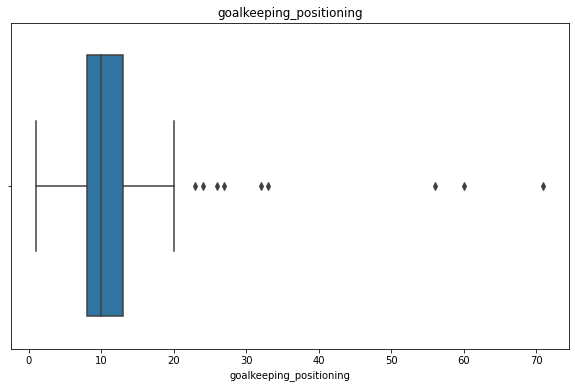

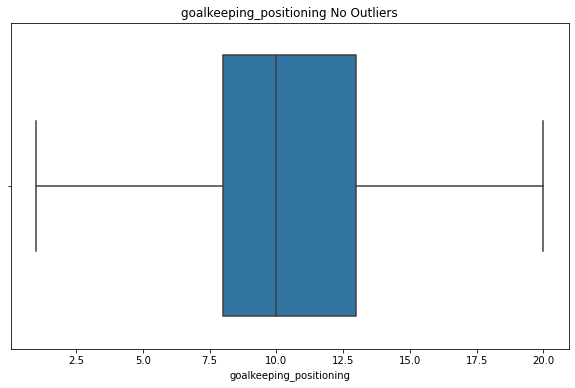

In [ ]:
boxplot_numerical(data_col_numeric[42])

## Goalkeeping_reflexes Boxplot

Statistical Data Summary
Median :  11.0
1st Quartile :  8.0
3rd Quartile :  13.0
IQR :  5.0
Upper Fence :  20.5
Lower Fence :  0.5

Outliers Data Detection
Upper Outliers Data :  [21, 21, 21, 21, 21, 23, 27, 30, 34, 34, 37, 43, 45, 48]
Upper Outliers Status :  True
Lower Outliers Data :  []
Lower Outliers Status :  False


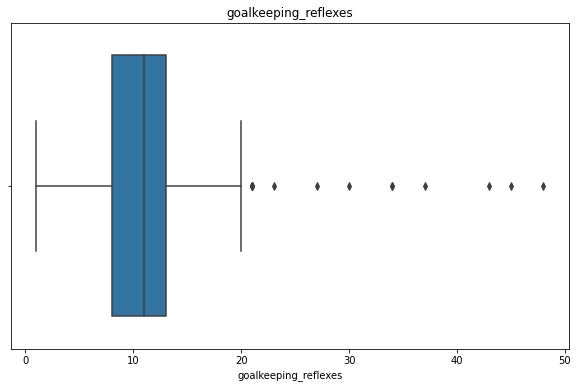

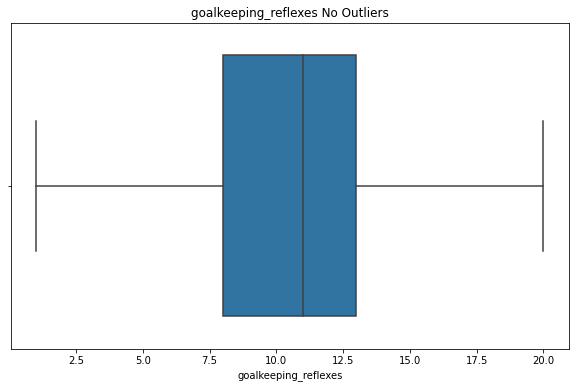

In [ ]:
boxplot_numerical(data_col_numeric[43])

# Float Univariate Analysis

## Release_clause_eur Boxplot

Statistical Data Summary
Median :  1400000.0
1st Quartile :  683000.0
3rd Quartile :  4900000.0
IQR :  nan
Upper Fence :  nan
Lower Fence :  nan

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


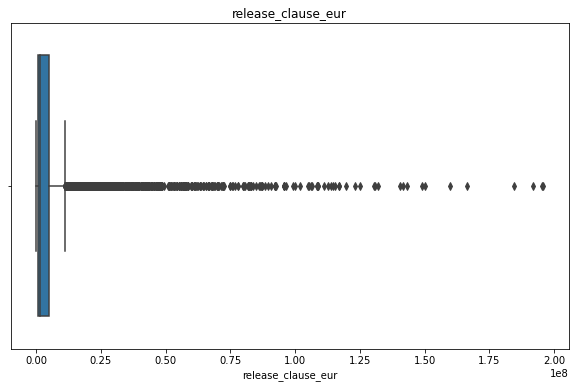

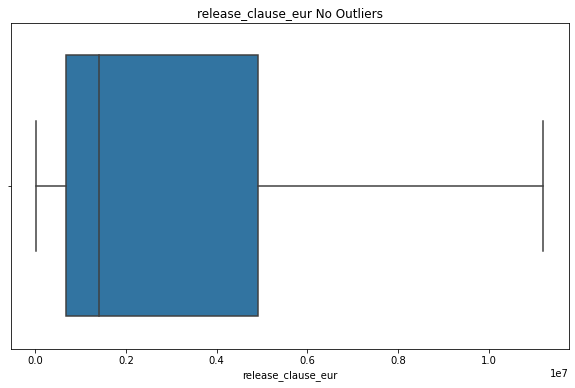

In [ ]:
boxplot_numerical(data_col_float[0])

## Contract_valid_until Boxplot

Statistical Data Summary
Median :  2021.0
1st Quartile :  2020.0
3rd Quartile :  2022.0
IQR :  nan
Upper Fence :  nan
Lower Fence :  nan

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


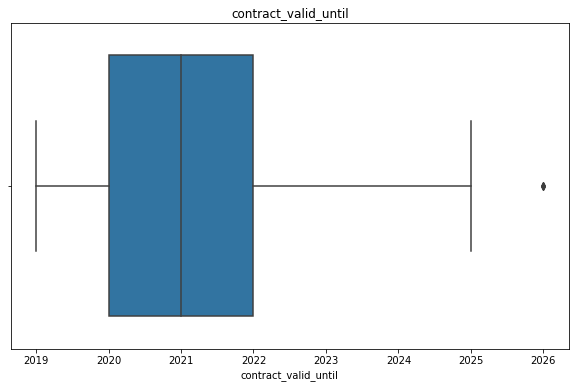

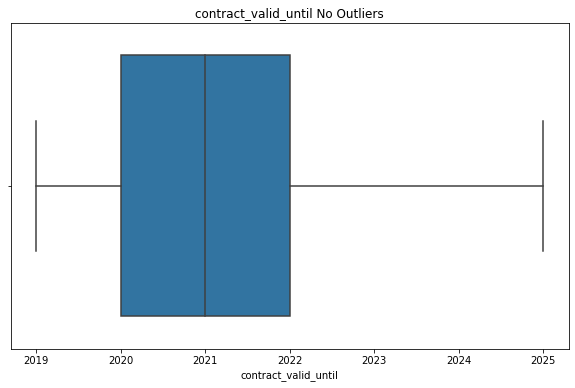

In [ ]:
boxplot_numerical(data_col_float[1])

## Pace Boxplot

Statistical Data Summary
Median :  69.0
1st Quartile :  62.0
3rd Quartile :  76.0
IQR :  14.0
Upper Fence :  97.0
Lower Fence :  41.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [24.0, 25.0, 25.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0

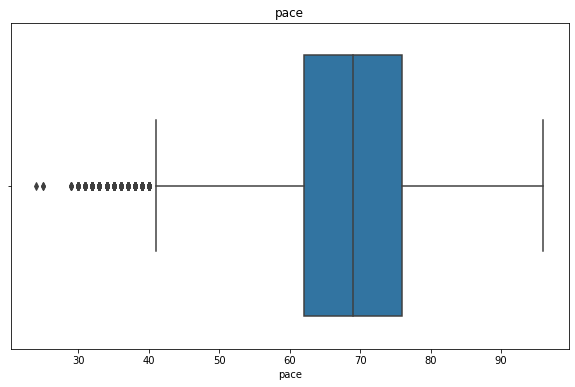

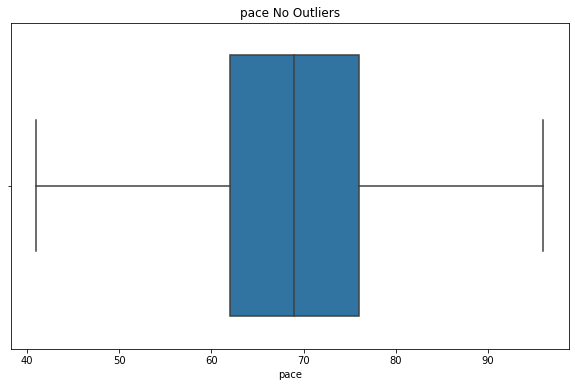

In [ ]:
boxplot_numerical(data_col_float[2])

## Shooting Boxplot

Statistical Data Summary
Median :  55.0
1st Quartile :  43.0
3rd Quartile :  64.0
IQR :  21.0
Upper Fence :  95.5
Lower Fence :  11.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


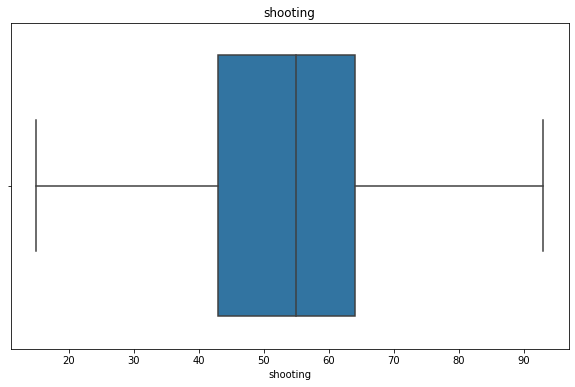

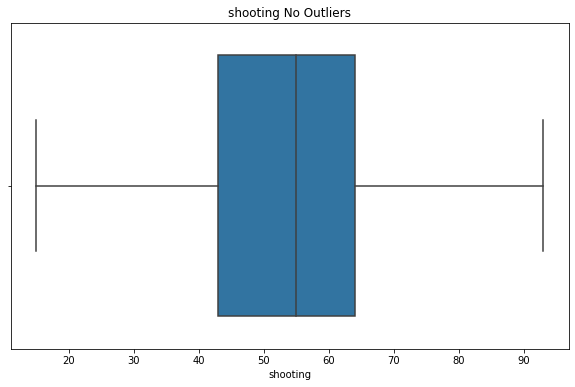

In [ ]:
boxplot_numerical(data_col_float[3])

## Passing Boxplot

Statistical Data Summary
Median :  59.0
1st Quartile :  52.0
3rd Quartile :  65.0
IQR :  13.0
Upper Fence :  84.5
Lower Fence :  32.5

Outliers Data Detection
Upper Outliers Data :  [85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 86.0, 87.0, 87.0, 87.0, 87.0, 87.0, 88.0, 88.0, 89.0, 90.0, 90.0, 92.0, 92.0]
Upper Outliers Status :  True
Lower Outliers Data :  [24.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 3

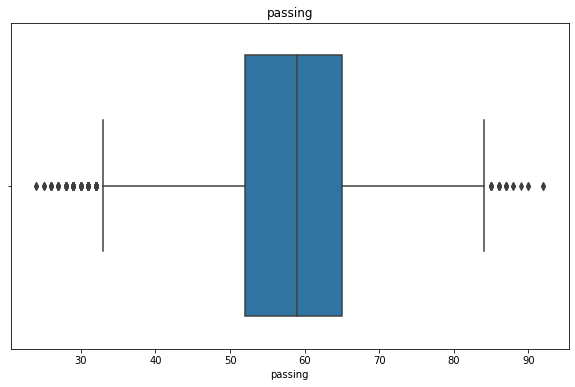

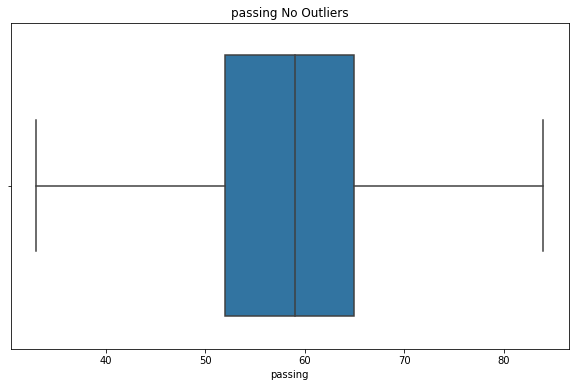

In [ ]:
boxplot_numerical(data_col_float[4])

## Dribbling Boxplot

Statistical Data Summary
Median :  64.0
1st Quartile :  58.0
3rd Quartile :  70.0
IQR :  12.0
Upper Fence :  88.0
Lower Fence :  40.0

Outliers Data Detection
Upper Outliers Data :  [89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 89.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 91.0, 91.0, 91.0, 91.0, 92.0, 94.0, 95.0, 96.0]
Upper Outliers Status :  True
Lower Outliers Data :  [23.0, 26.0, 27.0, 27.0, 28.0, 28.0, 28.0, 28.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 3

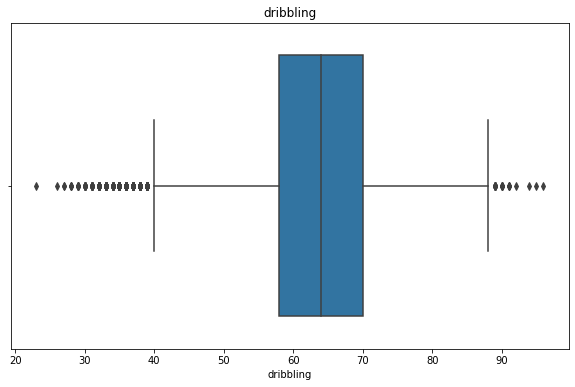

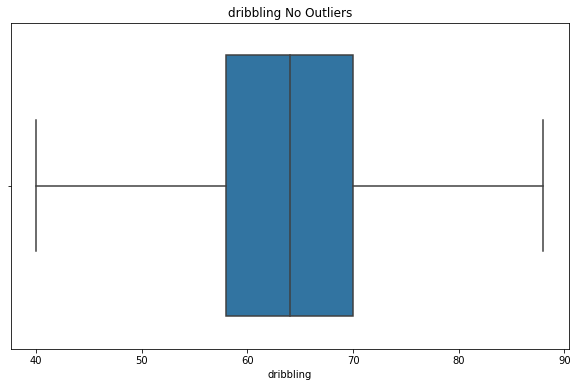

In [ ]:
boxplot_numerical(data_col_float[5])

## Defending Boxplot

Statistical Data Summary
Median :  58.0
1st Quartile :  37.0
3rd Quartile :  65.0
IQR :  28.0
Upper Fence :  107.0
Lower Fence :  -5.0

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


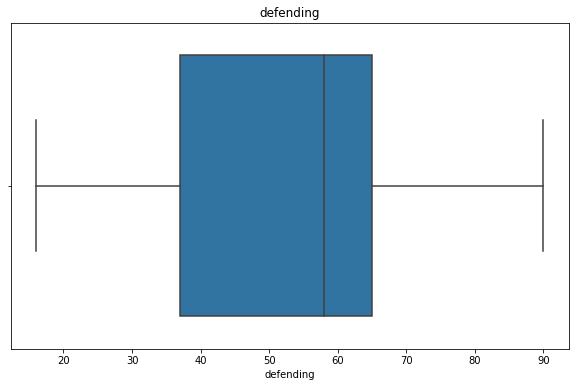

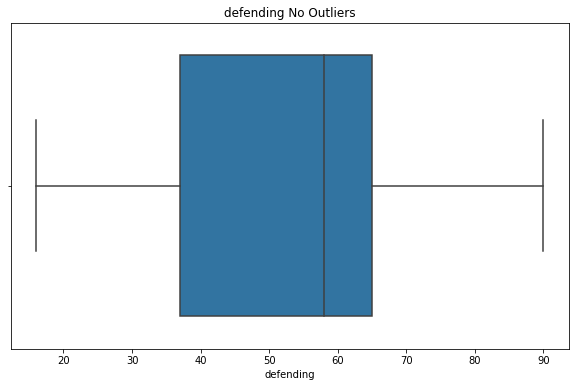

In [ ]:
boxplot_numerical(data_col_float[6])

## Physic Boxplot

Statistical Data Summary
Median :  67.0
1st Quartile :  60.0
3rd Quartile :  73.0
IQR :  13.0
Upper Fence :  92.5
Lower Fence :  40.5

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  [27.0, 31.0, 31.0, 32.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
Lower Outliers Status :  True


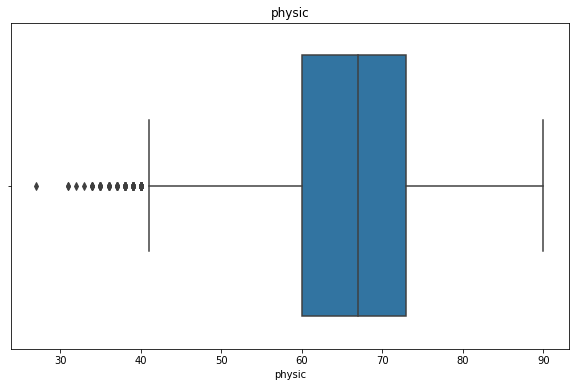

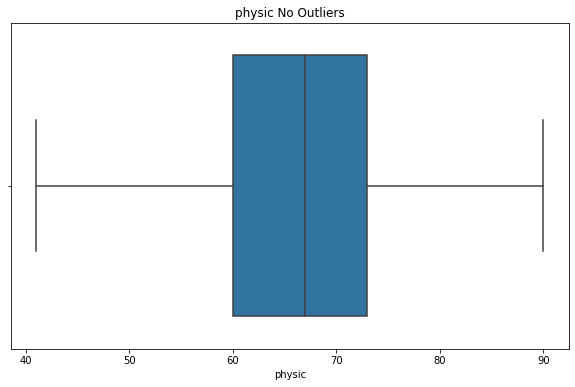

In [ ]:
boxplot_numerical(data_col_float[7])

# Visualization Analysis

Create&nbsp;a&nbsp;analysis&nbsp;BarPlot&nbsp;function

In [ ]:
def barplot_analysis(data):
    barplot_data = new_data[data].value_counts().rename_axis('unique_values').reset_index(name='counts')

    plt.figure(figsize = (15, 8))
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = barplot_data,
        
    )
    plt.title( data.capitalize() + ' Count', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

    plt.figure(figsize=(15,8))
    largest5 = barplot_data.nlargest(10,'counts')
    ax = sns.barplot(
        x = 'unique_values',
        y = 'counts',
        data = largest5,
        order = largest5['unique_values']
    )

    plt.title( data.capitalize() + ' Count Top 10', fontsize = 18, fontweight = 'bold')
    plt.xlabel(data.capitalize(), fontsize = 15, fontweight = 'bold')
    plt.ylabel('Total', fontsize = 15, fontweight = 'bold')
    plt.tight_layout()

    for x in ax.patches:
        ax.annotate(
                format(x.get_height(), '.0f'),
                (x.get_x() + x.get_width() / 2., x.get_height()), 
                ha = 'center',
                va = 'center',
                fontweight = 'bold',
                size = 13,
                xytext = (0, 7), 
                textcoords = 'offset points'
        )

# Visualization Numerical Analysis

In [ ]:
data_col_numeric

['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

## Age Analysis

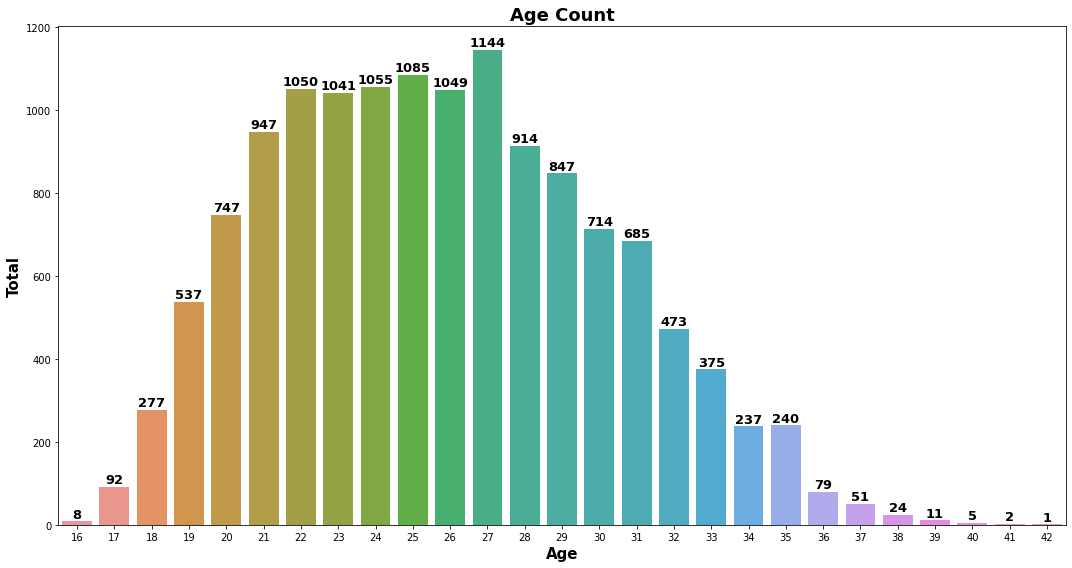

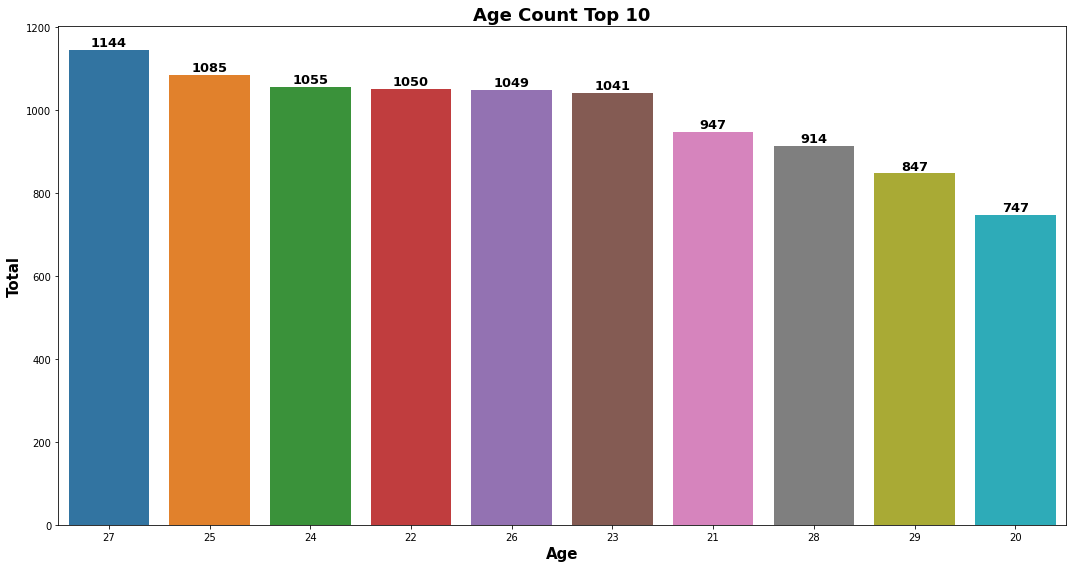

In [ ]:
barplot_analysis(data_col_numeric[0])

## Height_cm Analysis

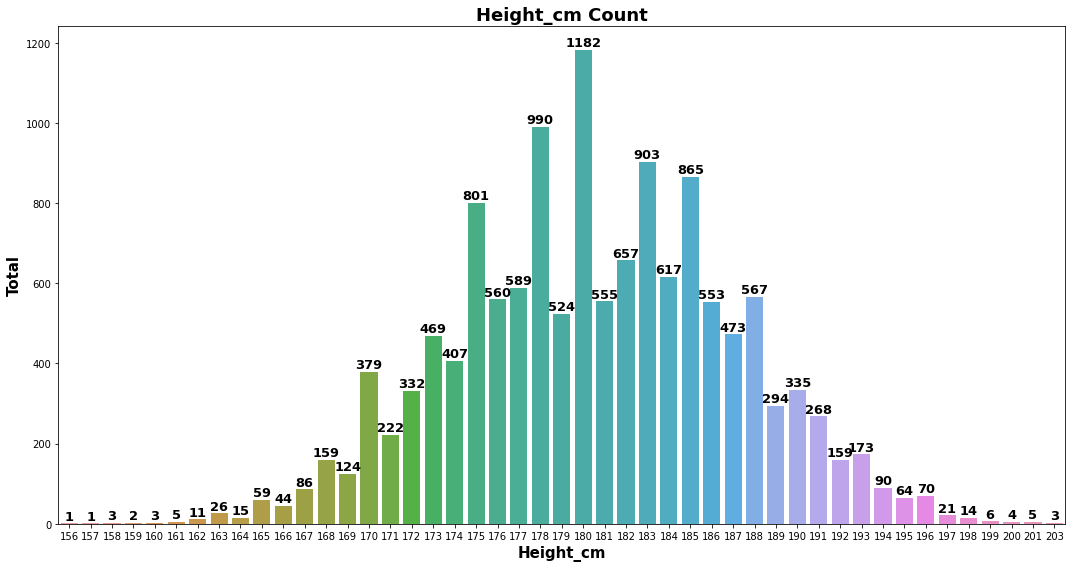

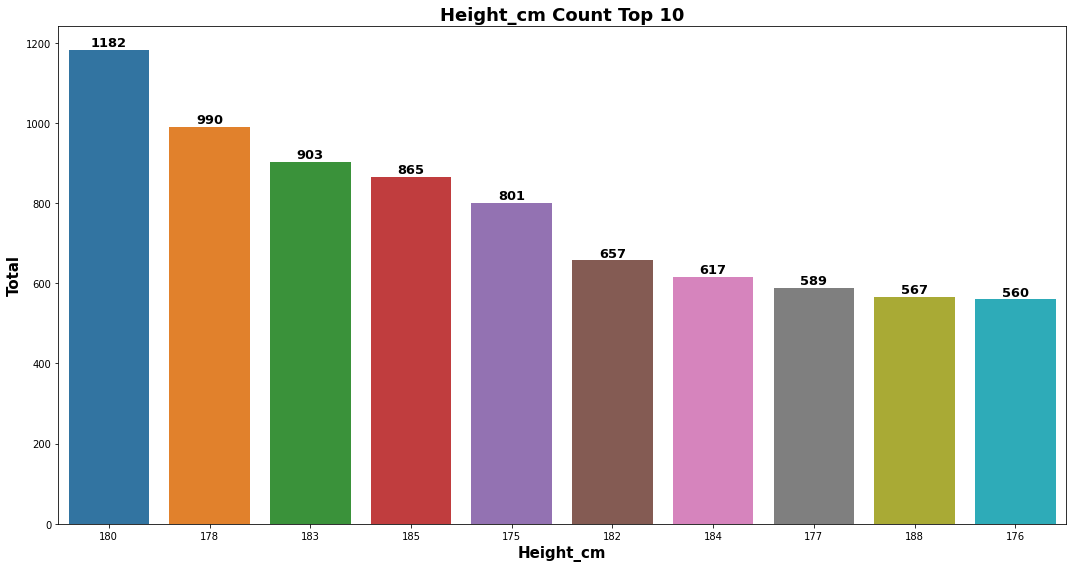

In [ ]:
barplot_analysis(data_col_numeric[1])

## Weight_kg Analysis

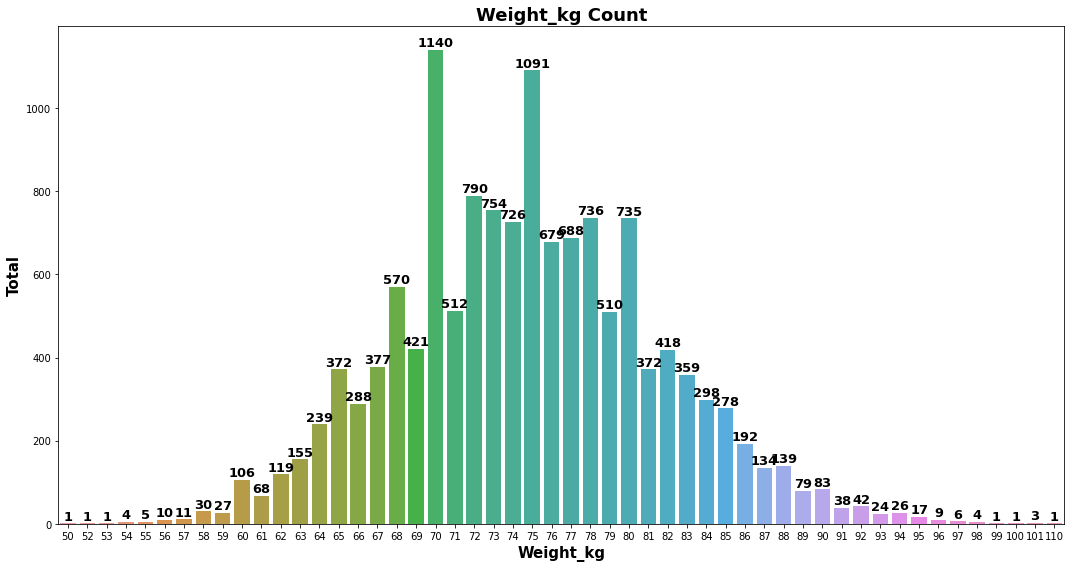

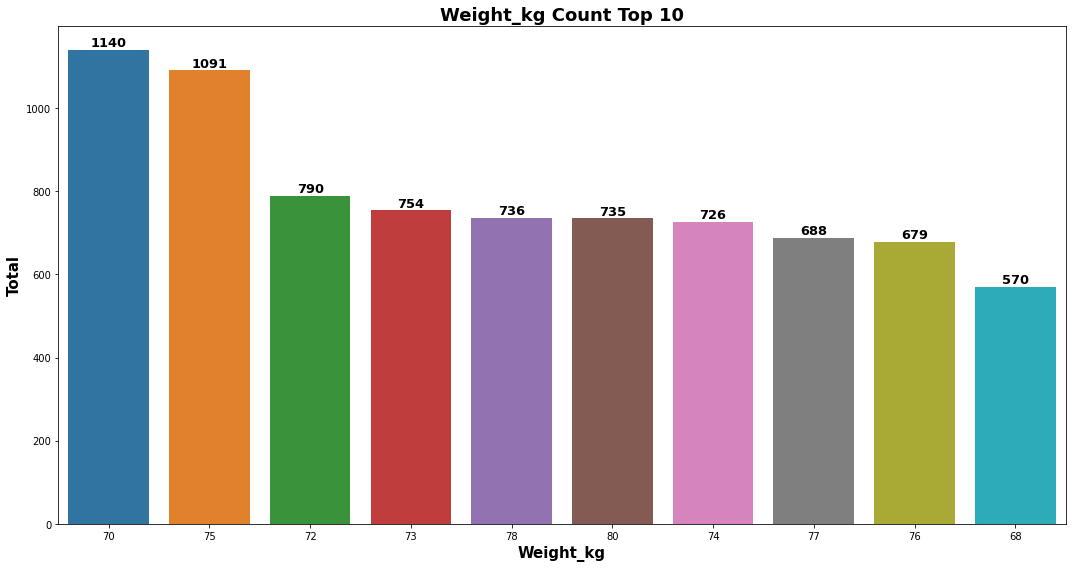

In [ ]:
barplot_analysis(data_col_numeric[2])

## Overall Analysis

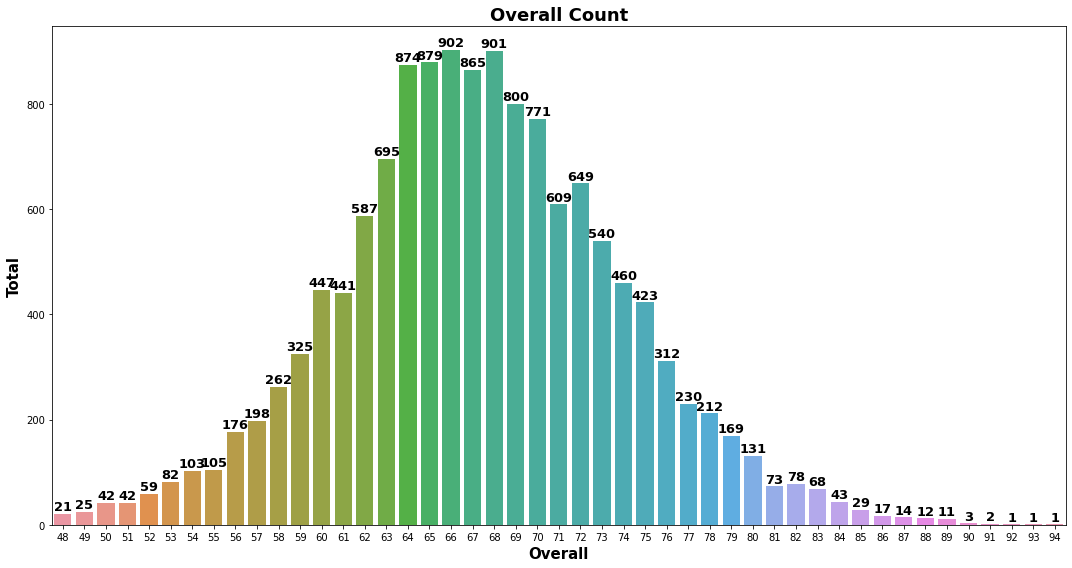

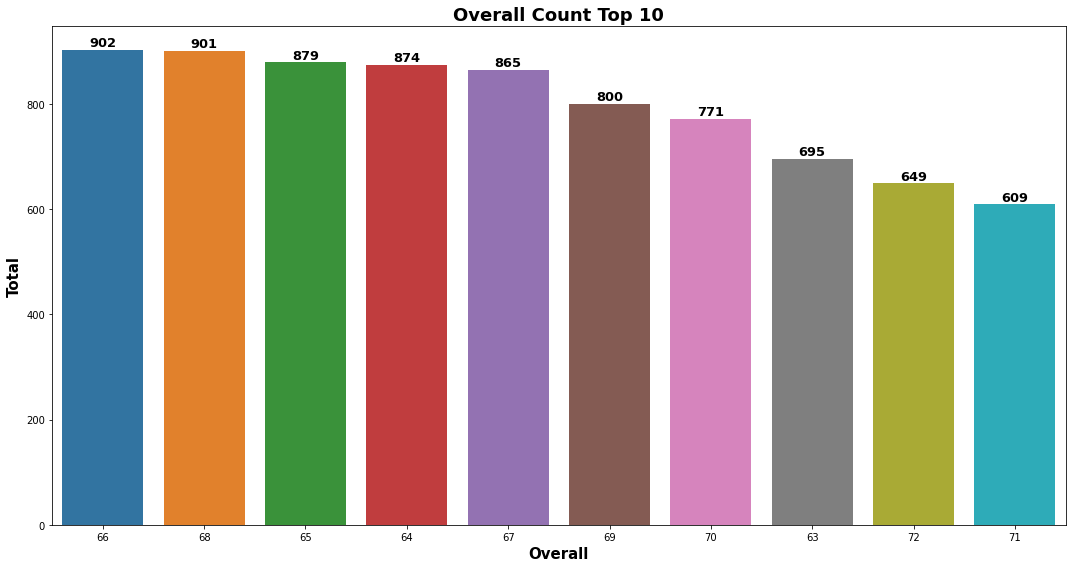

In [ ]:
barplot_analysis(data_col_numeric[3])

## Potential Analysis

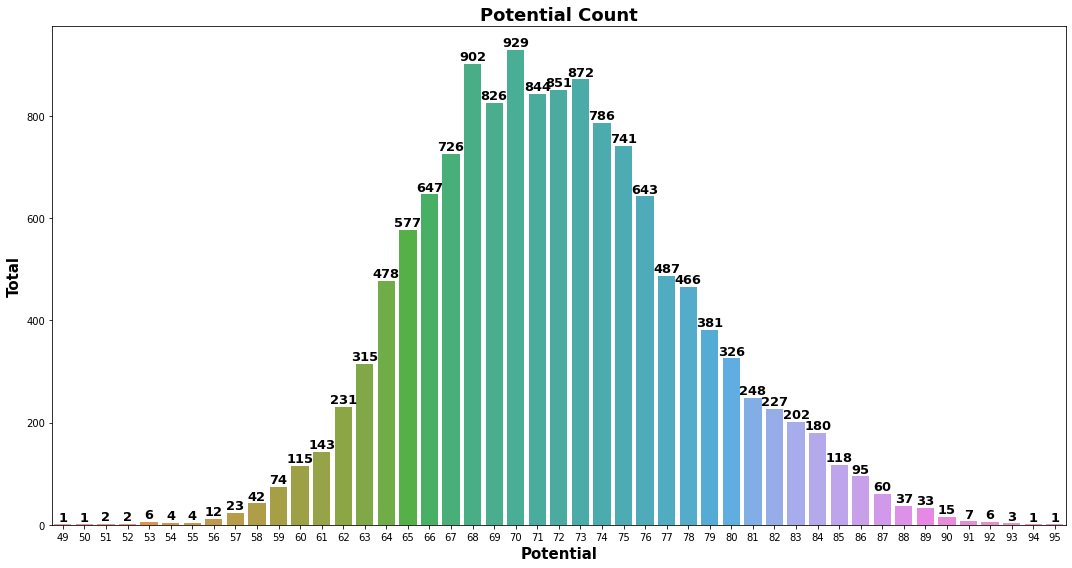

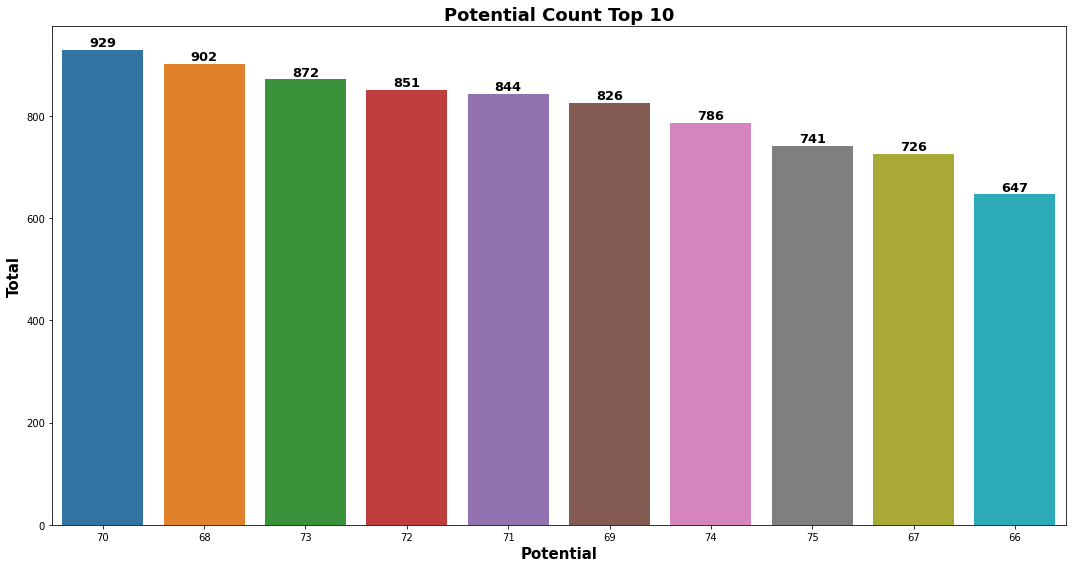

In [ ]:
barplot_analysis(data_col_numeric[4])

## Value_eur Analysis

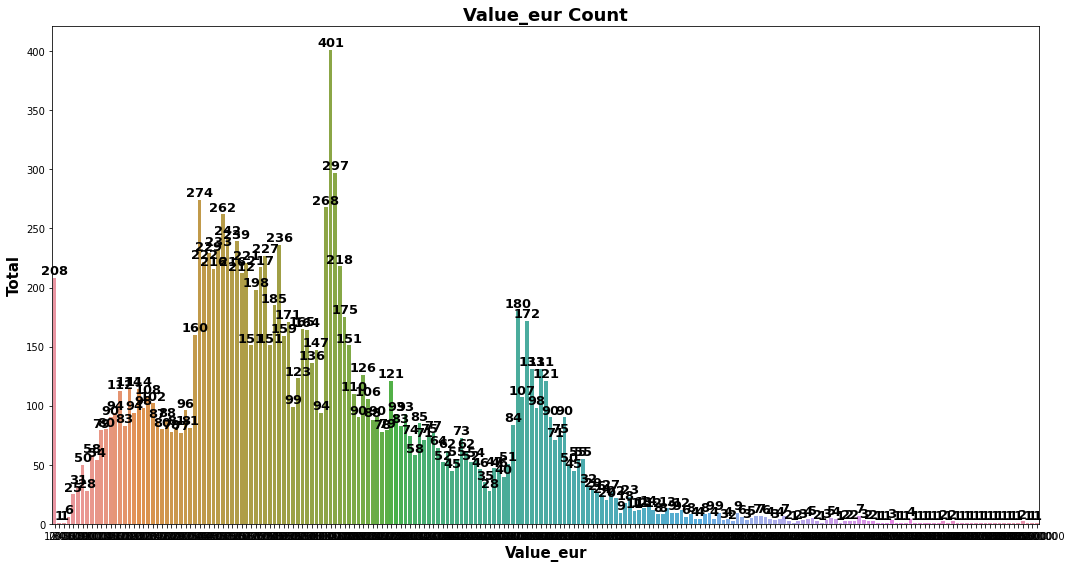

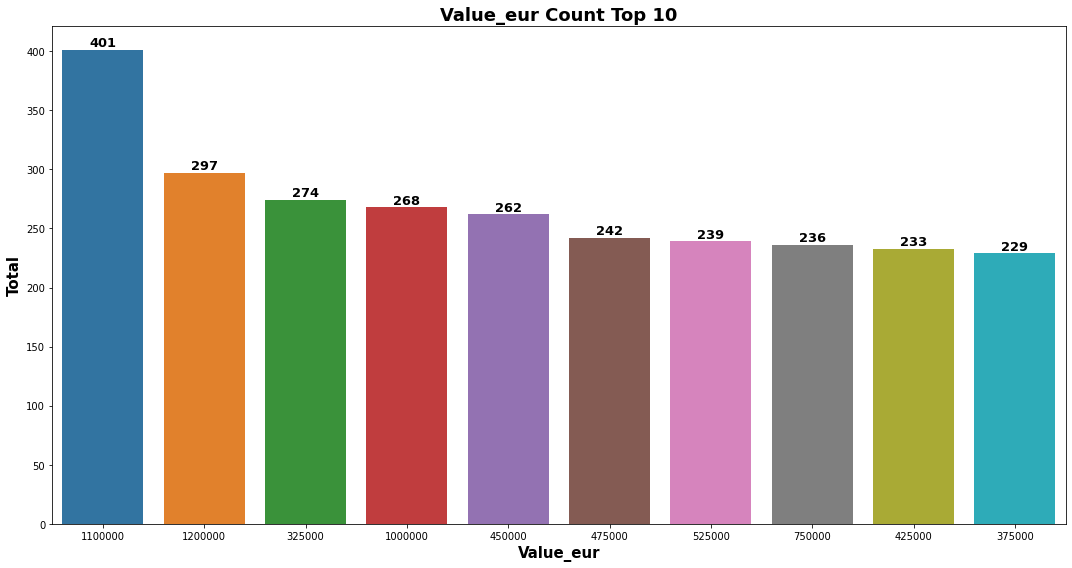

In [ ]:
barplot_analysis(data_col_numeric[5])

## Wage_eur Analysis

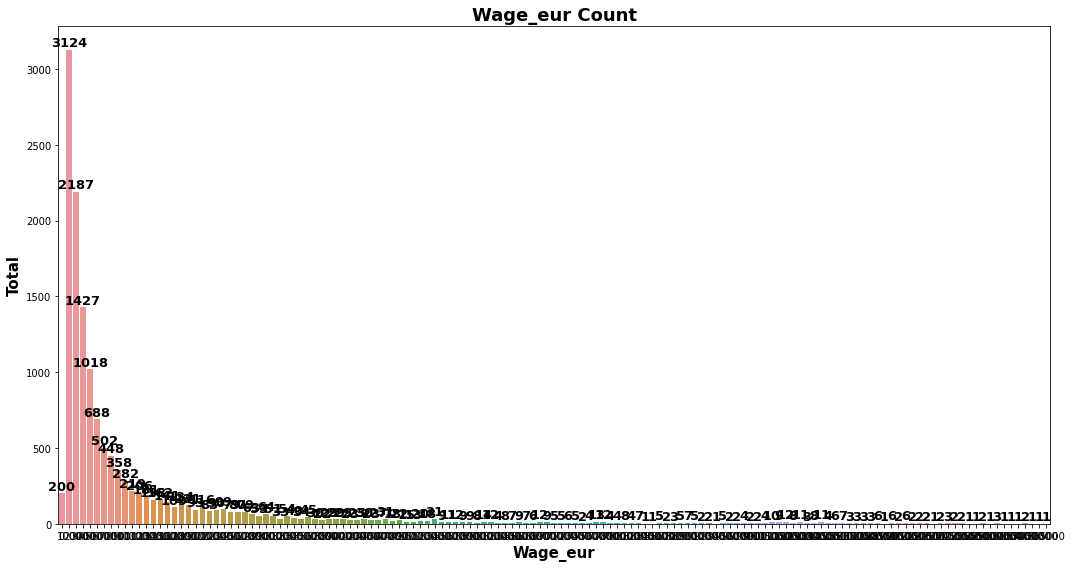

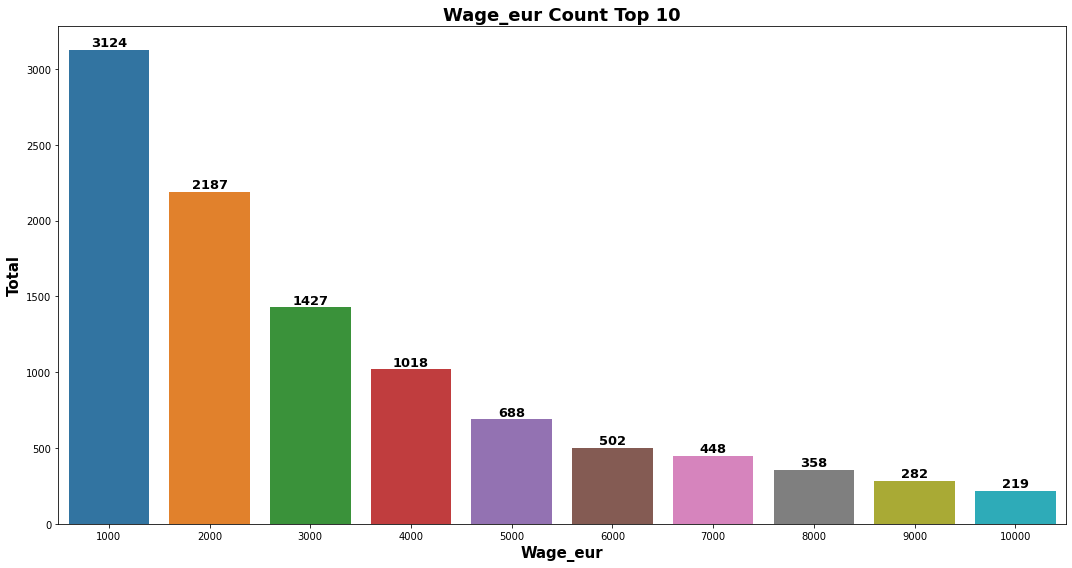

In [ ]:
barplot_analysis(data_col_numeric[6])

## International Reputation Analysis

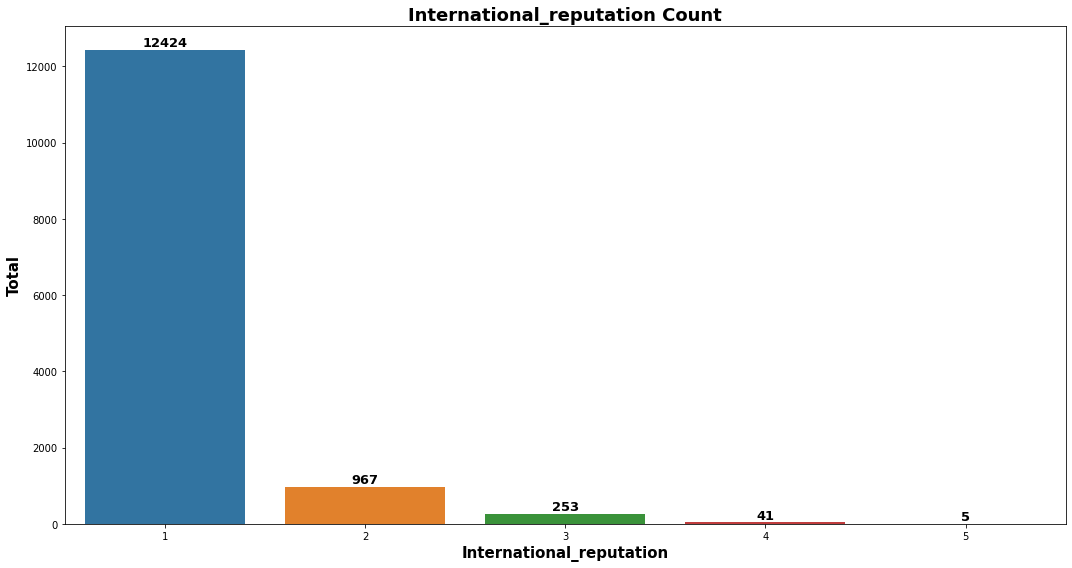

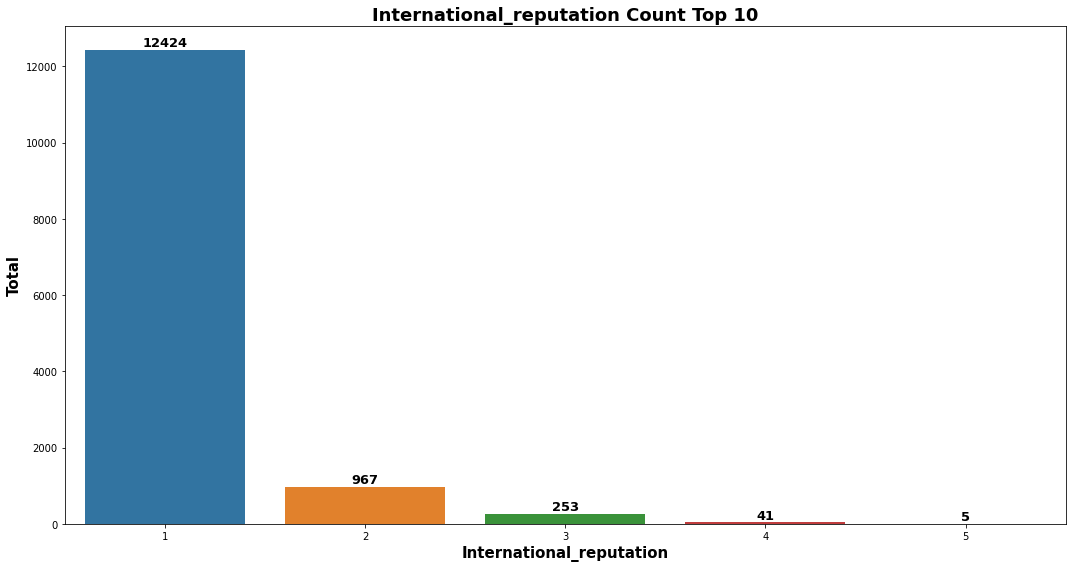

In [ ]:
barplot_analysis(data_col_numeric[7])

## Weak_foot Analysis

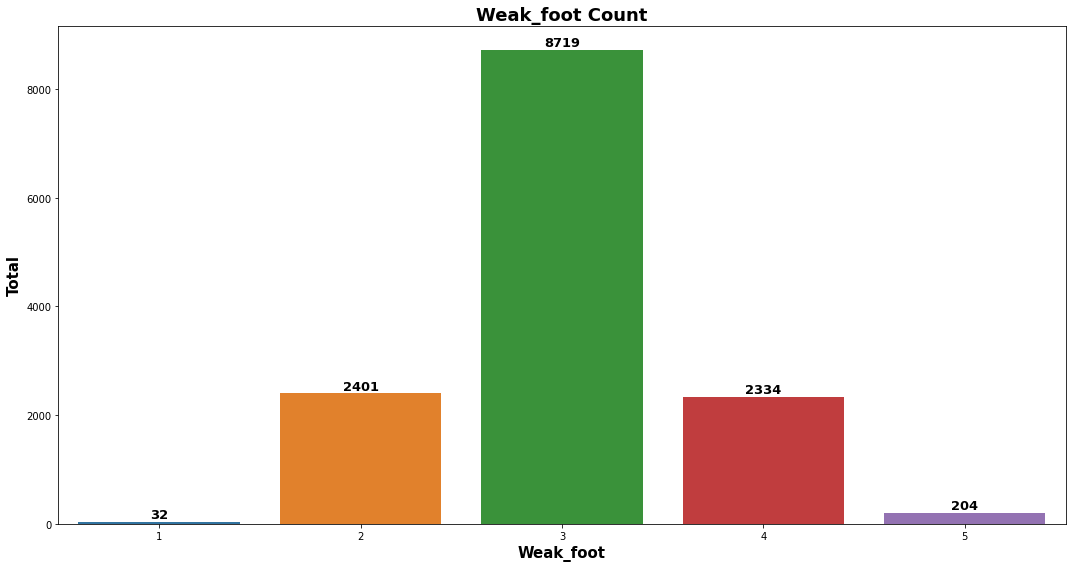

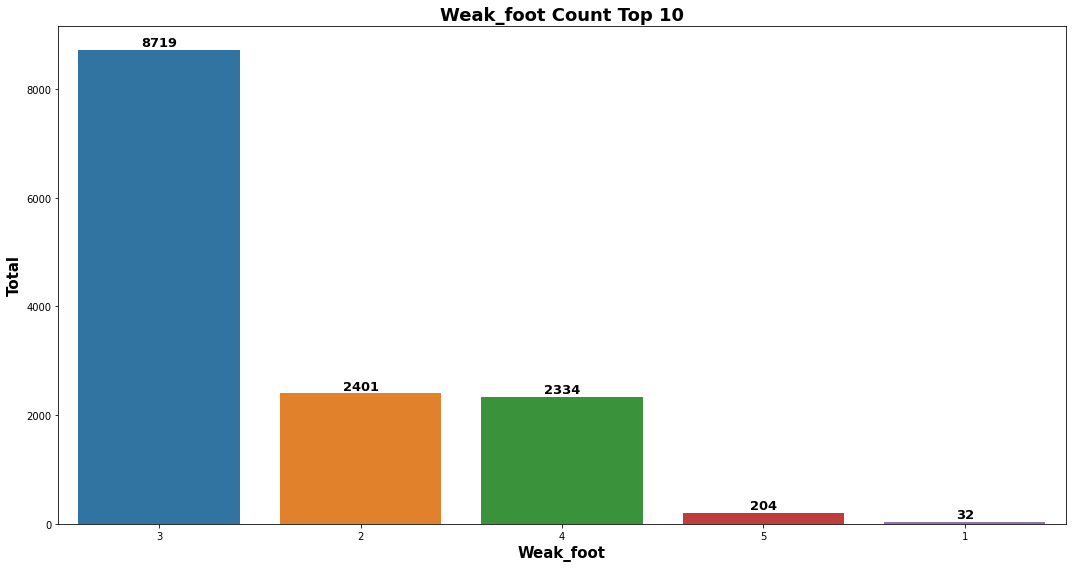

In [ ]:
barplot_analysis(data_col_numeric[8])

## Skill_moves Analysis

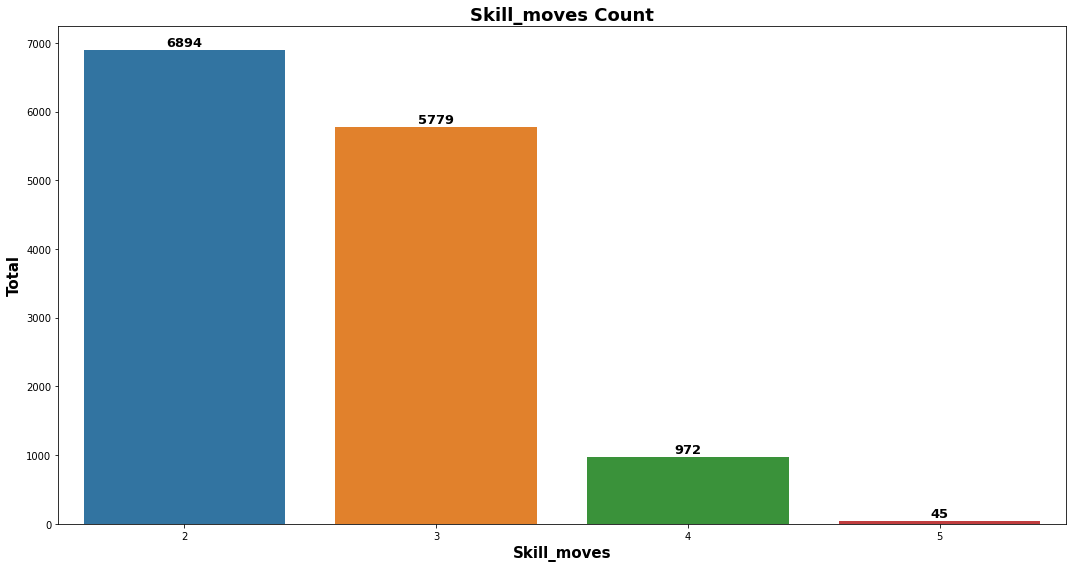

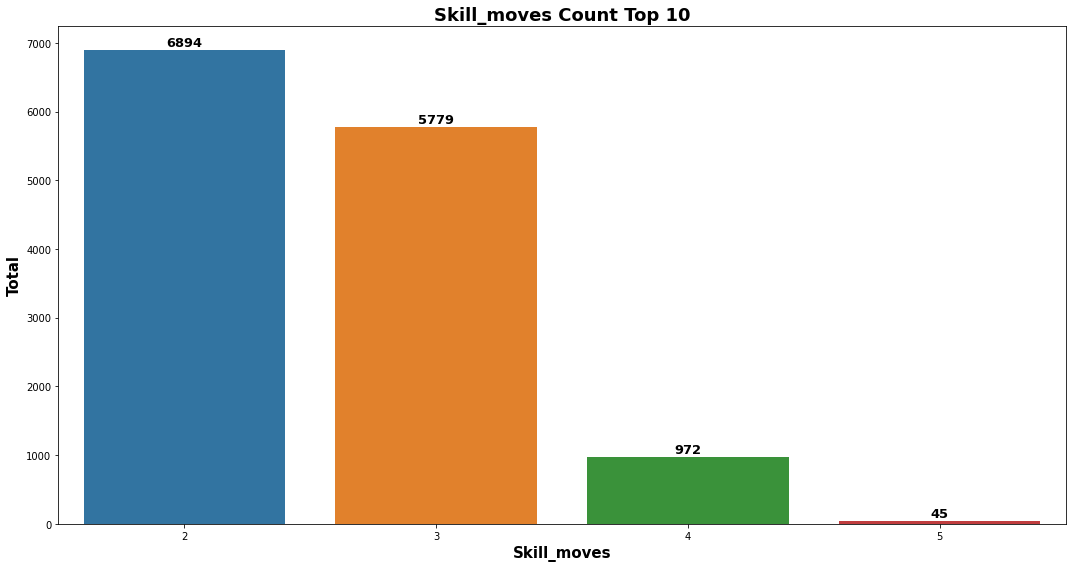

In [ ]:
barplot_analysis(data_col_numeric[9])

## Attacking_crossing Analysis

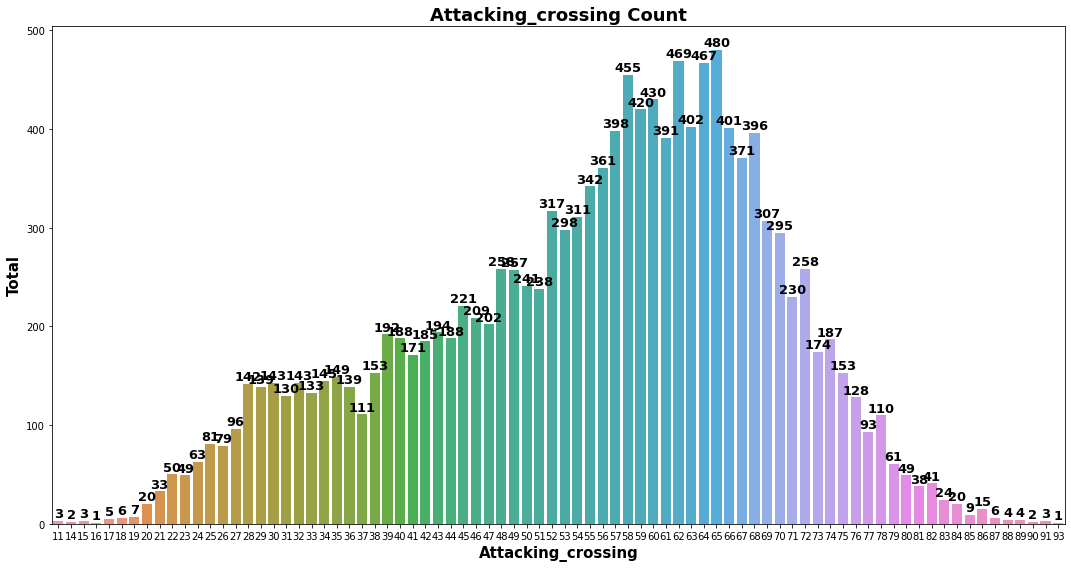

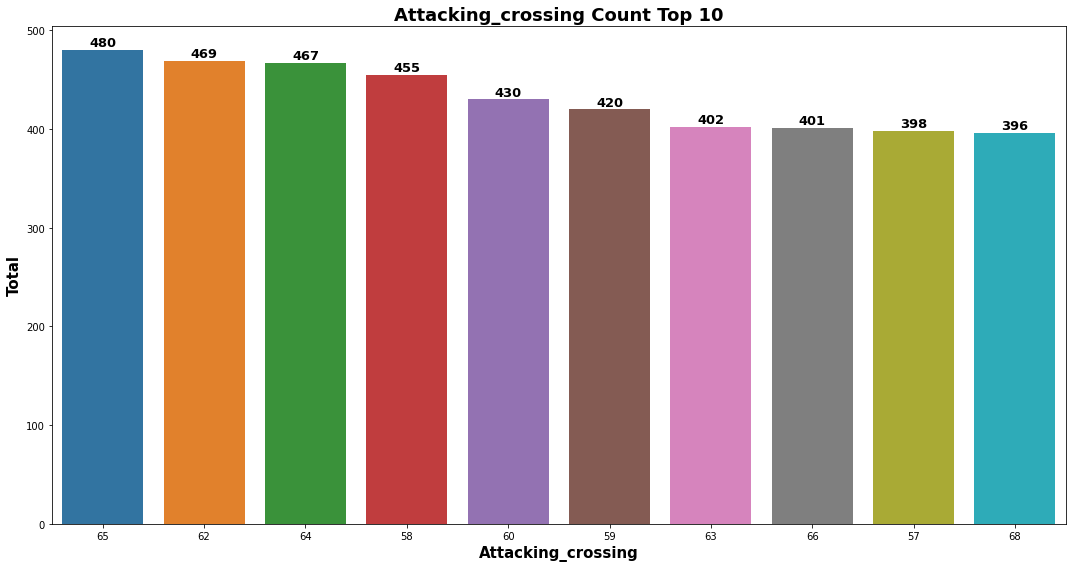

In [ ]:
barplot_analysis(data_col_numeric[10])

## Attacking_finishing Analysis

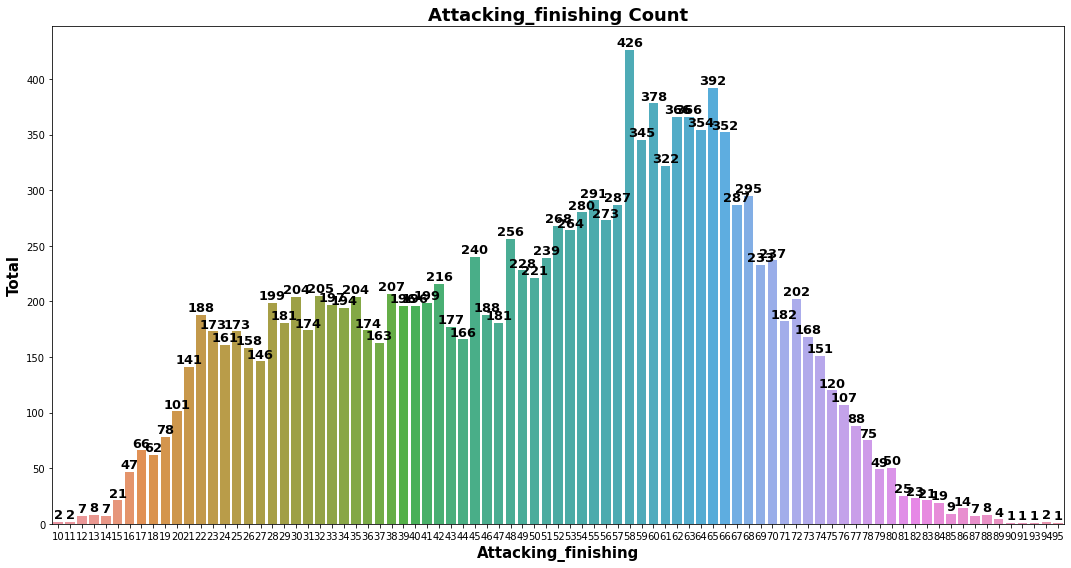

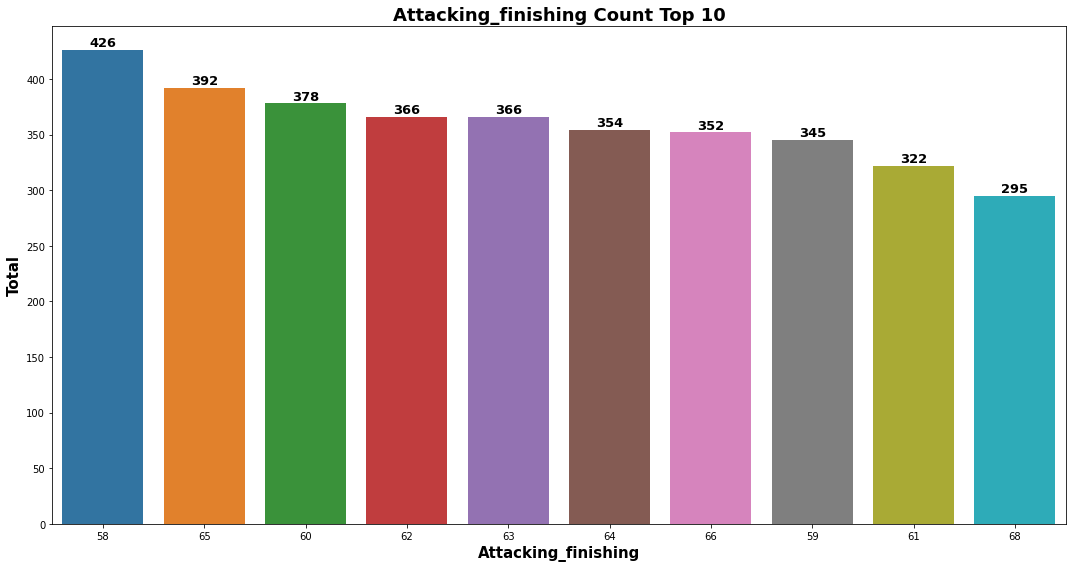

In [ ]:
barplot_analysis(data_col_numeric[11])

## Attacking_heading_accuracy Analysis

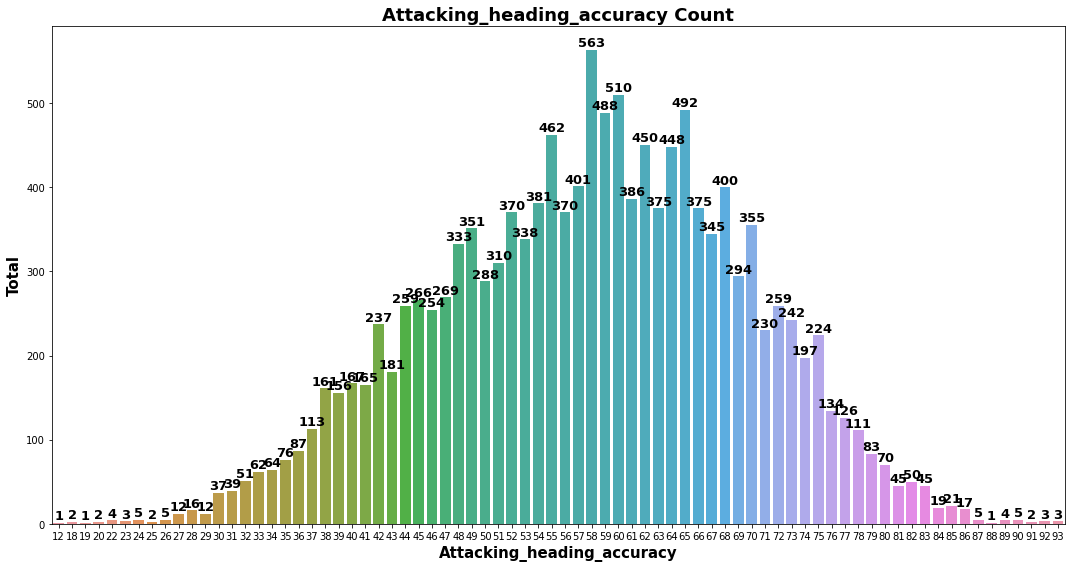

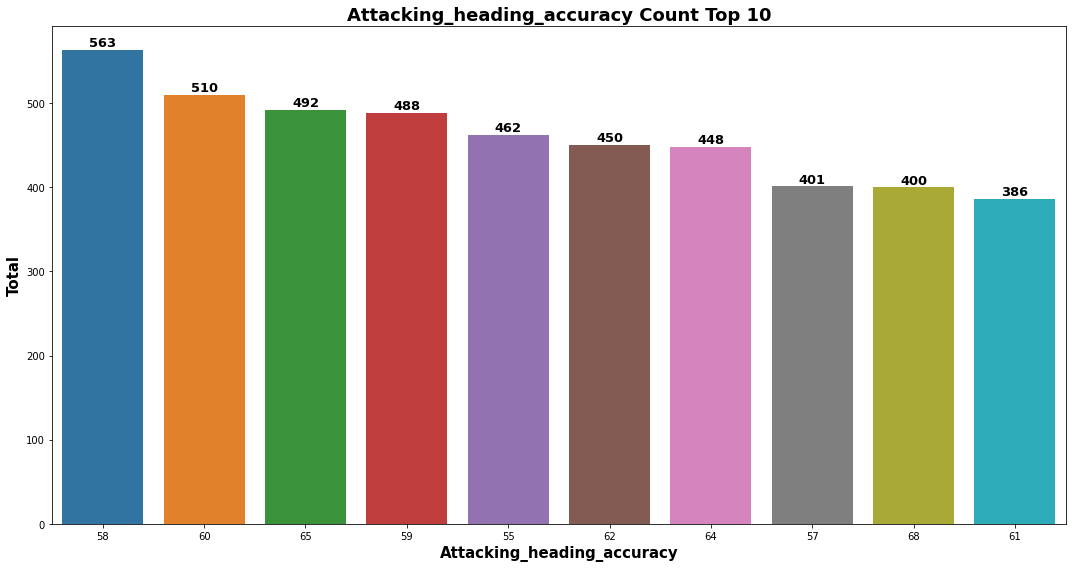

In [ ]:
barplot_analysis(data_col_numeric[12])

## Attacking_short_passing Analysis

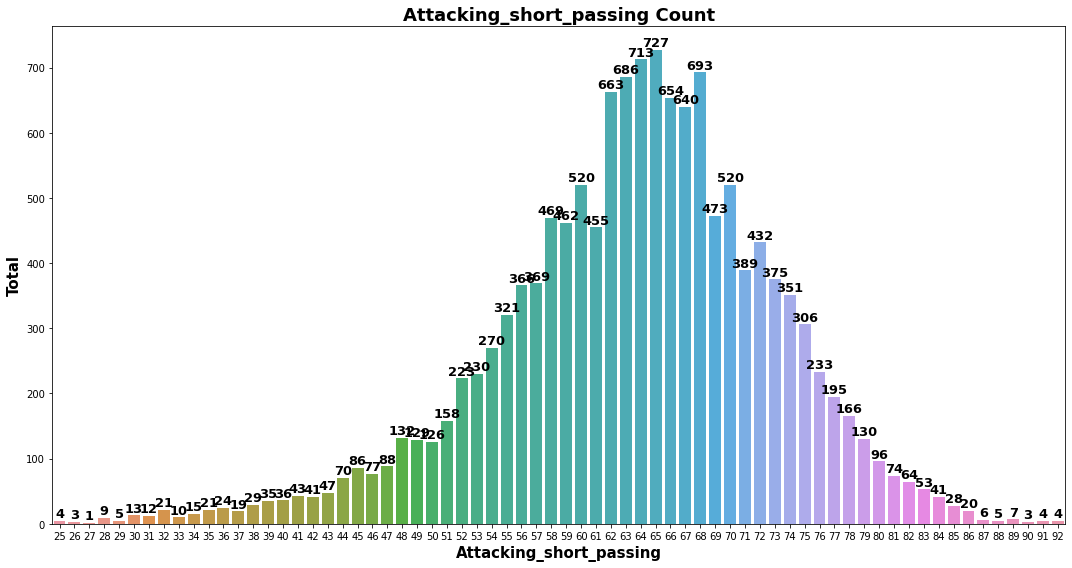

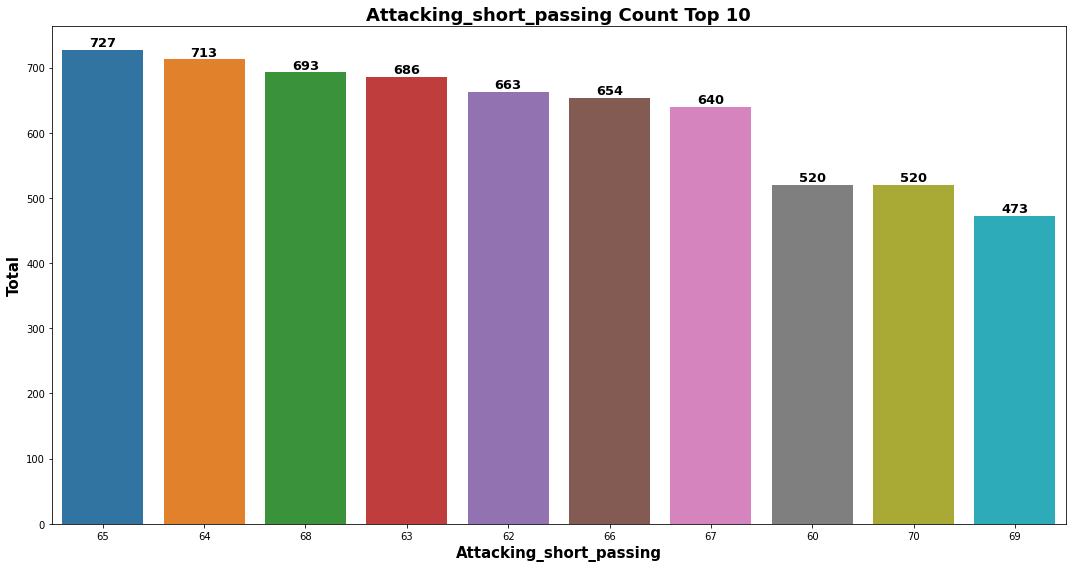

In [ ]:
barplot_analysis(data_col_numeric[13])

## Attacking_volleys Analysis

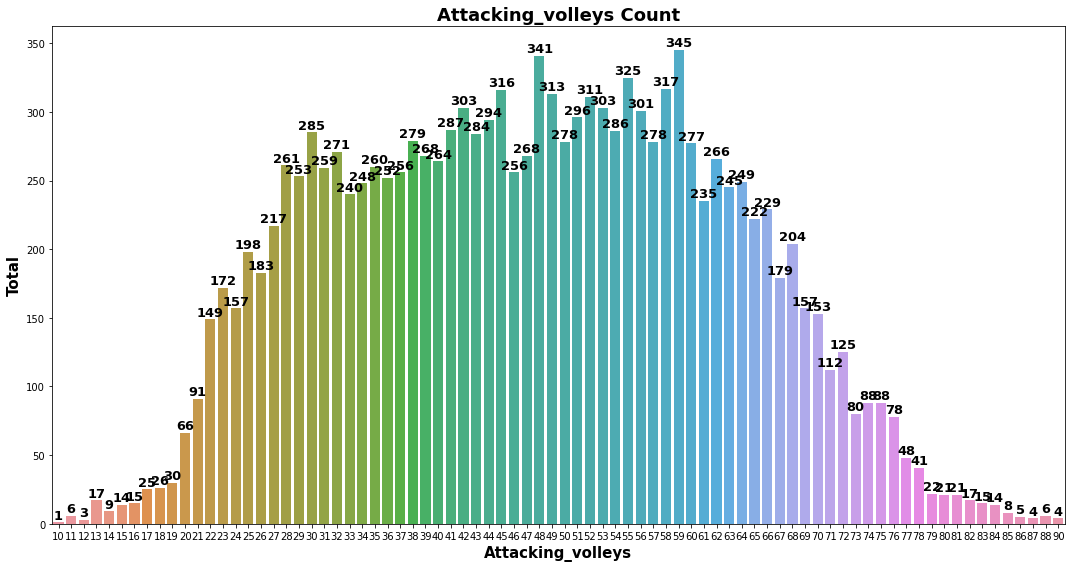

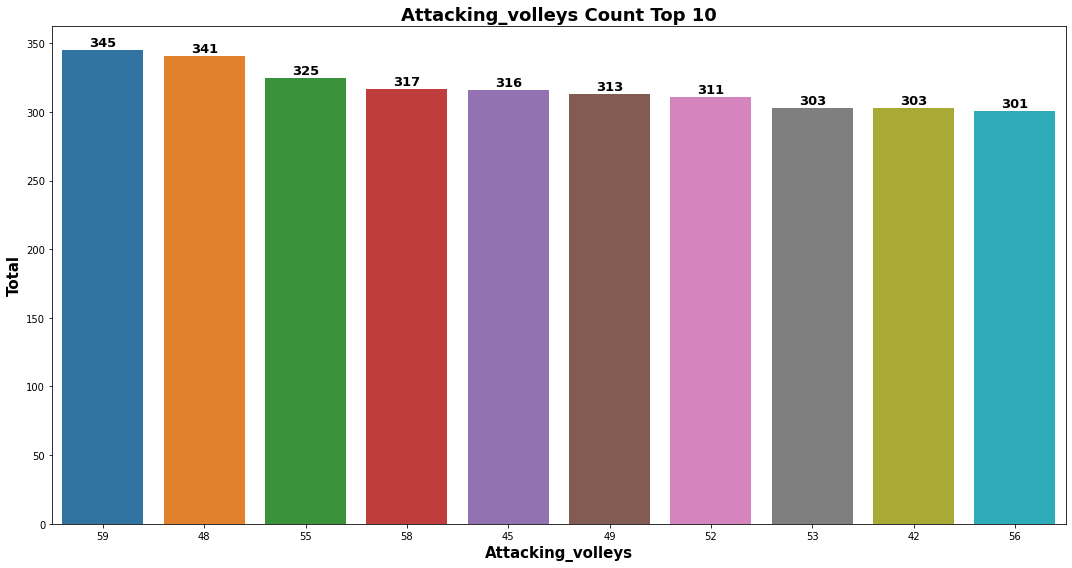

In [ ]:
barplot_analysis(data_col_numeric[14])

## Skill_dribbling Analysis

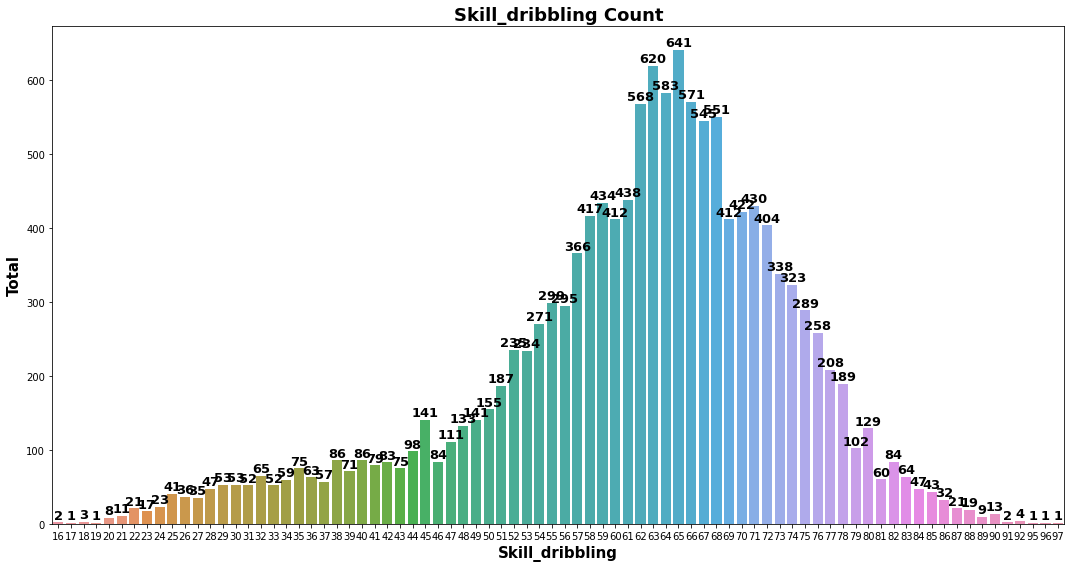

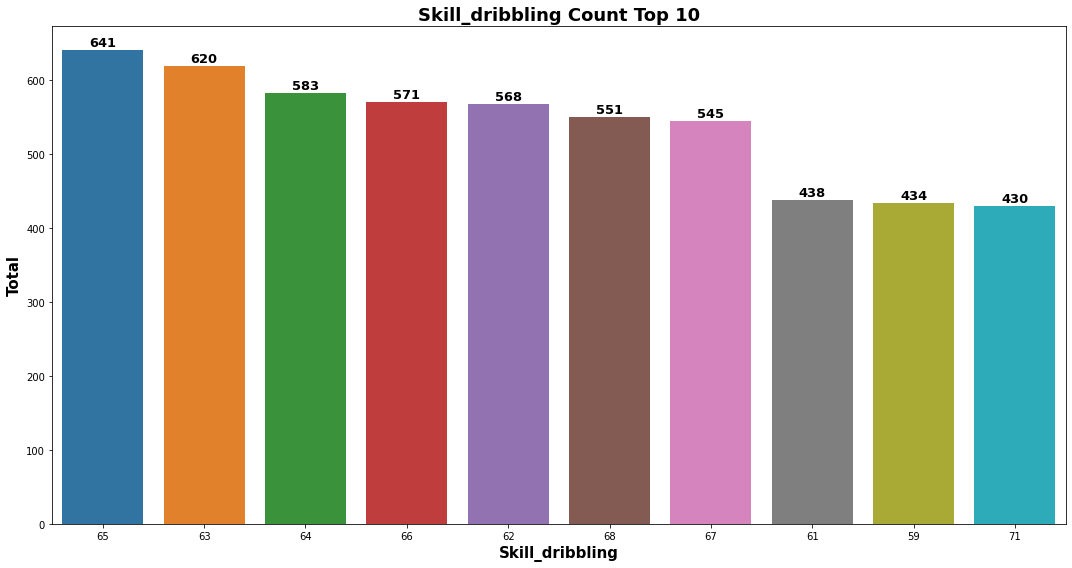

In [ ]:
barplot_analysis(data_col_numeric[15])

## Skill_curve Analysis

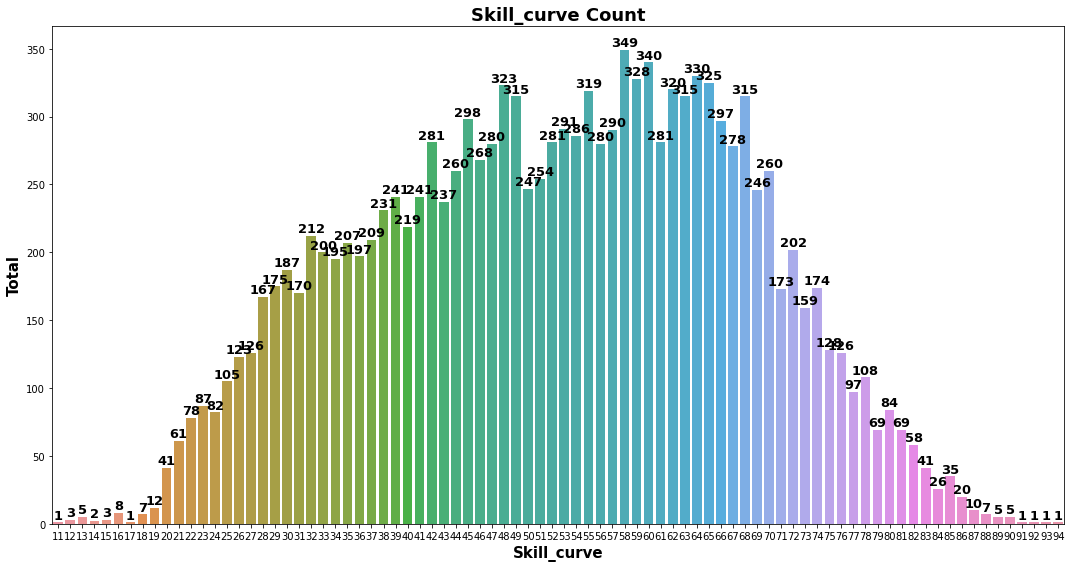

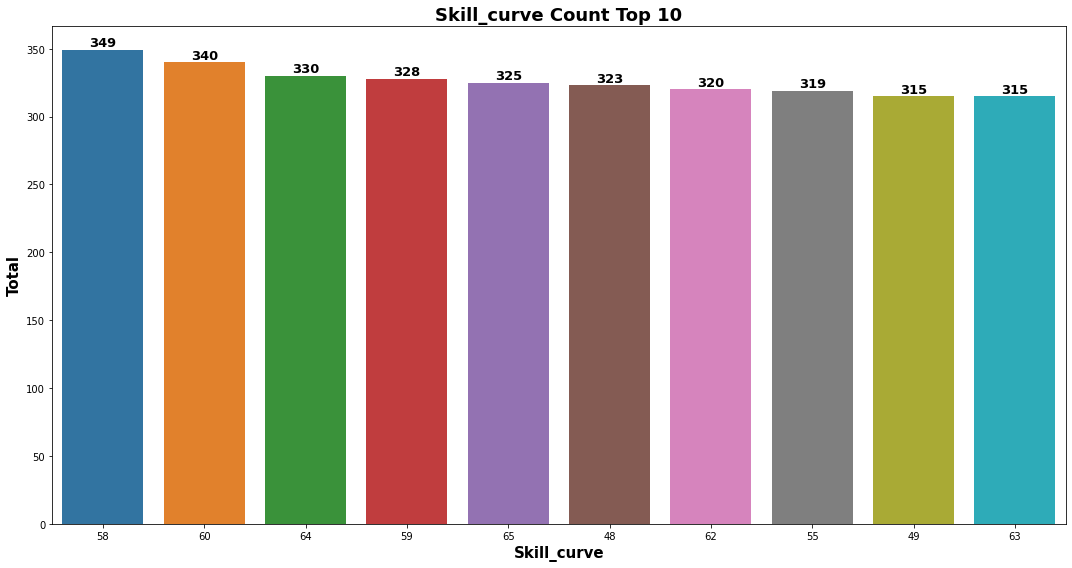

In [ ]:
barplot_analysis(data_col_numeric[16])

## Skill_fk_accuracy Analysis

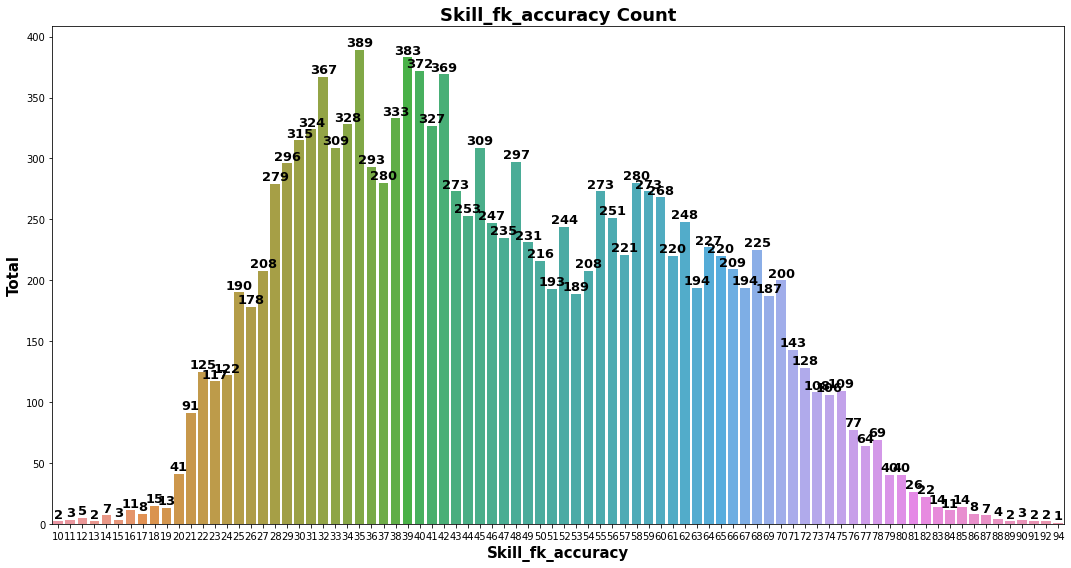

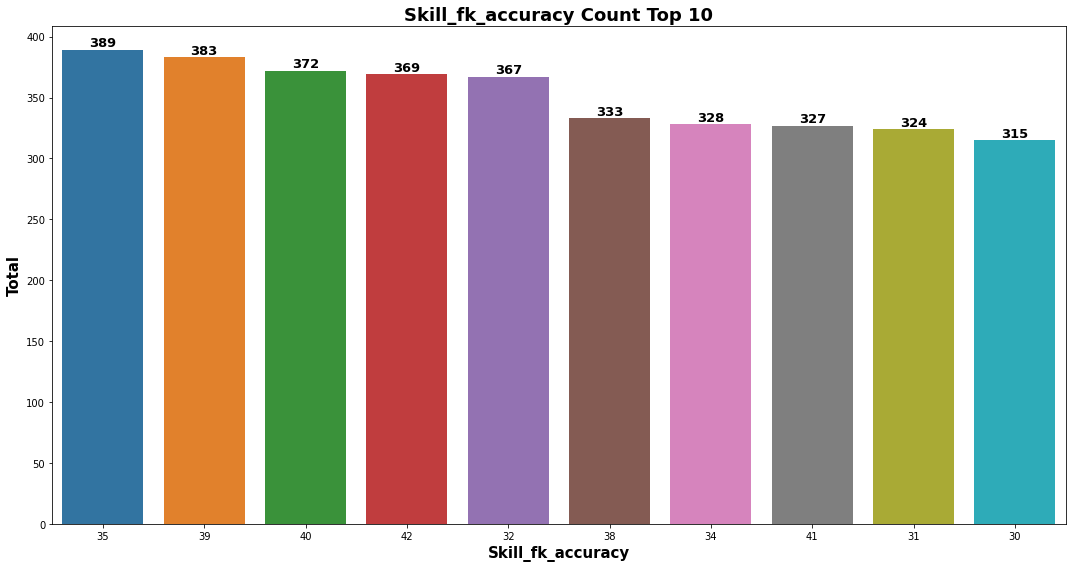

In [ ]:
barplot_analysis(data_col_numeric[17])

## Skill_long_passing Analysis

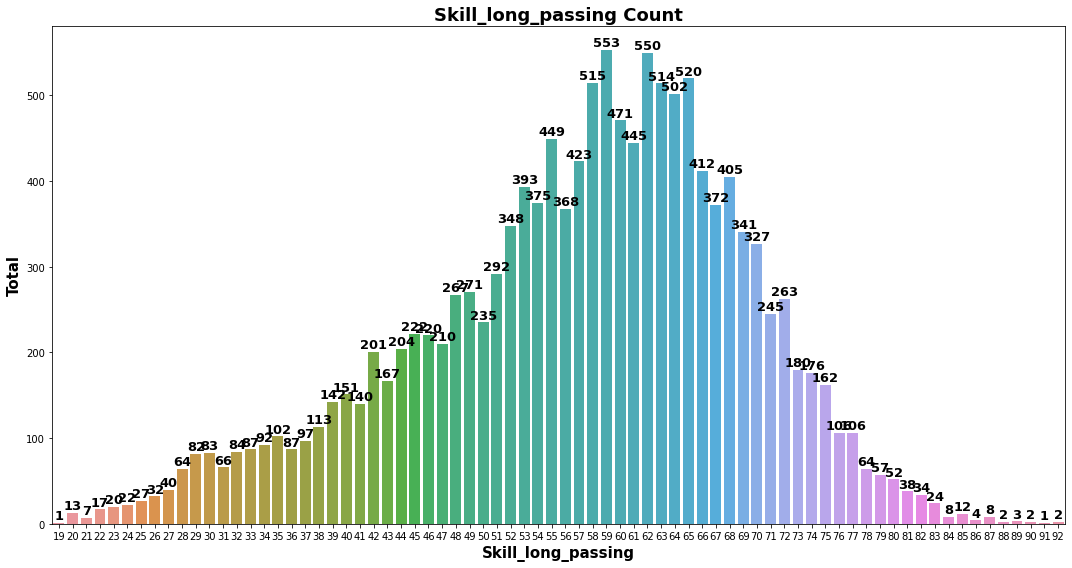

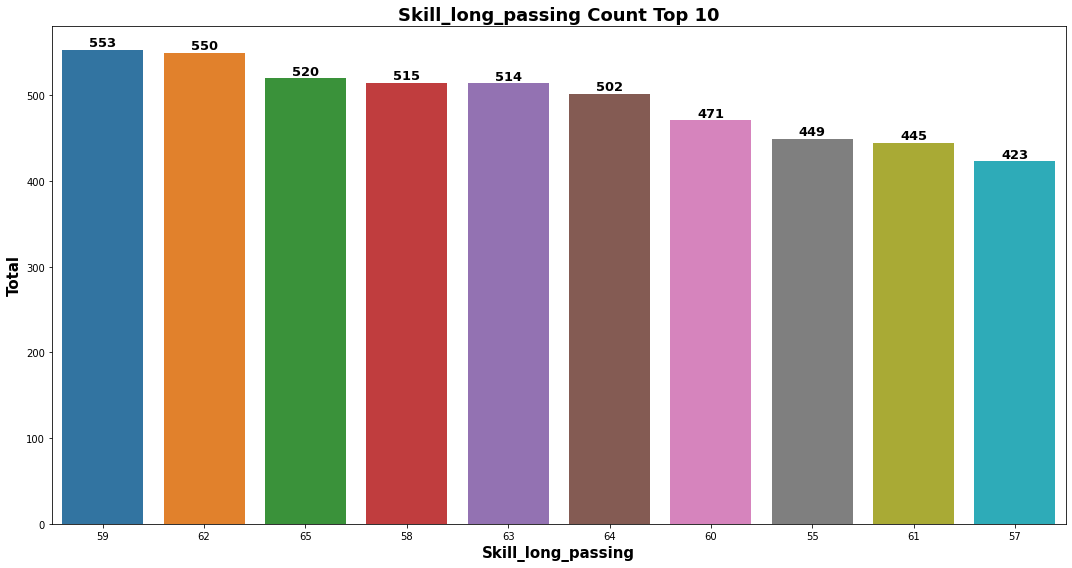

In [ ]:
barplot_analysis(data_col_numeric[18])

## Skill_ball_control Analysis

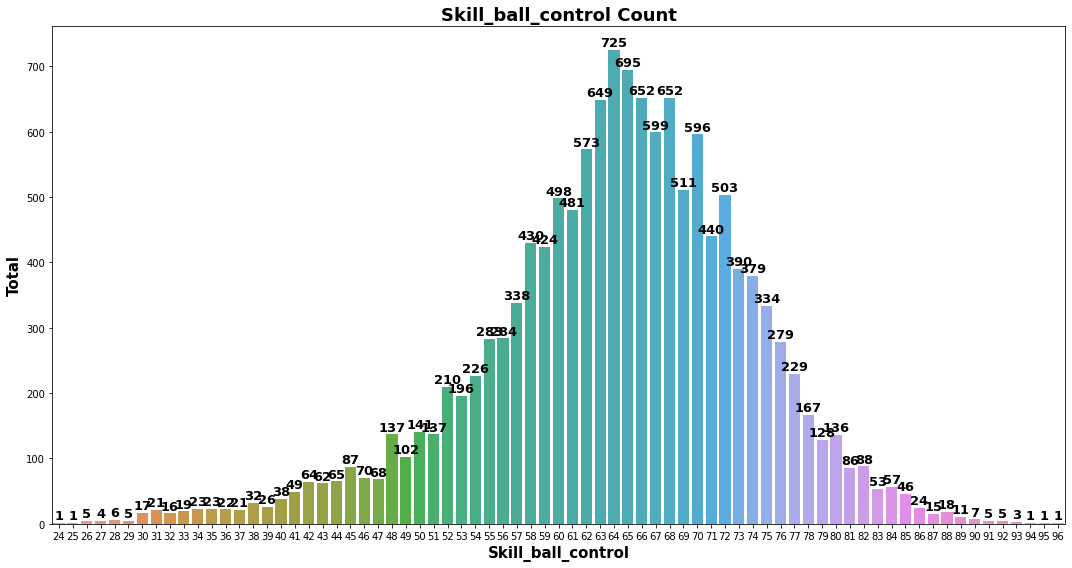

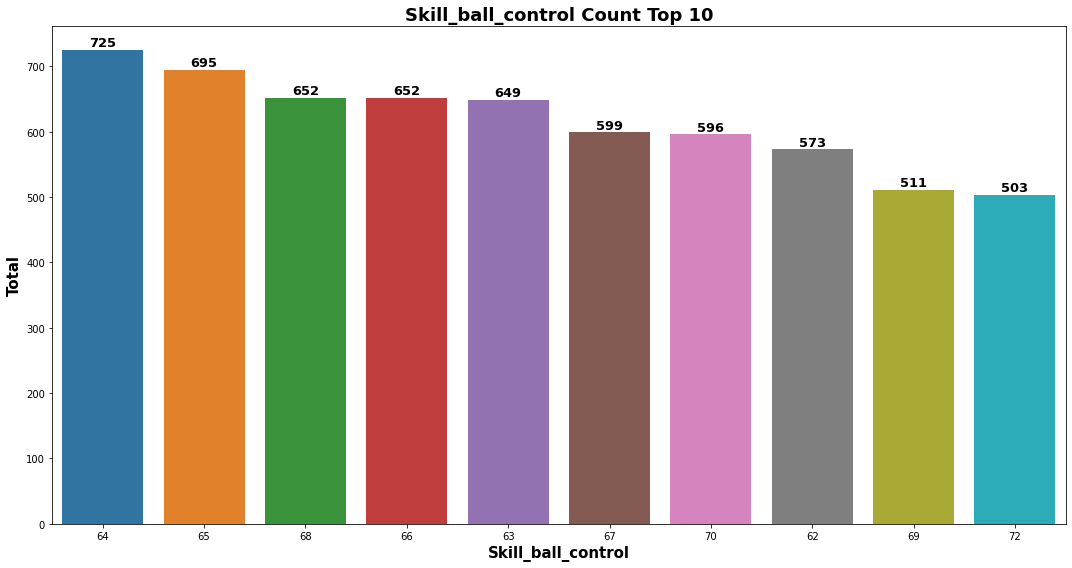

In [ ]:
barplot_analysis(data_col_numeric[19])

## Movement_acceleration Analysis

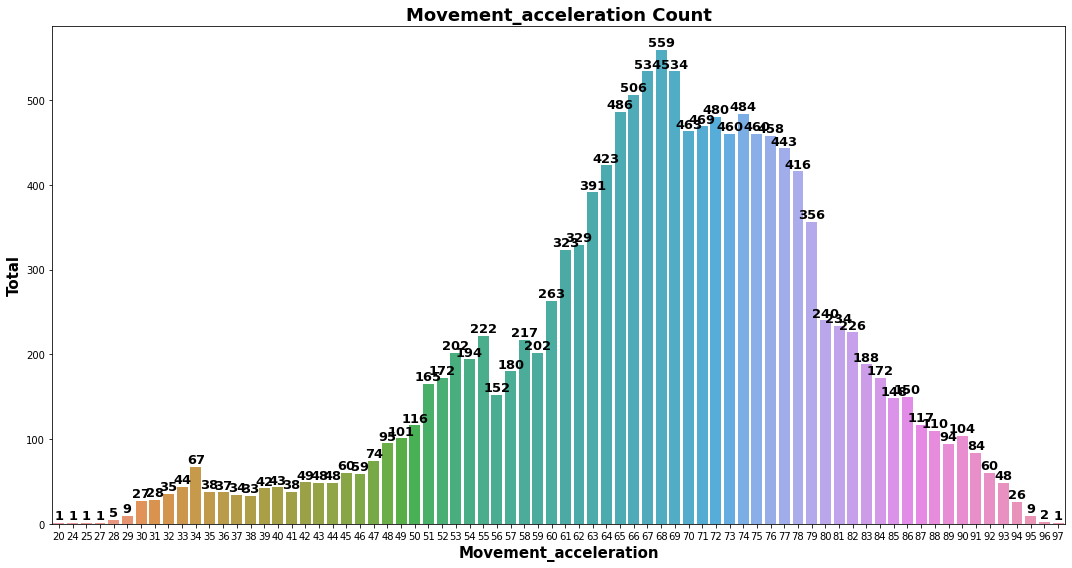

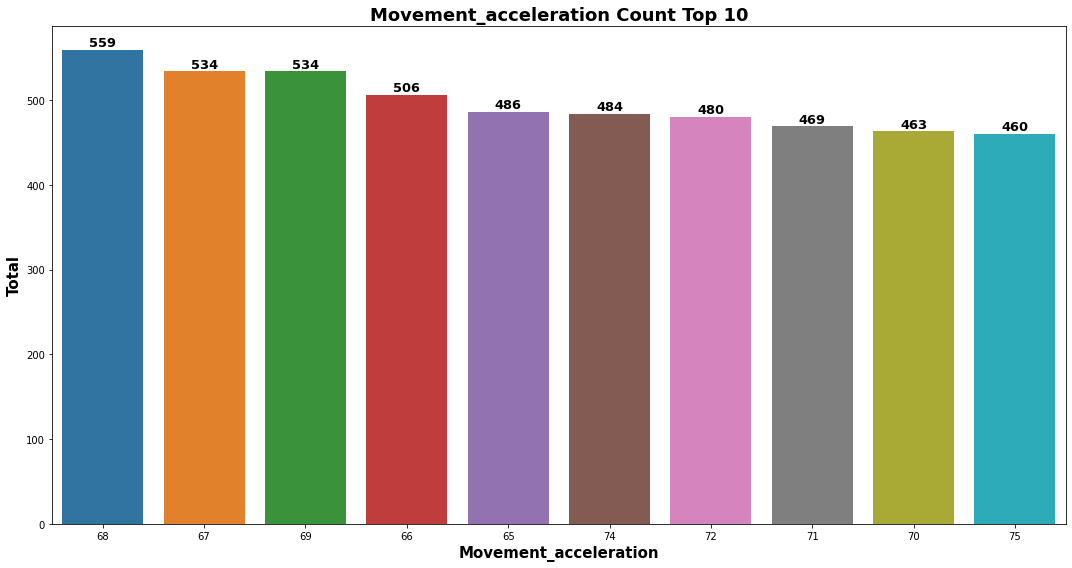

In [ ]:
barplot_analysis(data_col_numeric[20])

## Movement_sprint_speed Analysis

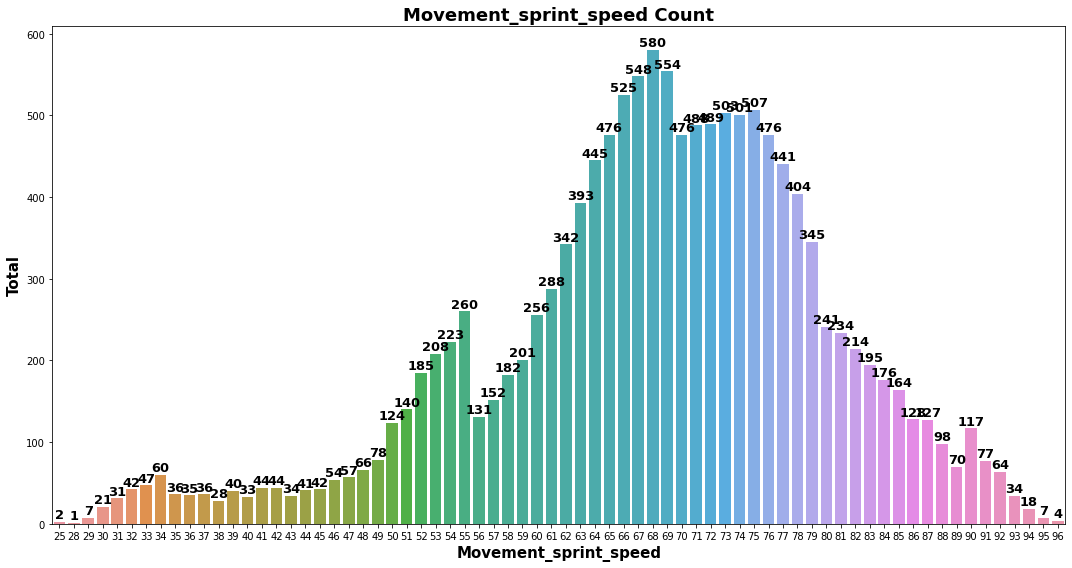

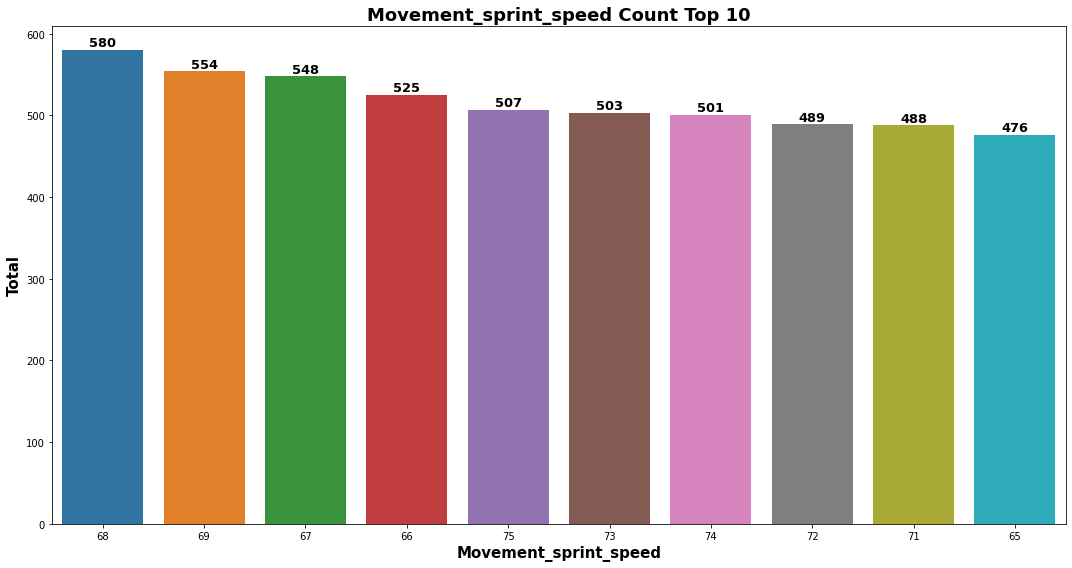

In [ ]:
barplot_analysis(data_col_numeric[21])

## Movement_agility Analysis

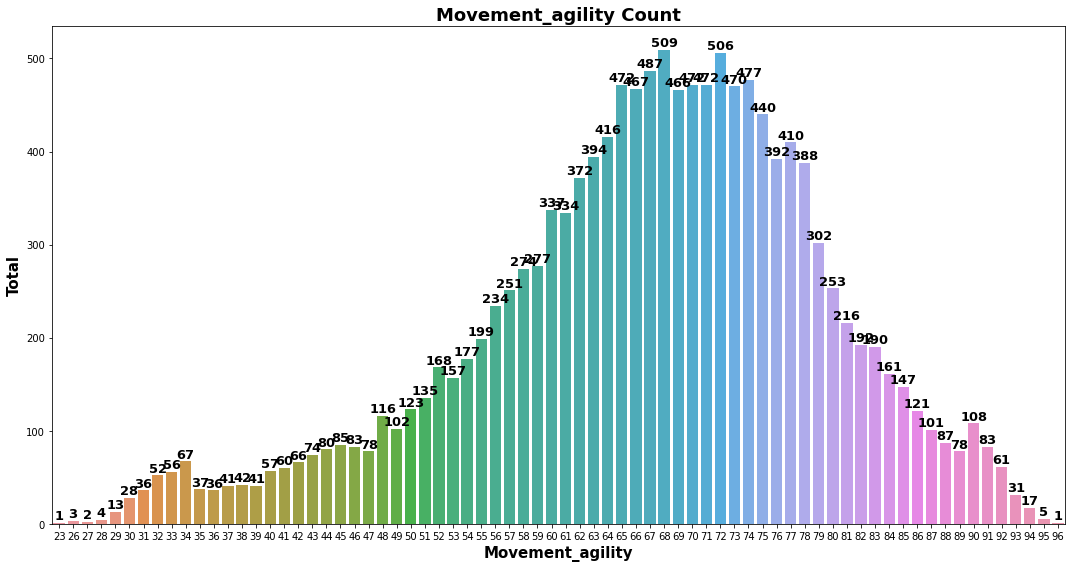

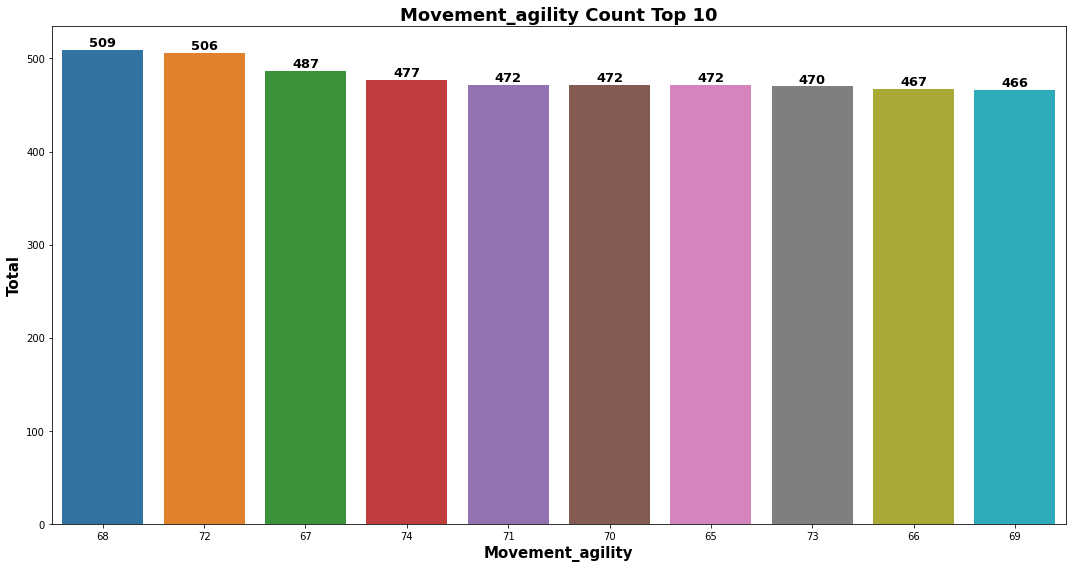

In [ ]:
barplot_analysis(data_col_numeric[22])

## Movement_reactions Analysis

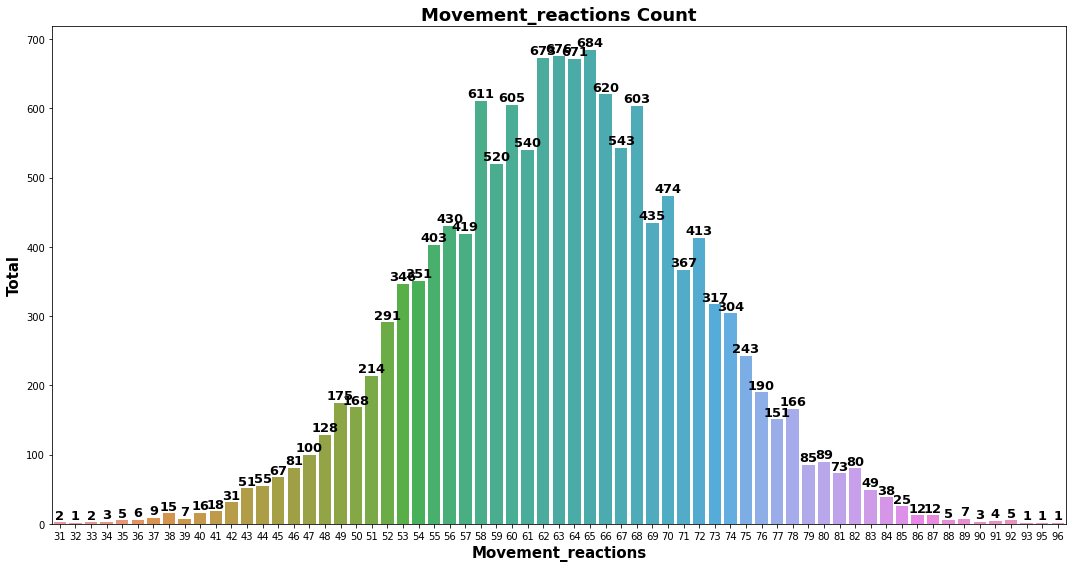

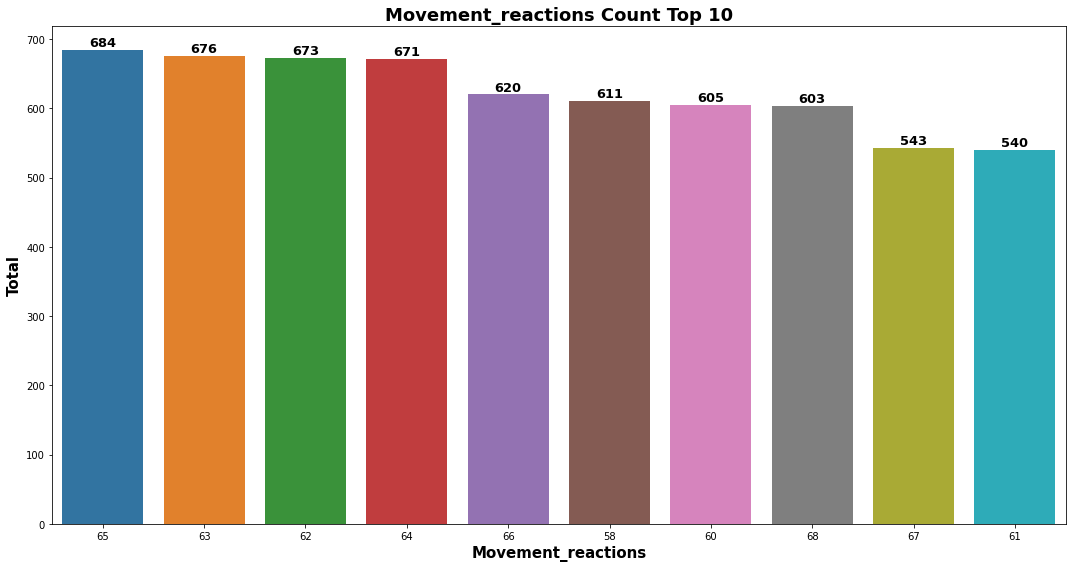

In [ ]:
barplot_analysis(data_col_numeric[23])

## Movement_balance Analysis

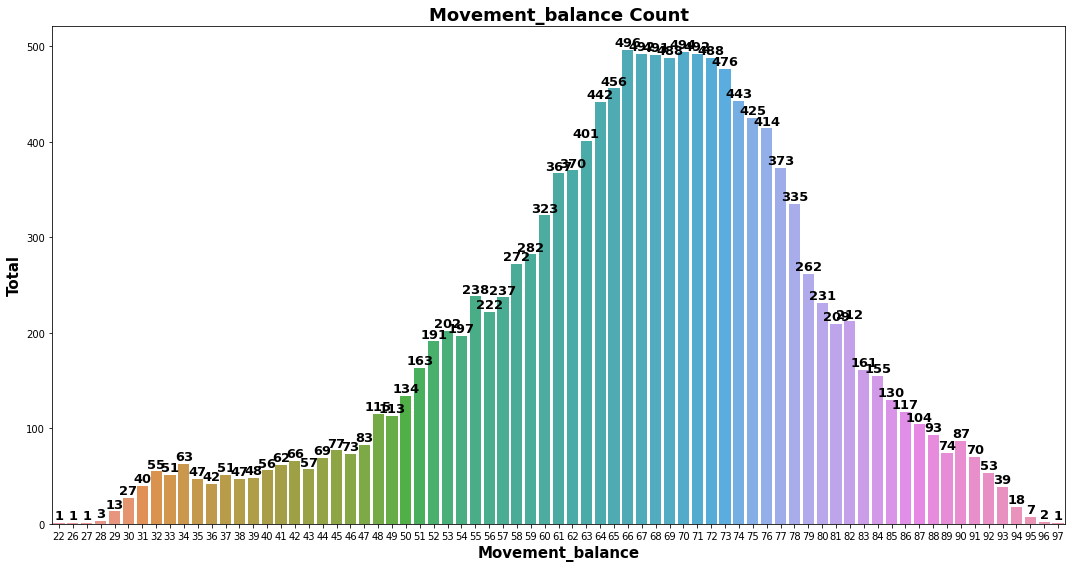

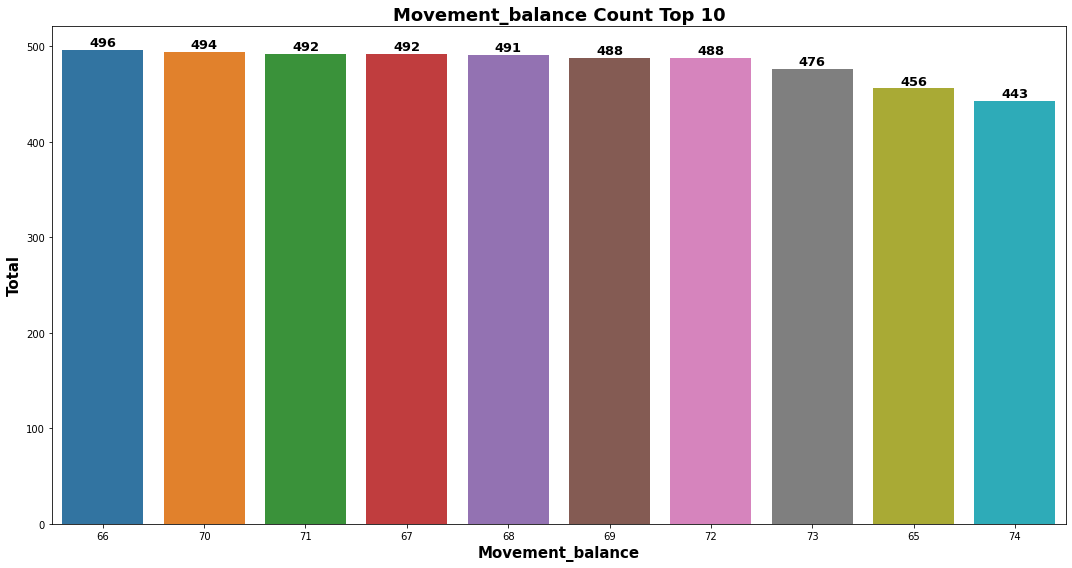

In [ ]:
barplot_analysis(data_col_numeric[24])

## Power_shot_power Analysis

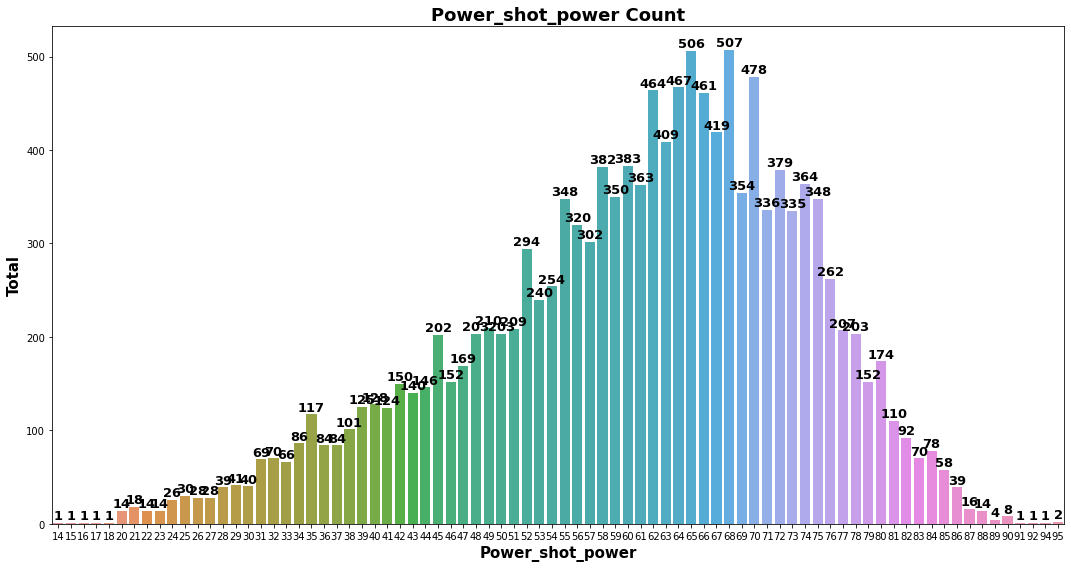

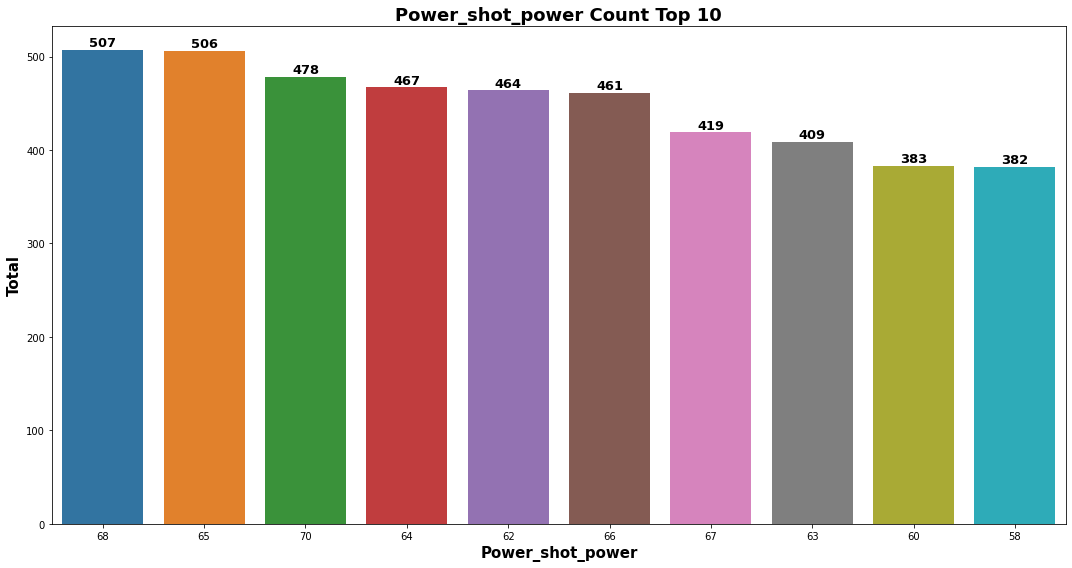

In [ ]:
barplot_analysis(data_col_numeric[25])

## Power_jumping Analysis

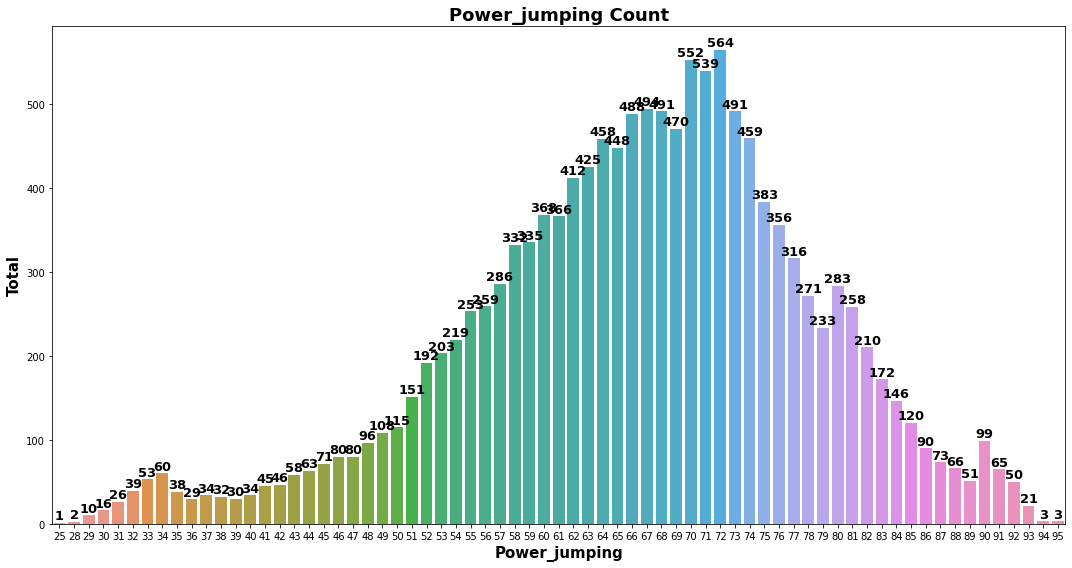

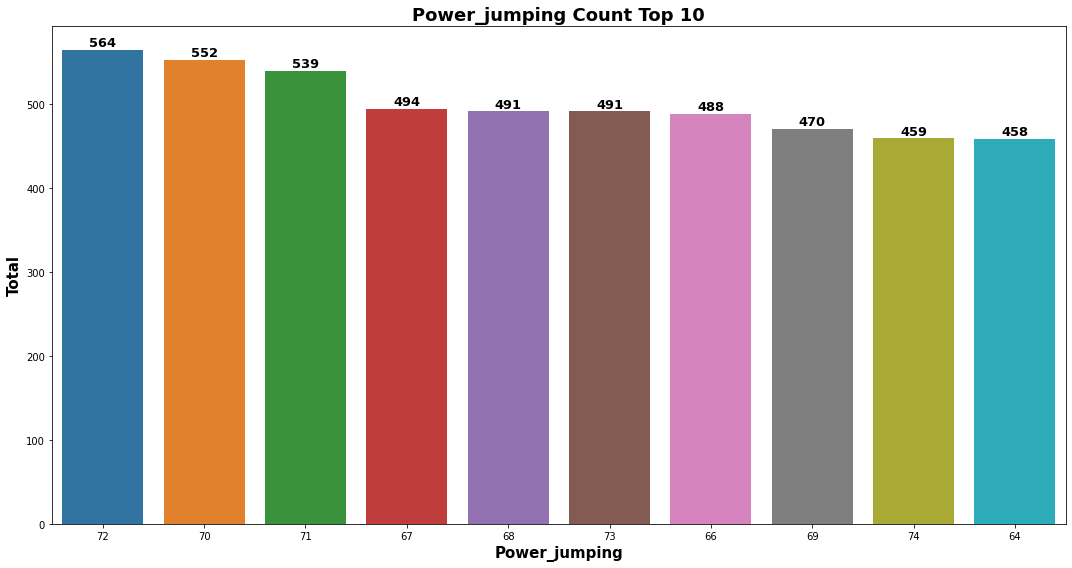

In [ ]:
barplot_analysis(data_col_numeric[26])

## Power_stamina Analysis

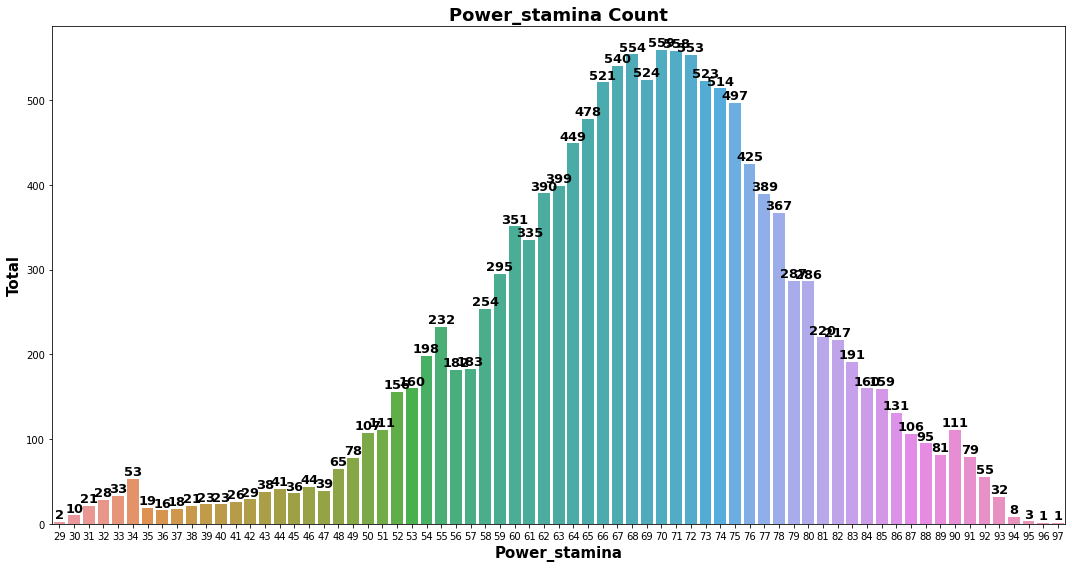

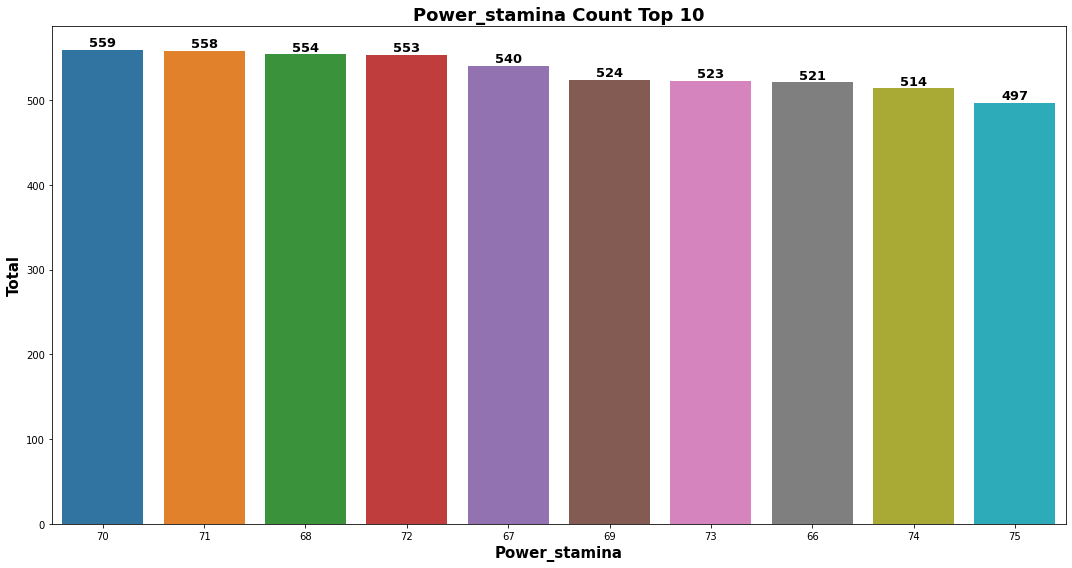

In [ ]:
barplot_analysis(data_col_numeric[27])

## Power_strength Analysis

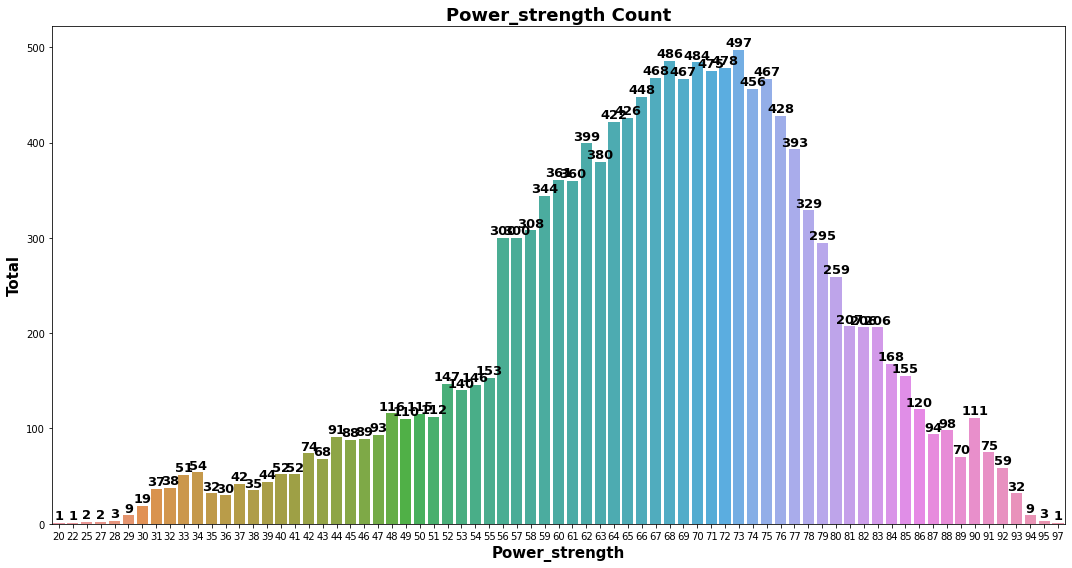

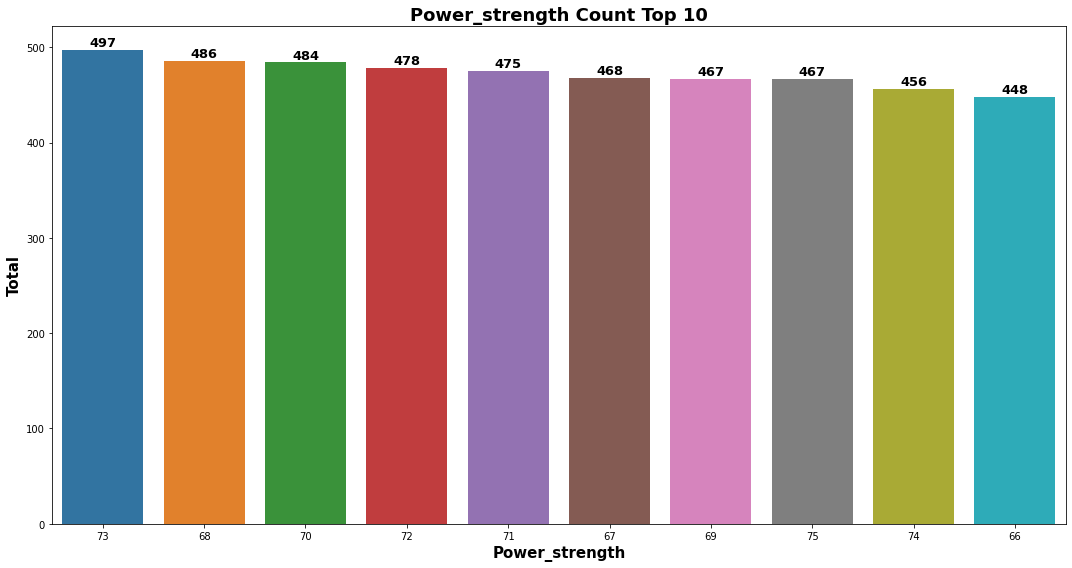

In [ ]:
barplot_analysis(data_col_numeric[28])

## Power_long_shots Analysis

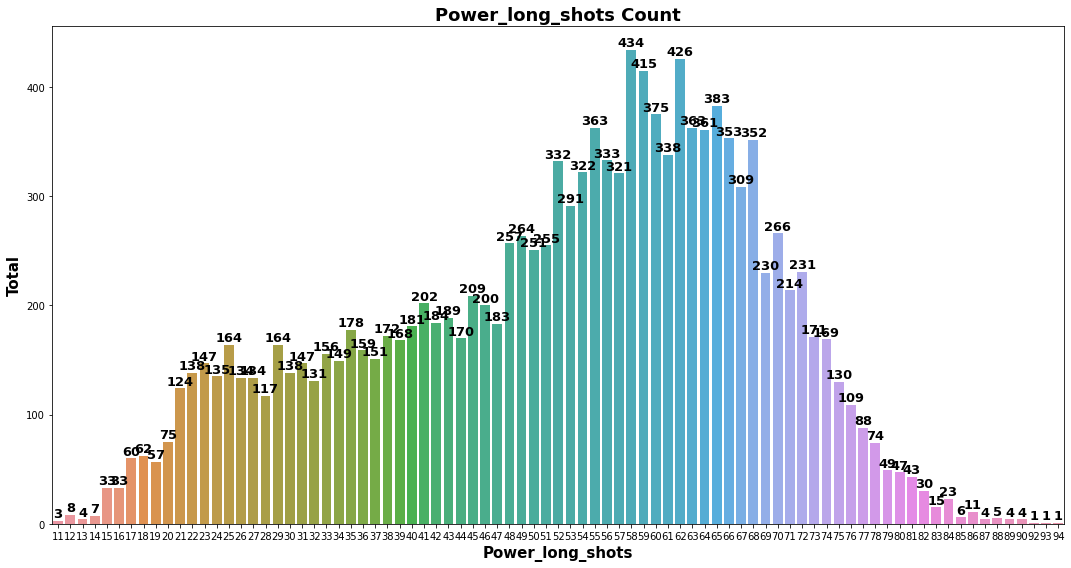

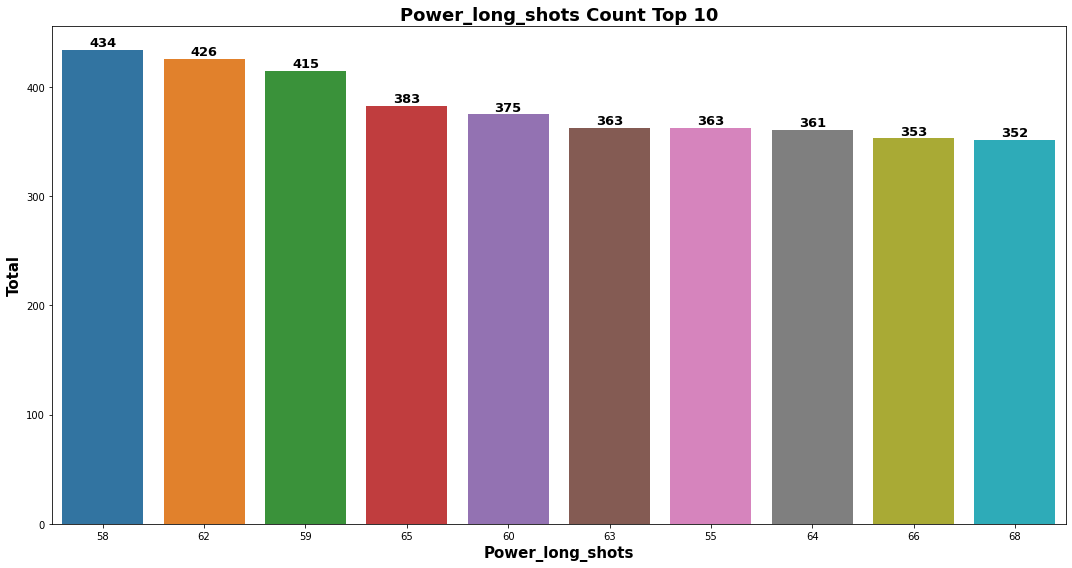

In [ ]:
barplot_analysis(data_col_numeric[29])

## Mentality_aggression Analysis

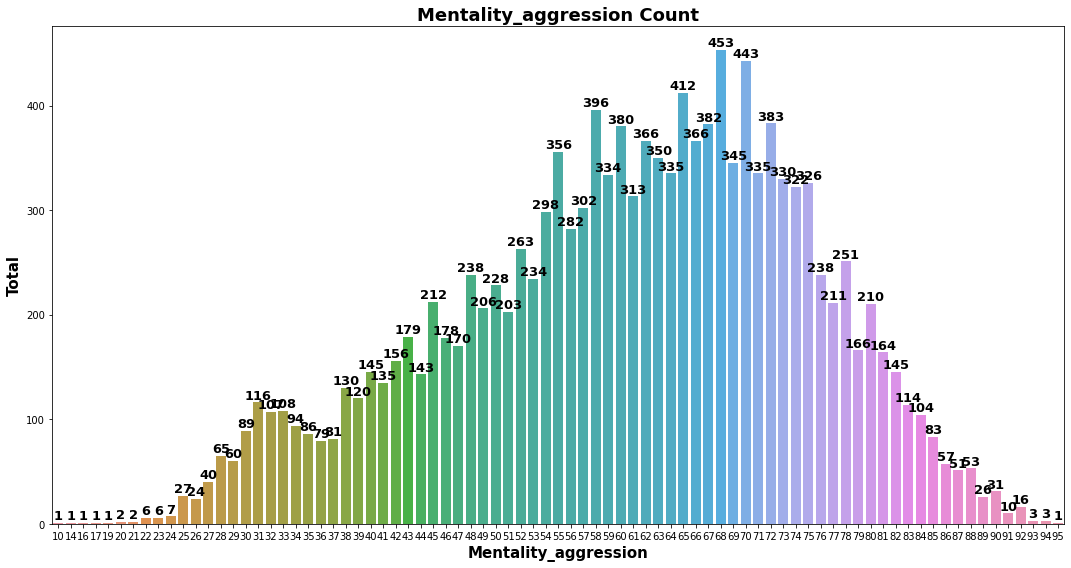

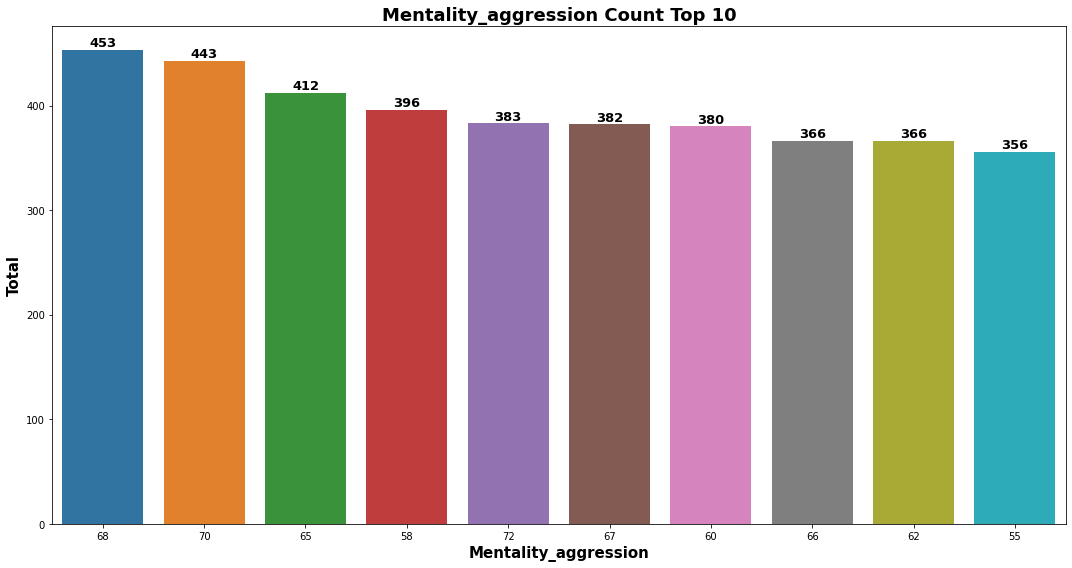

In [ ]:
barplot_analysis(data_col_numeric[30])

## Mentality_interceptions Analysis

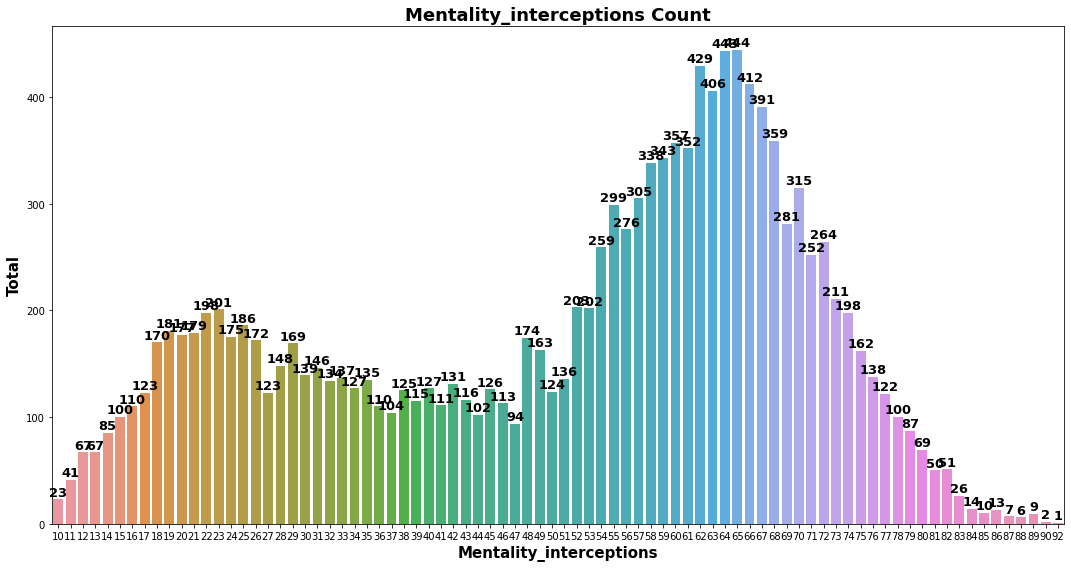

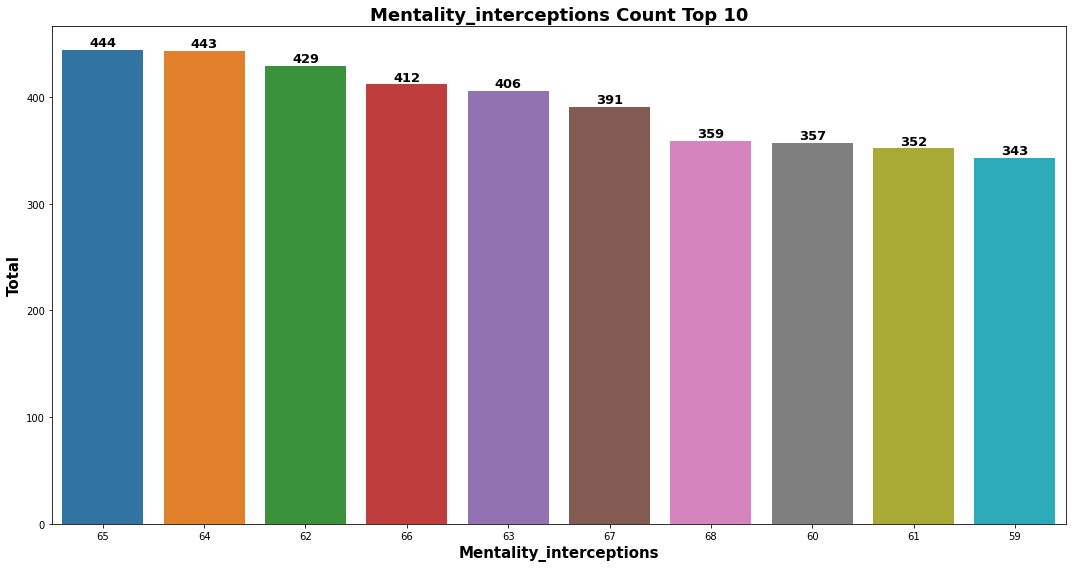

In [ ]:
barplot_analysis(data_col_numeric[31])

## Mentality_positioning Analysis

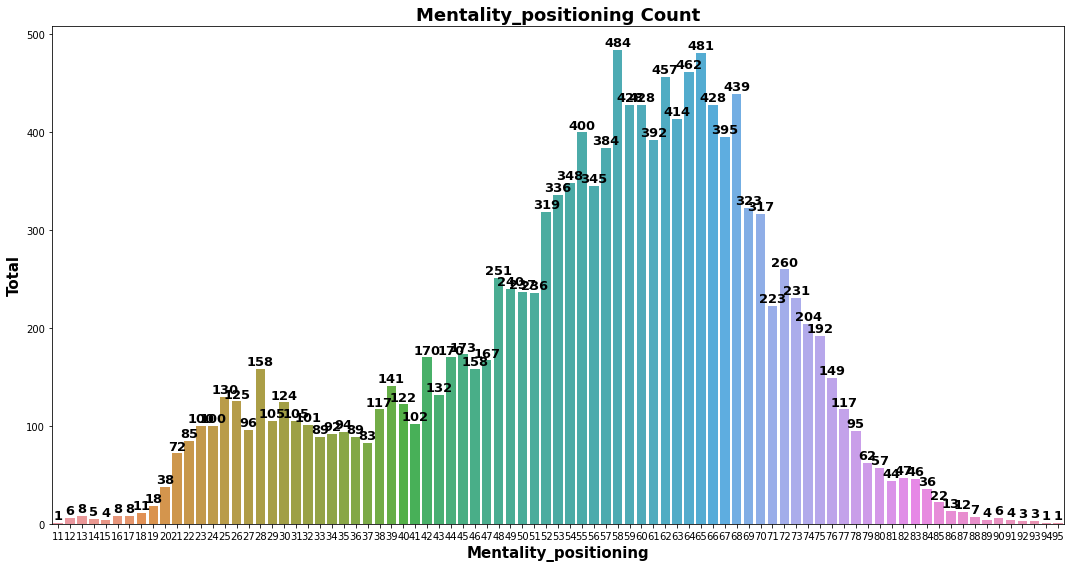

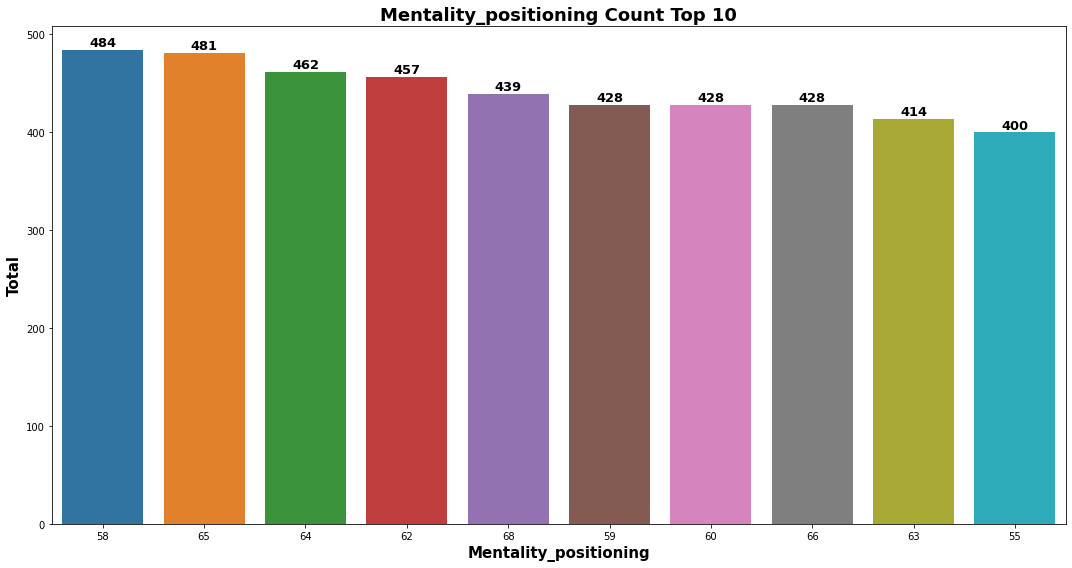

In [ ]:
barplot_analysis(data_col_numeric[32])

## Mentality_vision Analysis

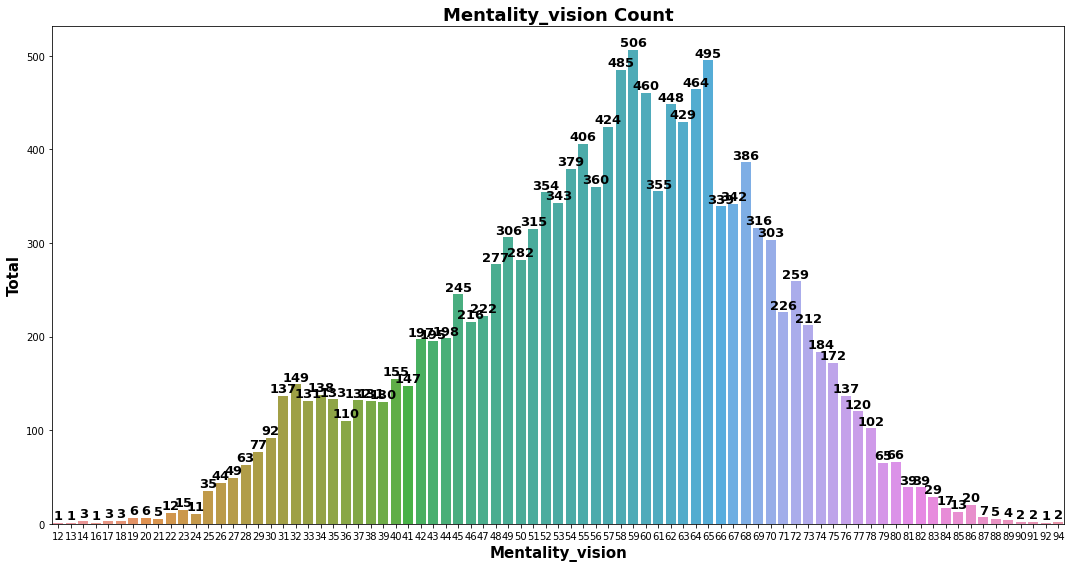

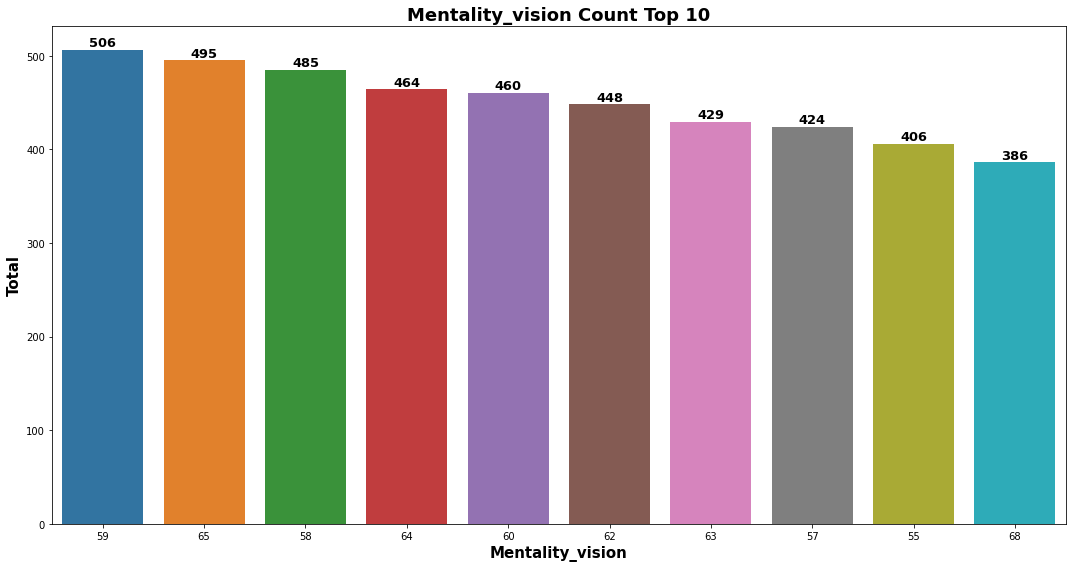

In [ ]:
barplot_analysis(data_col_numeric[33])

## Mentality_penalties Analysis

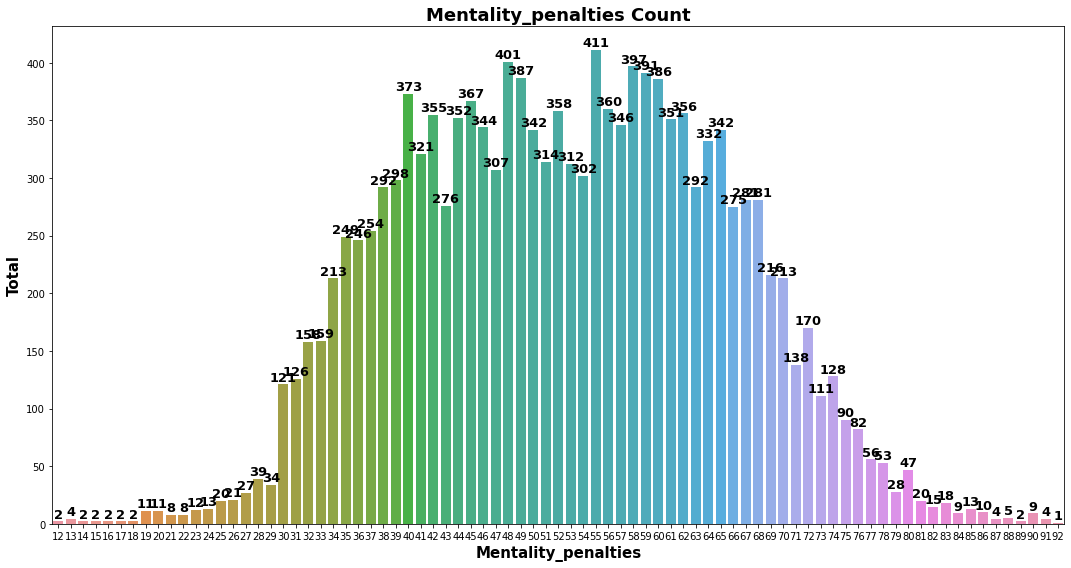

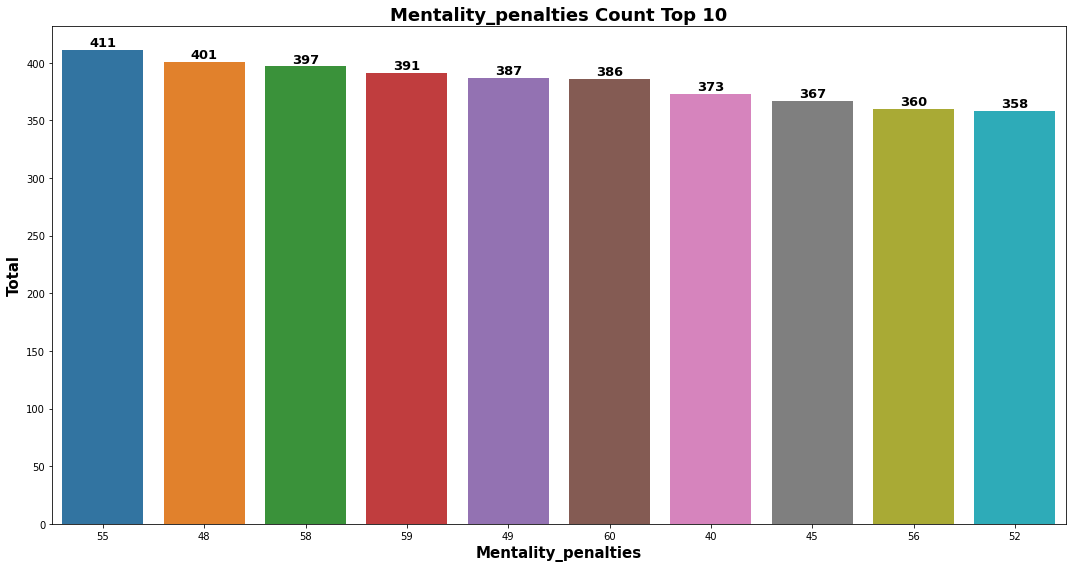

In [ ]:
barplot_analysis(data_col_numeric[34])

## Mentality_composure Analysis

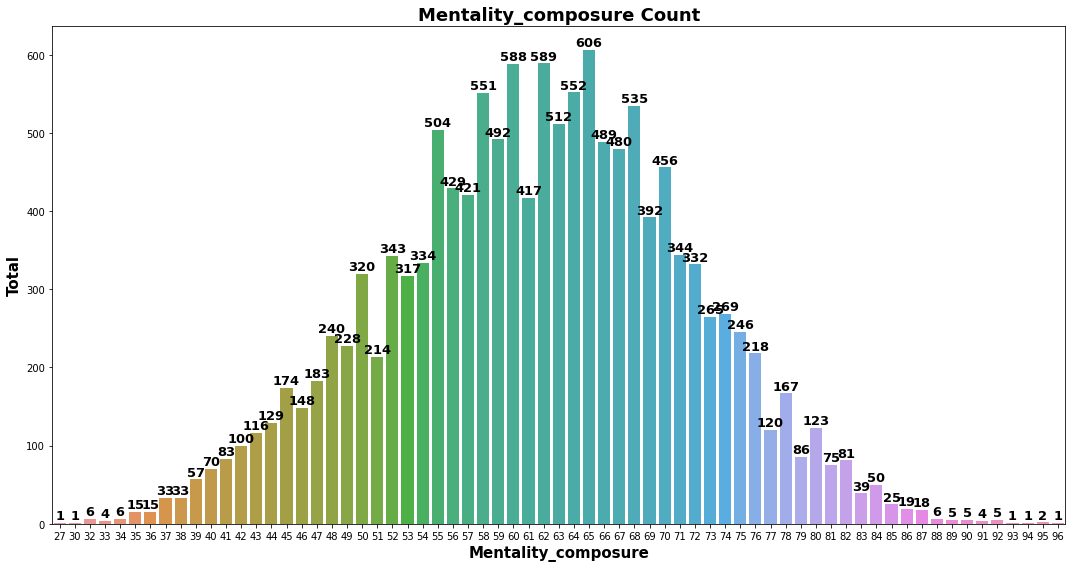

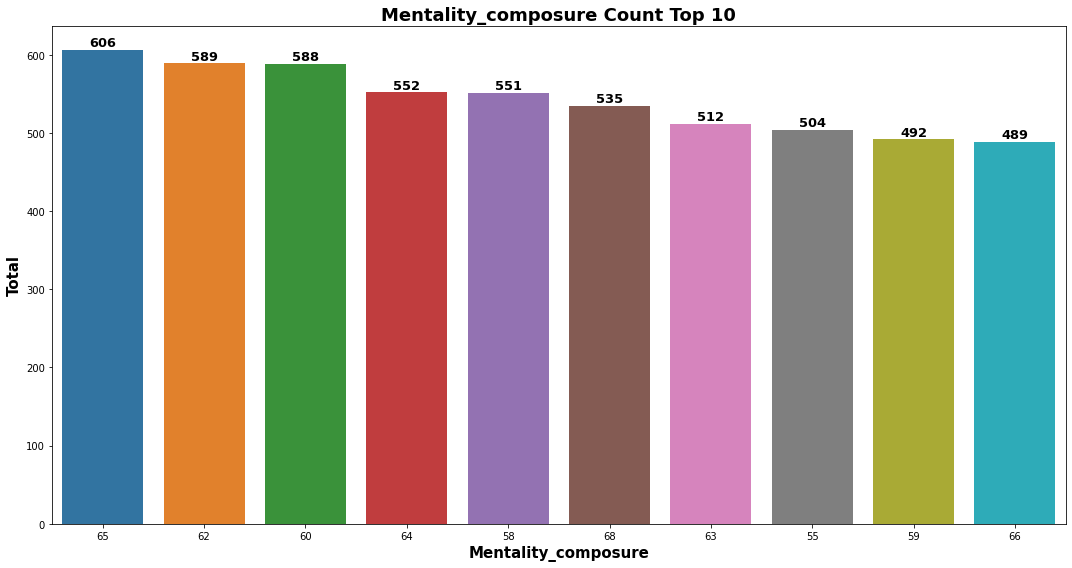

In [ ]:
barplot_analysis(data_col_numeric[35])

## Defending_marking Analysis

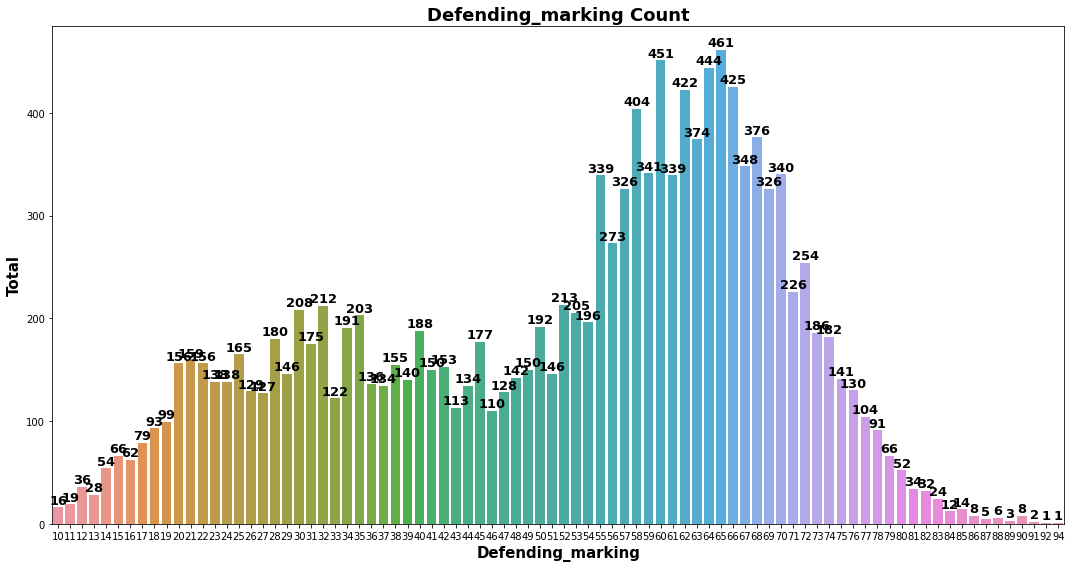

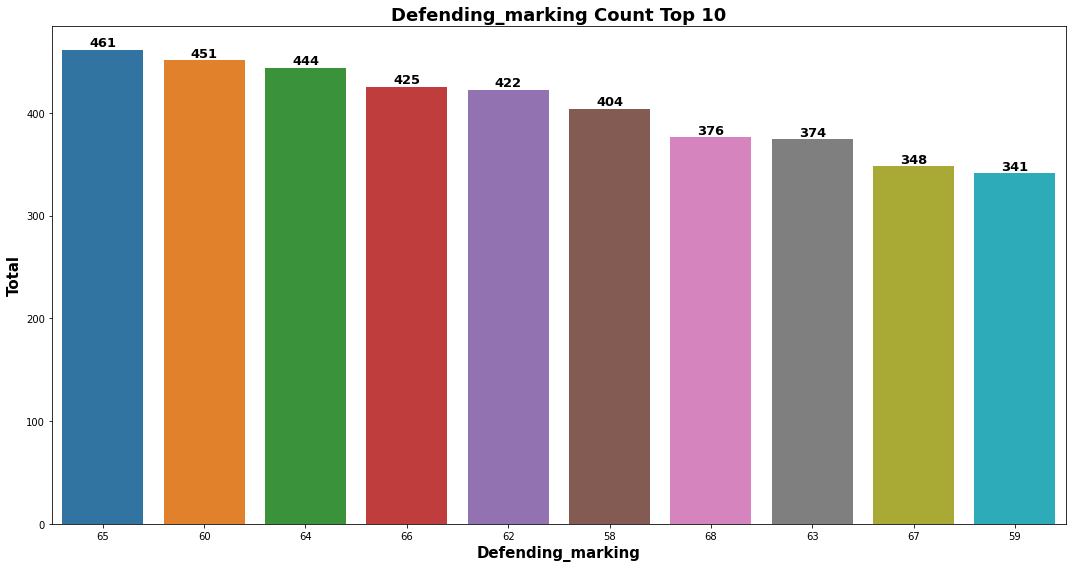

In [ ]:
barplot_analysis(data_col_numeric[36])

## Defending_standing_tackle Analysis

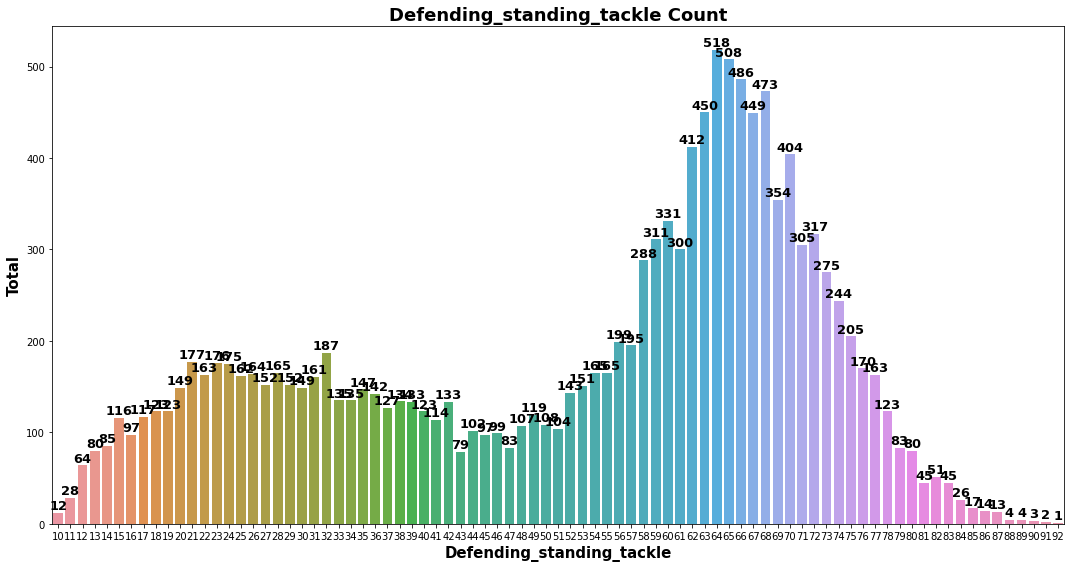

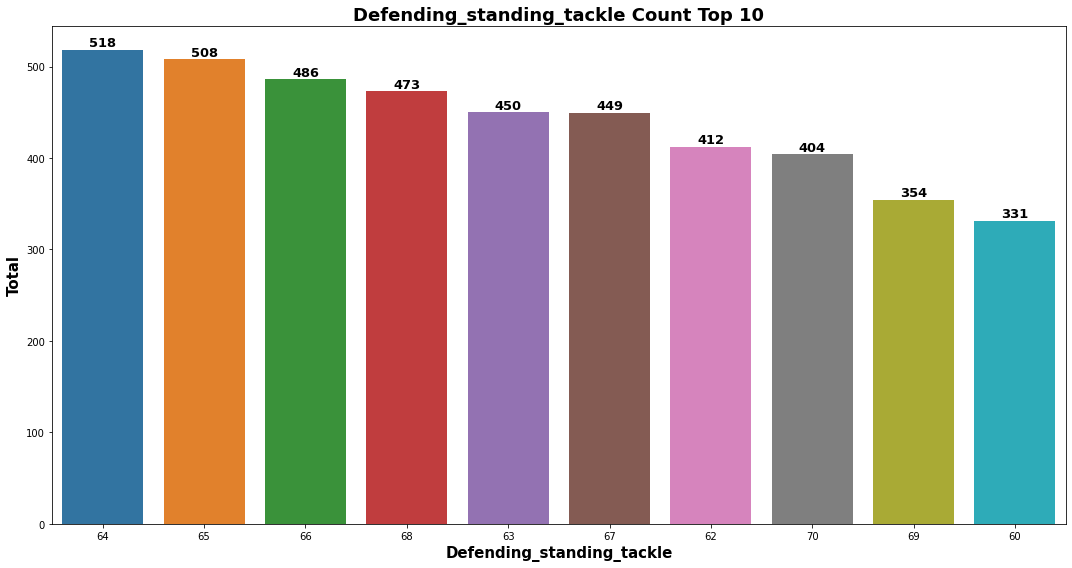

In [ ]:
barplot_analysis(data_col_numeric[37])

## Defending_sliding_tackle Analysis

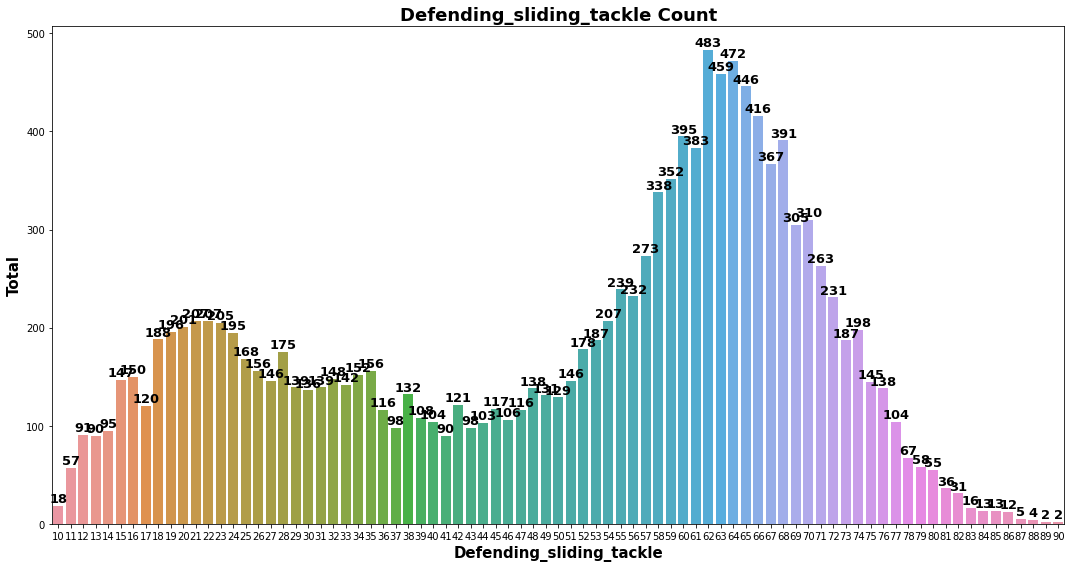

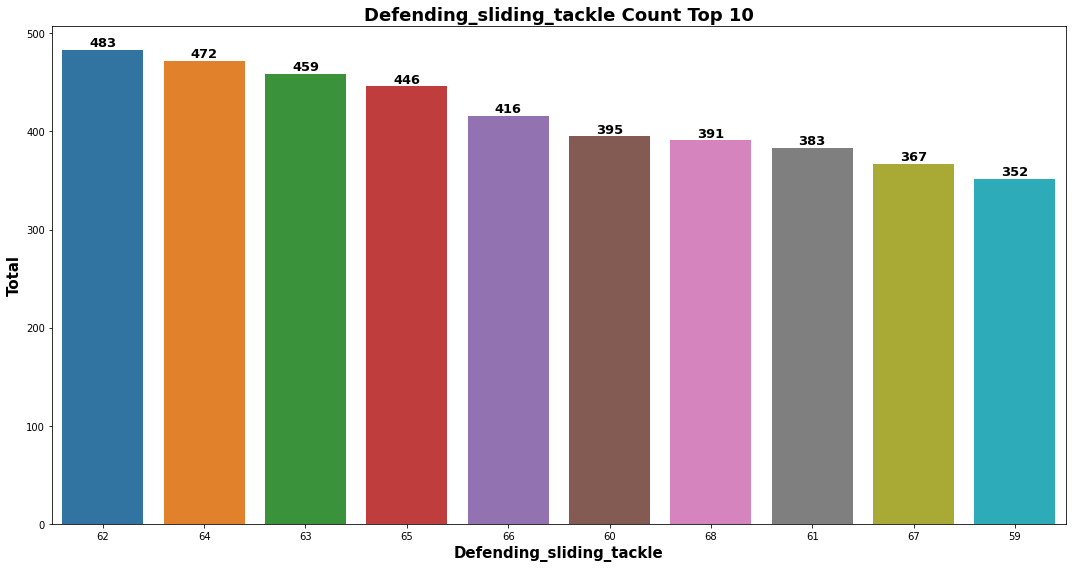

In [ ]:
barplot_analysis(data_col_numeric[38])

## Goalkeeping_diving  Analysis

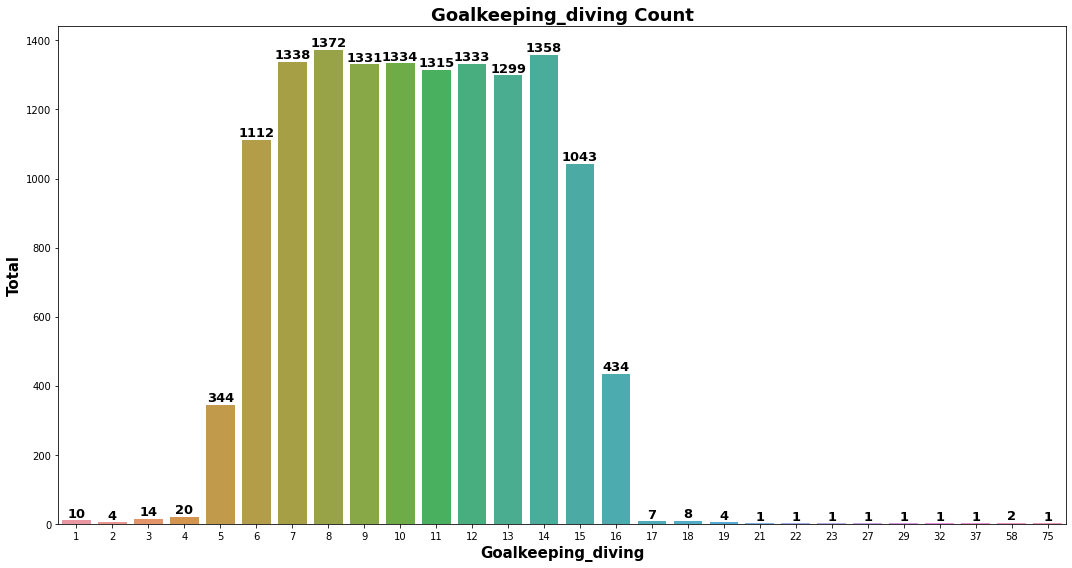

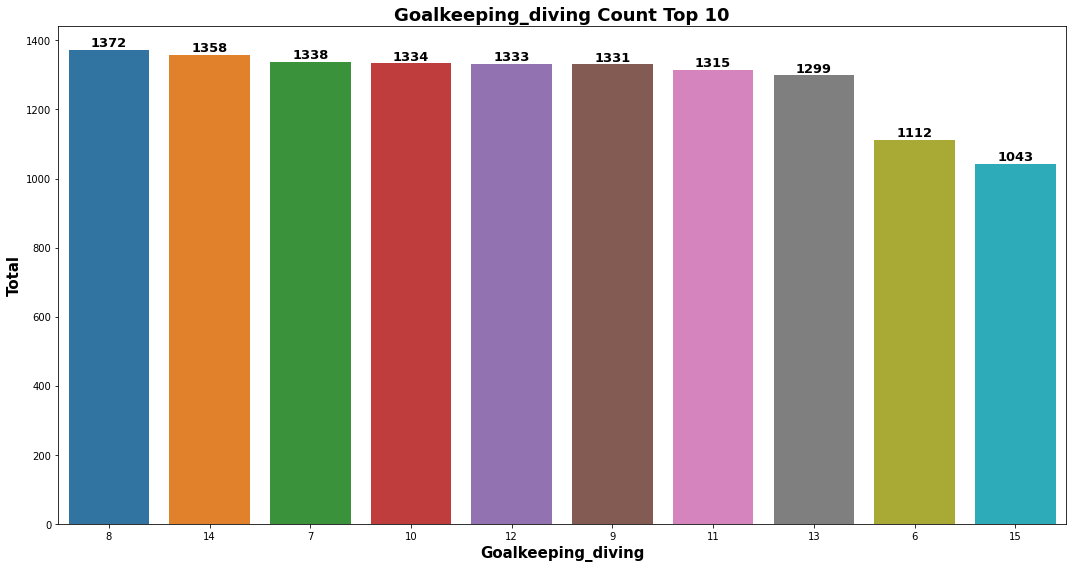

In [ ]:
barplot_analysis(data_col_numeric[39])

## Goalkeeping_handling  Analysis

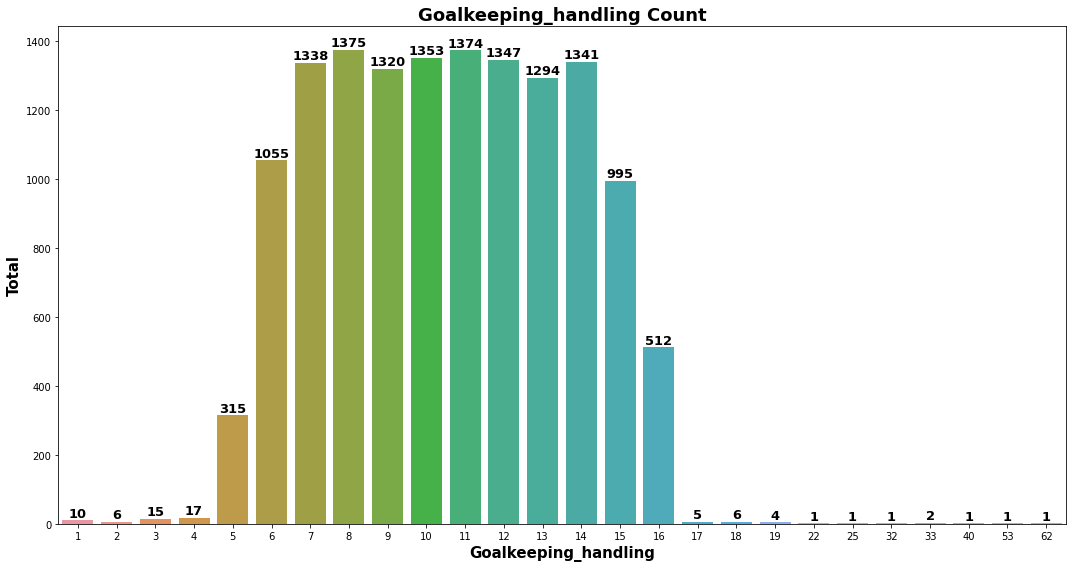

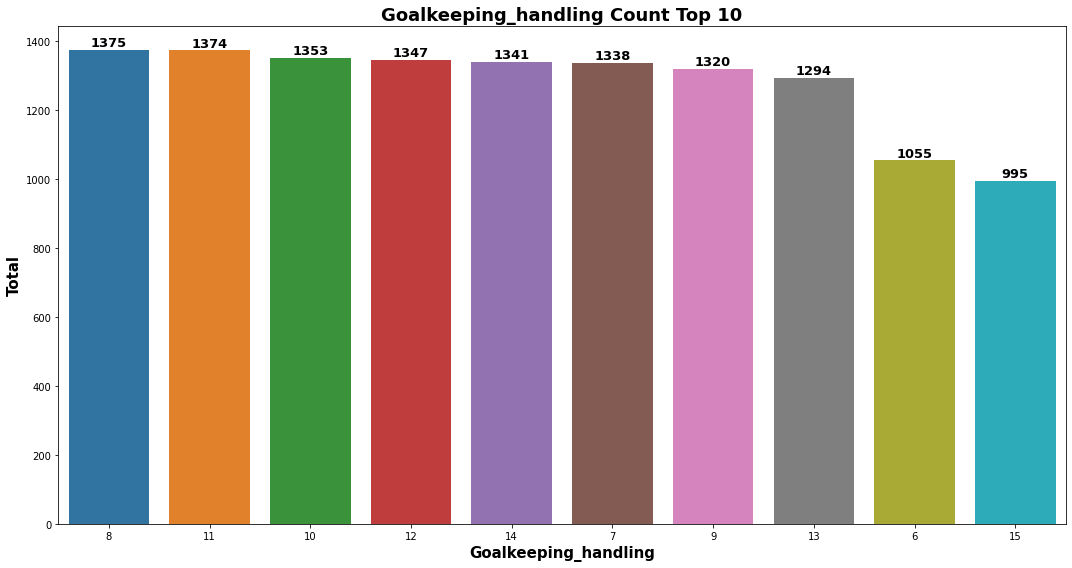

In [ ]:
barplot_analysis(data_col_numeric[40])

## Goalkeeping_kicking Analysis Analysis

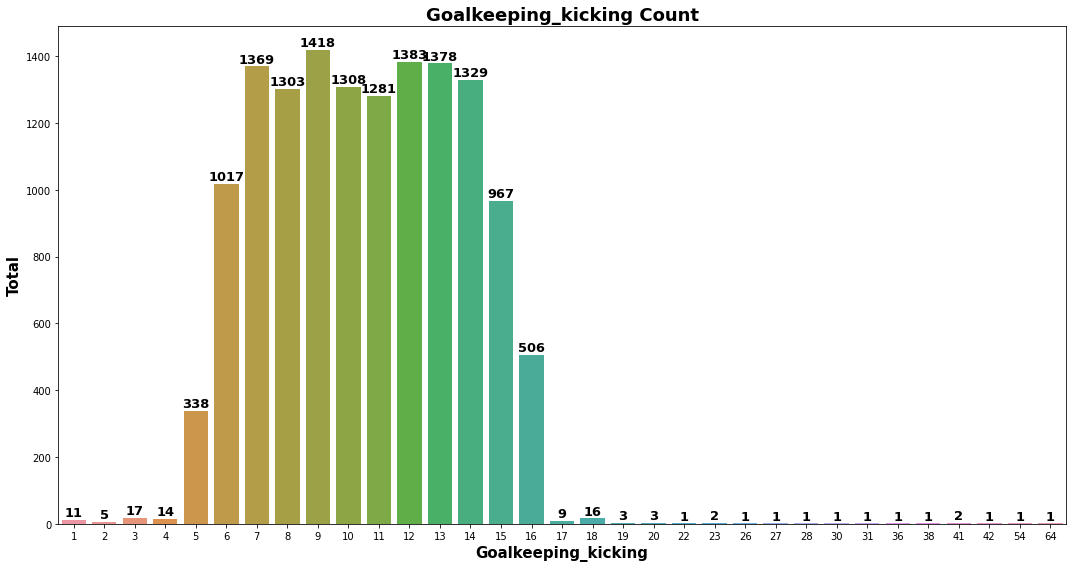

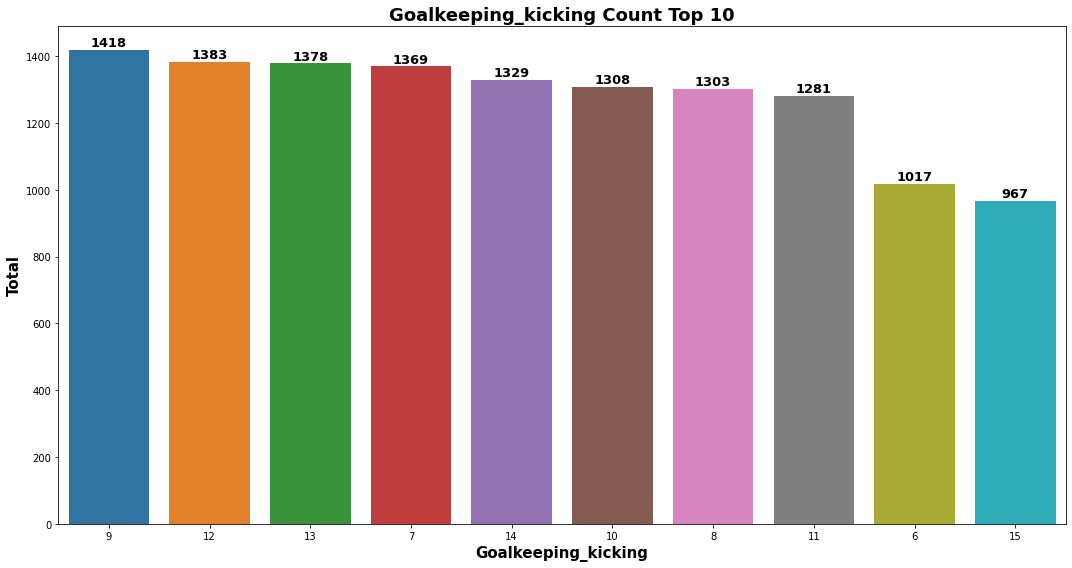

In [ ]:
barplot_analysis(data_col_numeric[41])

## Goalkeeping_positioning  Analysis

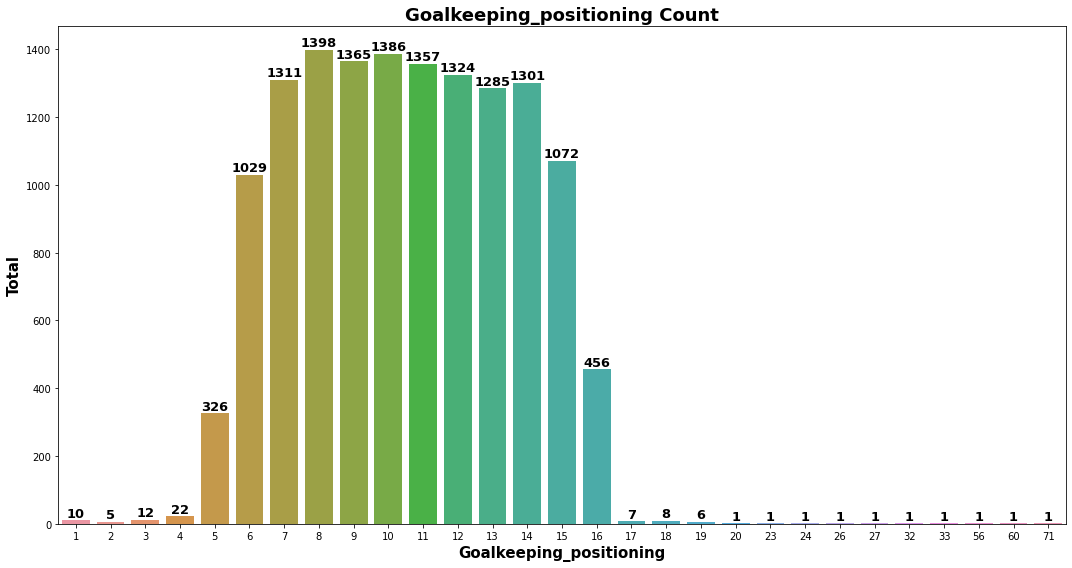

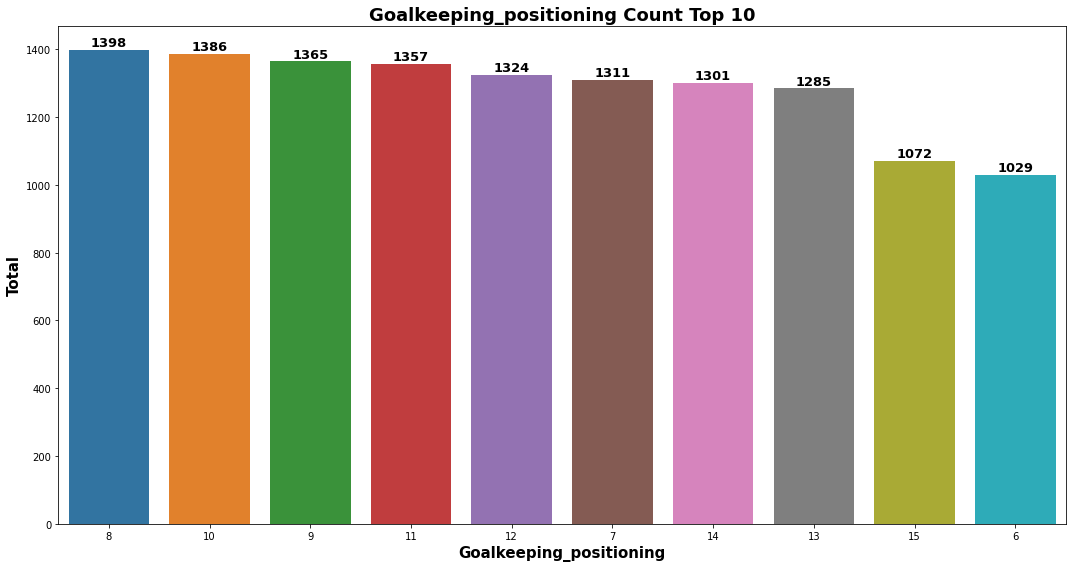

In [ ]:
barplot_analysis(data_col_numeric[42])

## Goalkeeping_reflexes Analysis

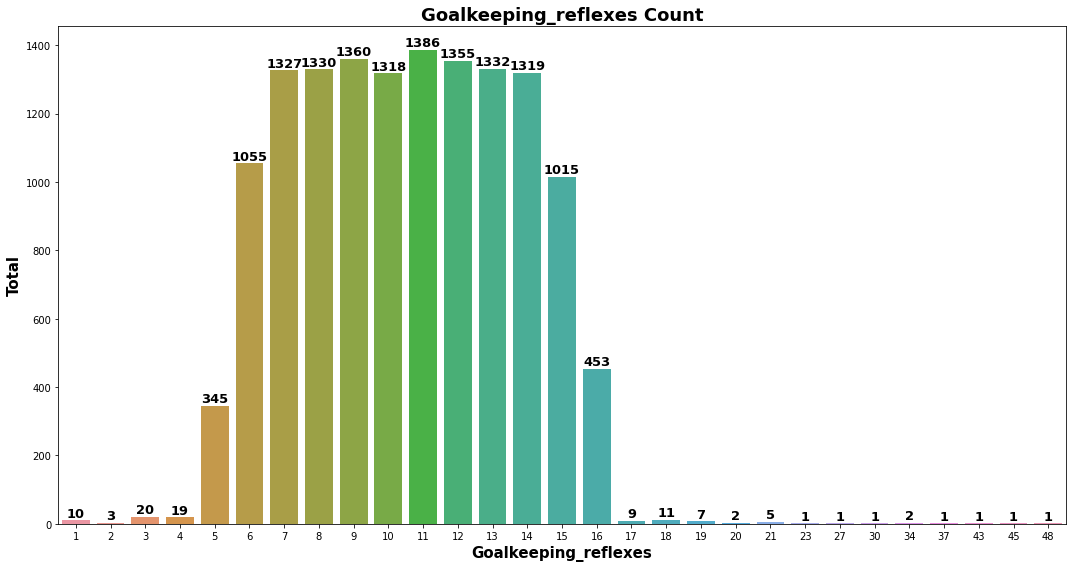

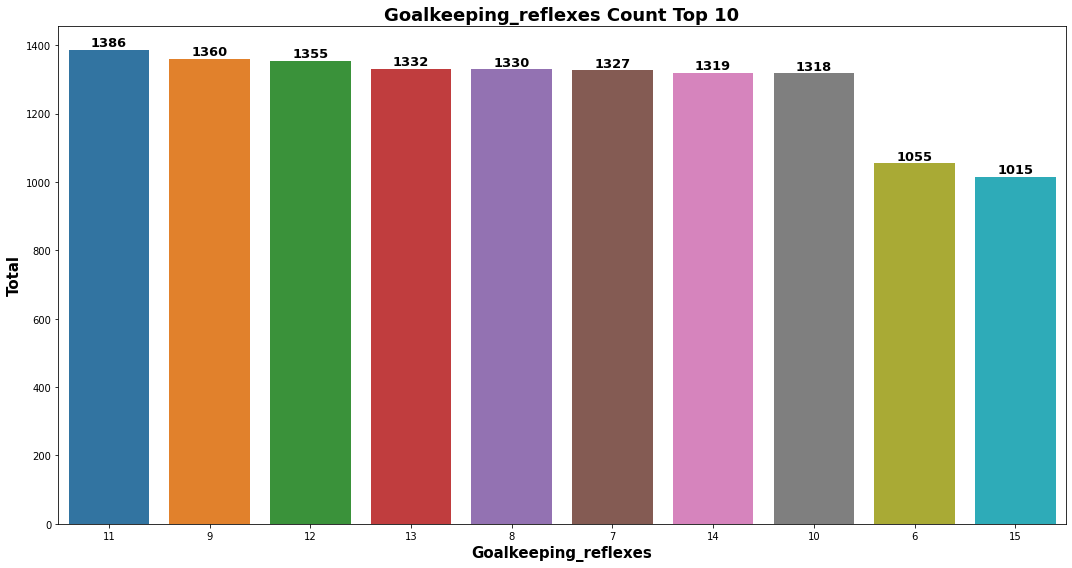

In [ ]:
barplot_analysis(data_col_numeric[43])

# Visualization Float Analysis

We will not use release_clause_eur

In [ ]:
data_col_float

['release_clause_eur',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic']

## Contract_valid_until Analysis

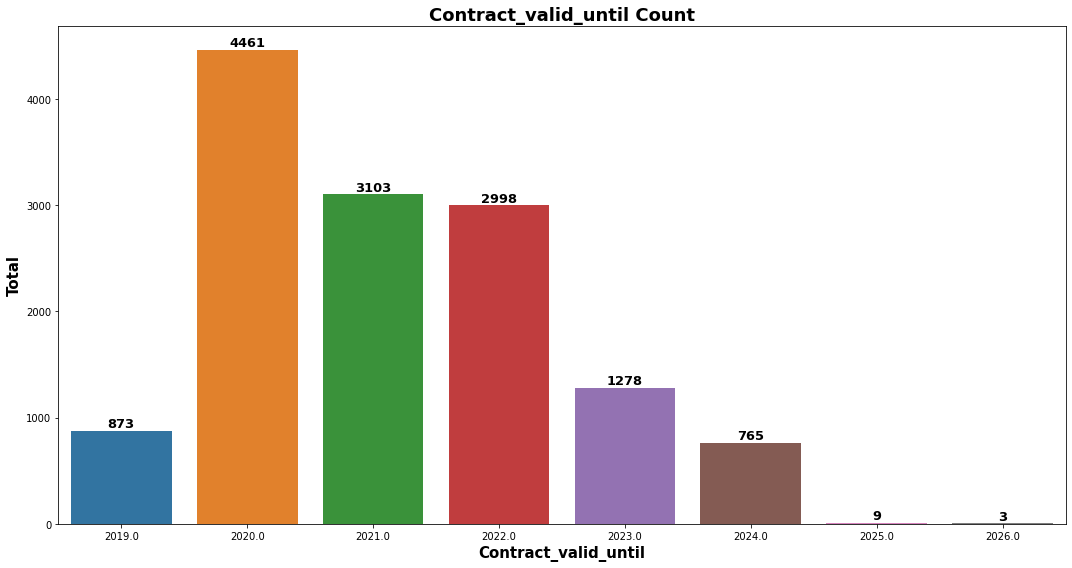

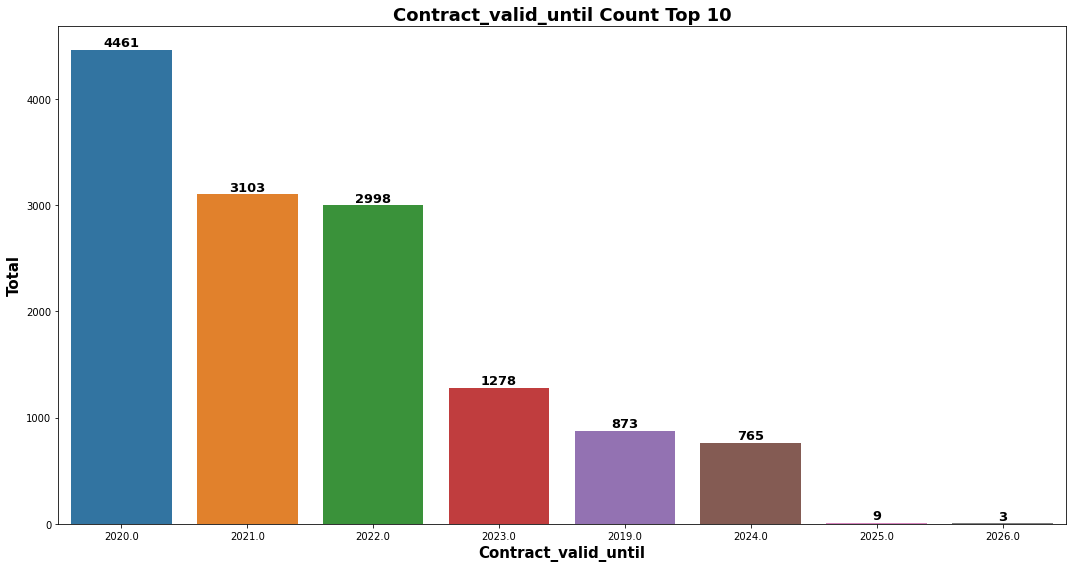

In [ ]:
barplot_analysis(data_col_float[1])

## Pace Analysis

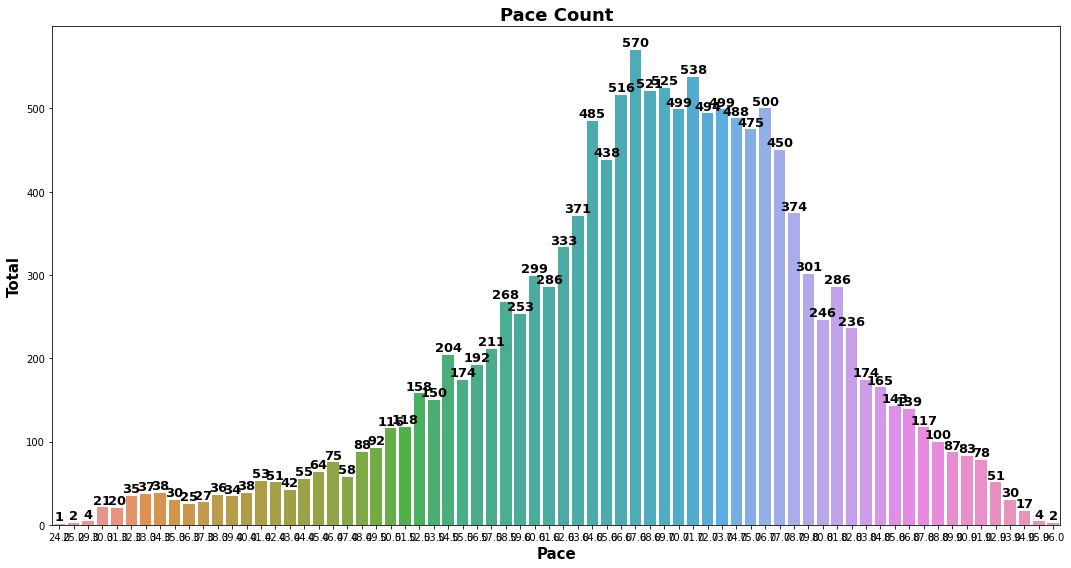

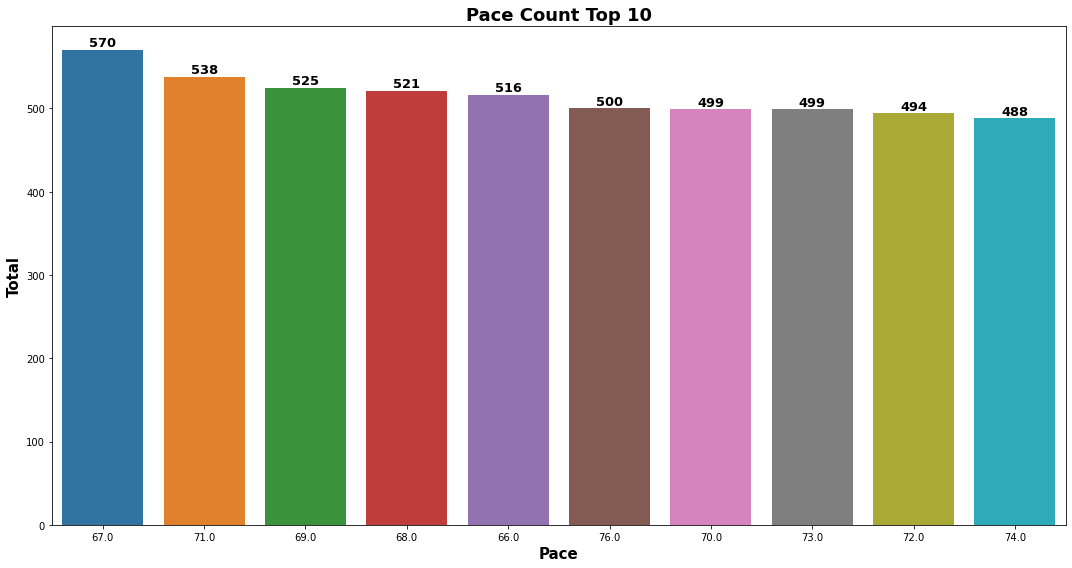

In [ ]:
barplot_analysis(data_col_float[2])

## Shooting Analysis

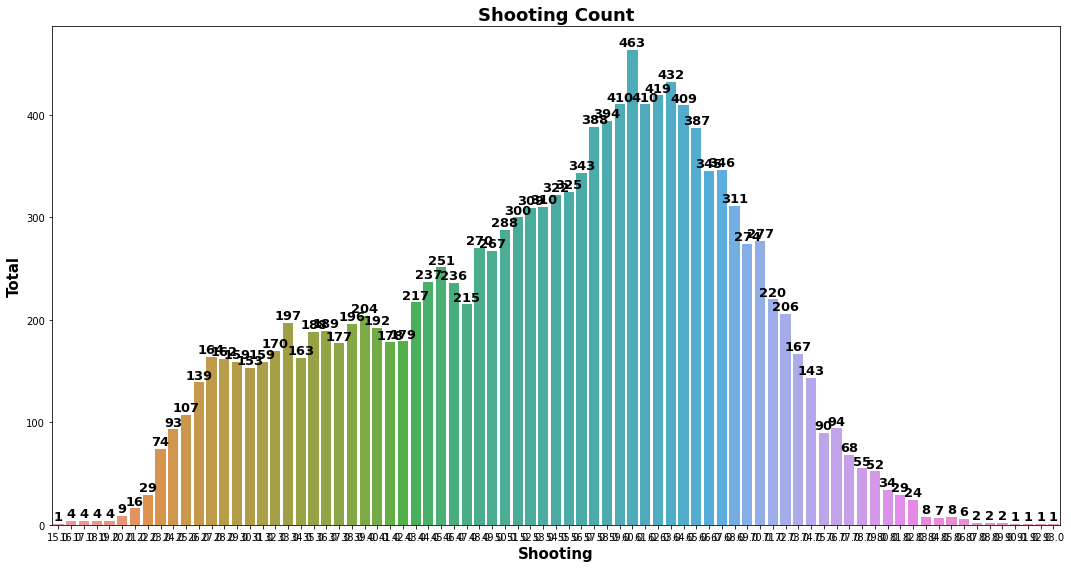

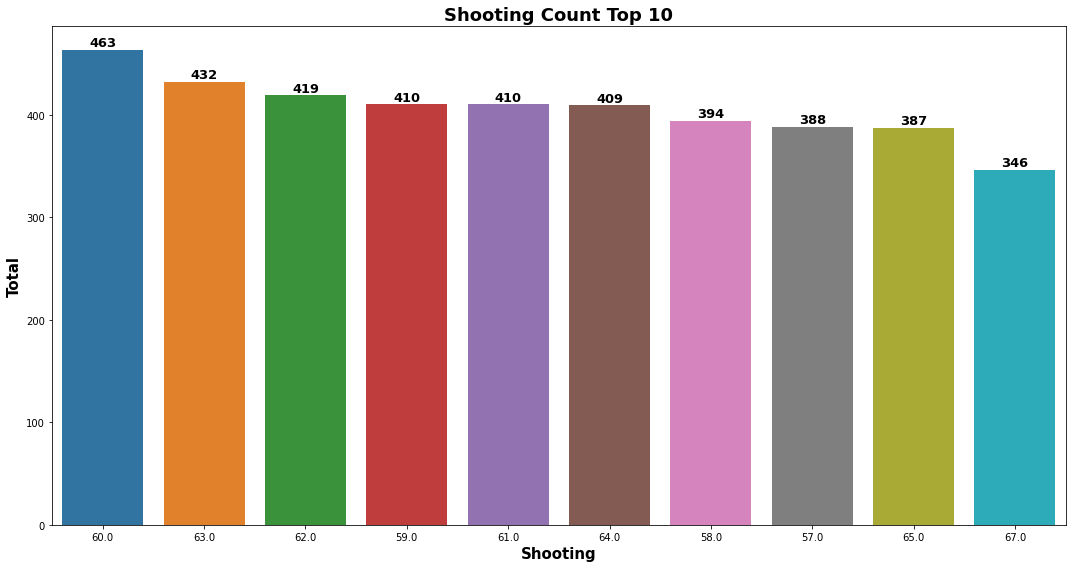

In [ ]:
barplot_analysis(data_col_float[3])

## Passing Analysis

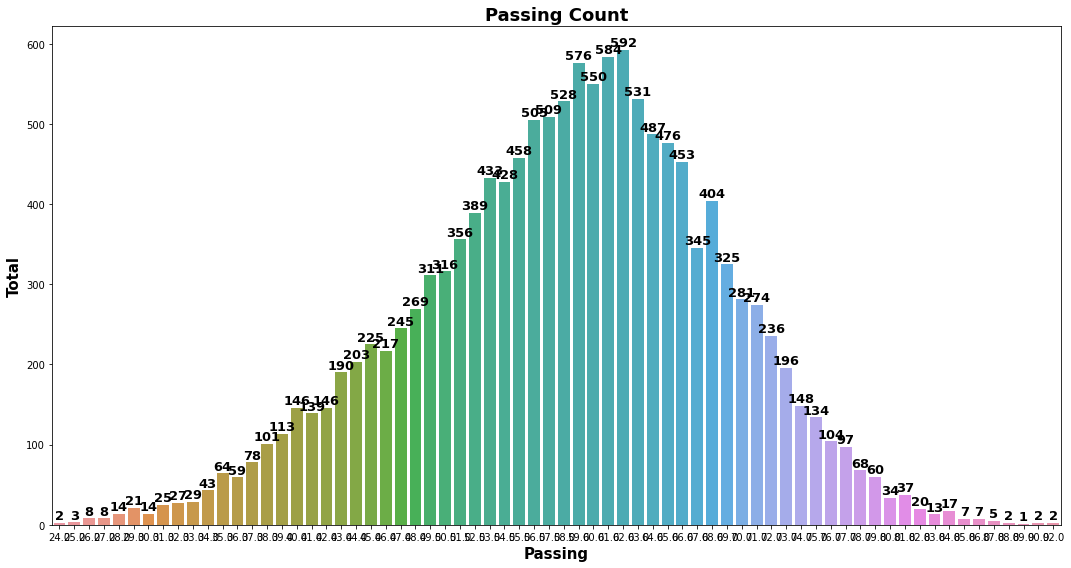

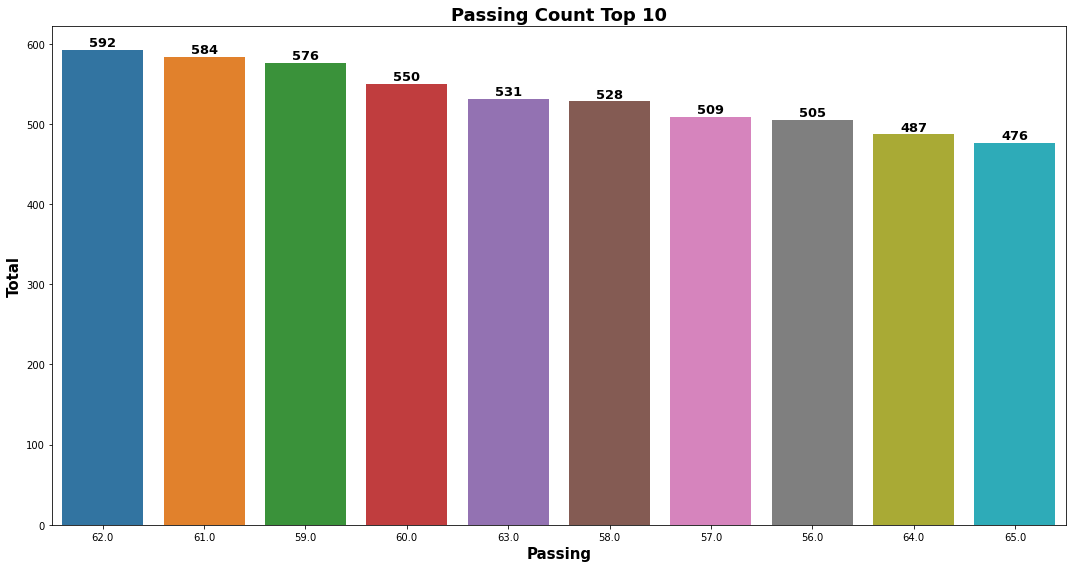

In [ ]:
barplot_analysis(data_col_float[4])

## Dribbling Analysis

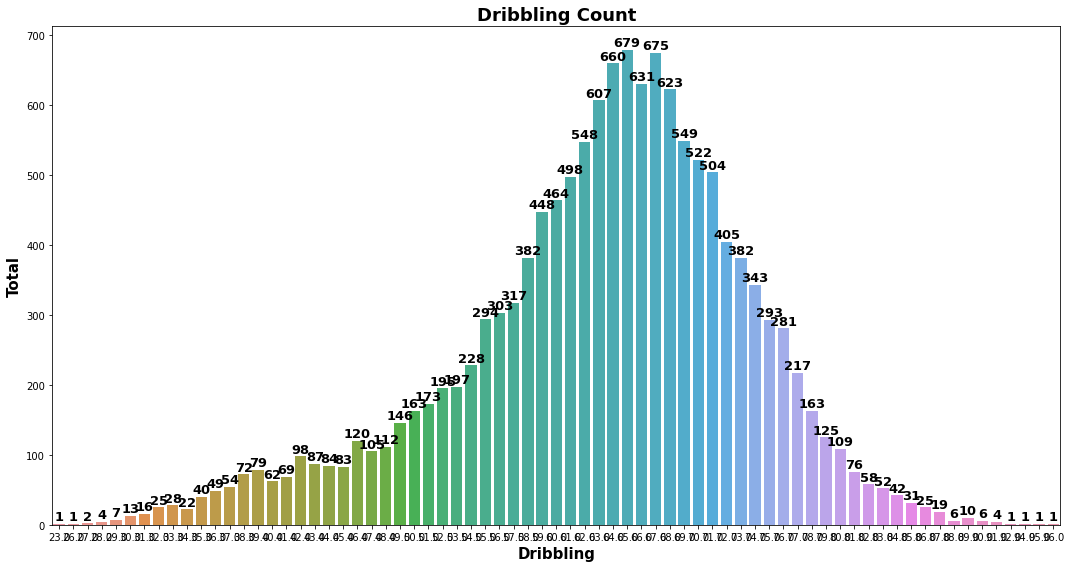

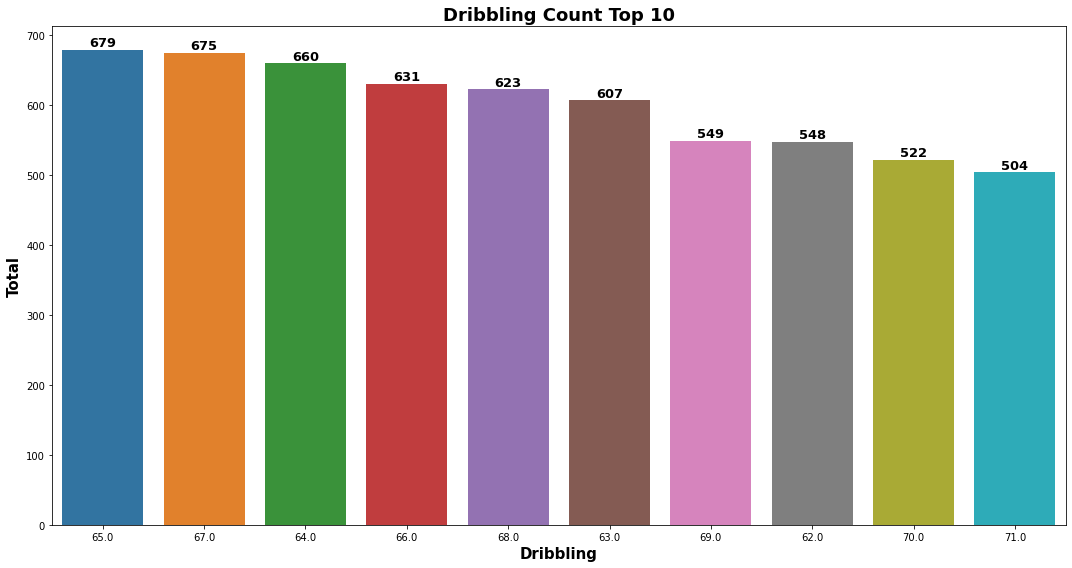

In [ ]:
barplot_analysis(data_col_float[5])

## Defending Analysis

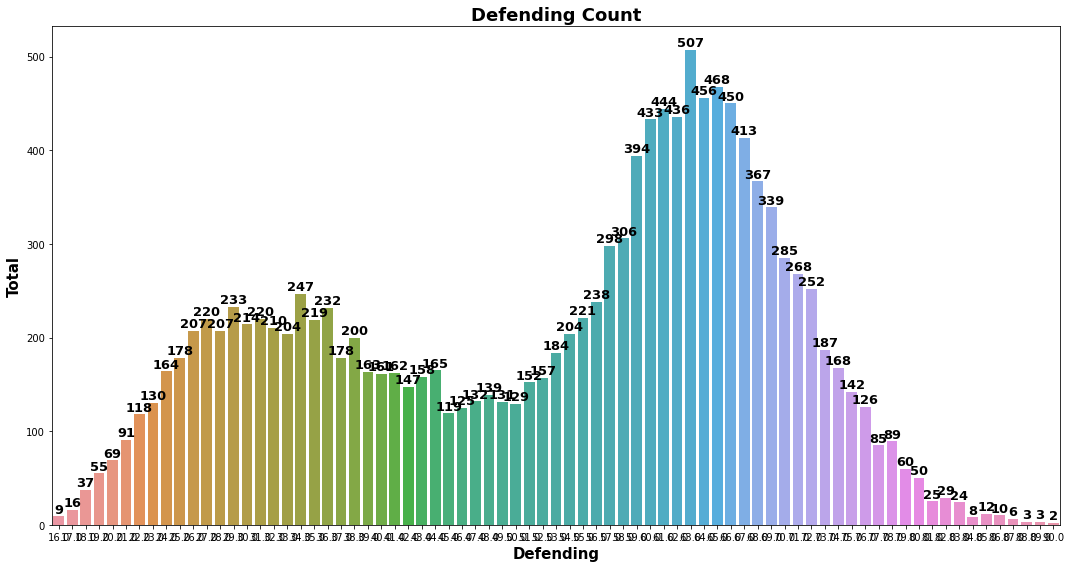

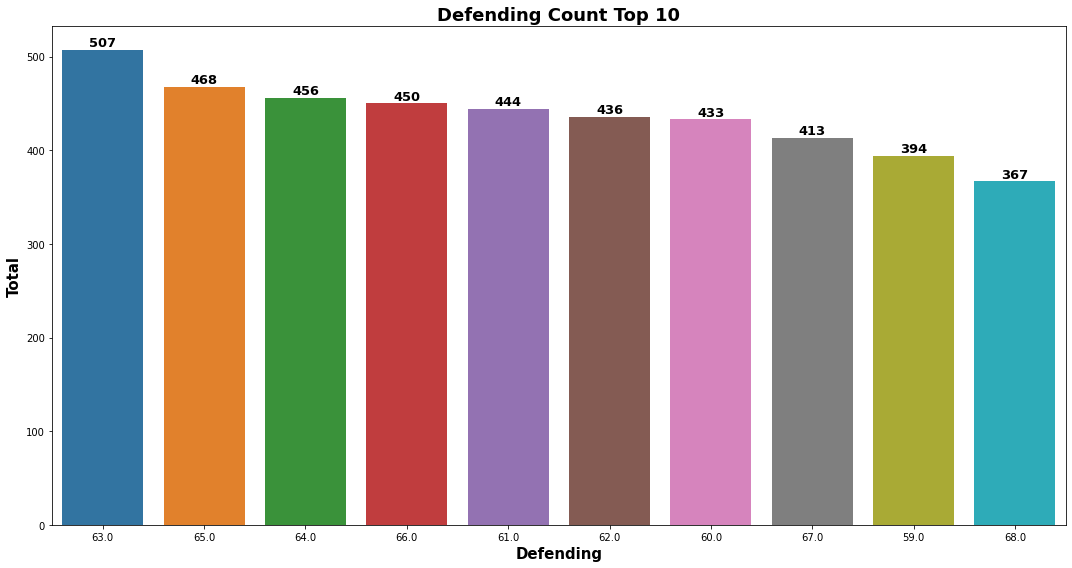

In [ ]:
barplot_analysis(data_col_float[6])

## Physic Analysis

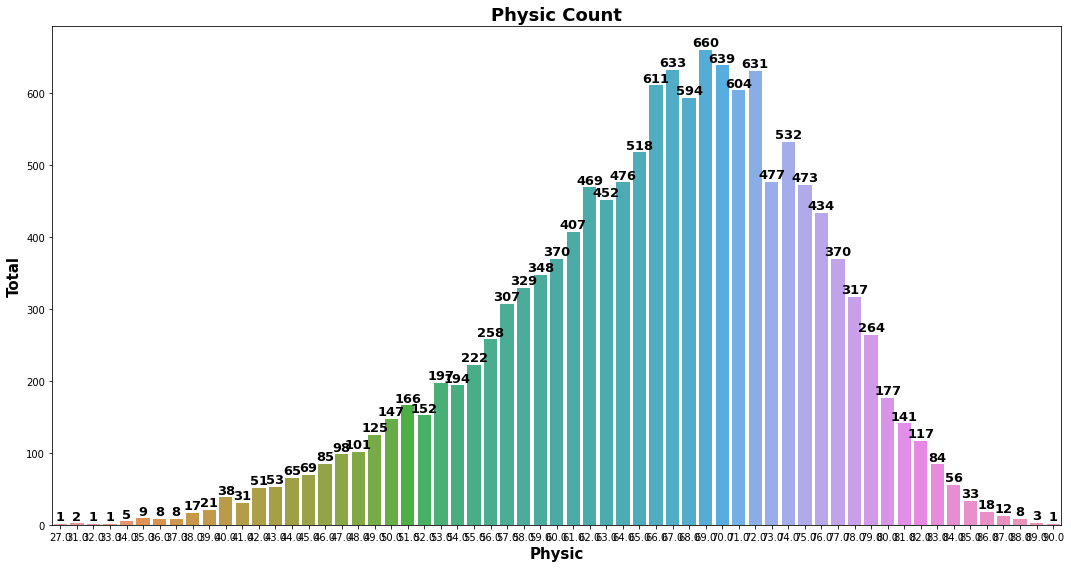

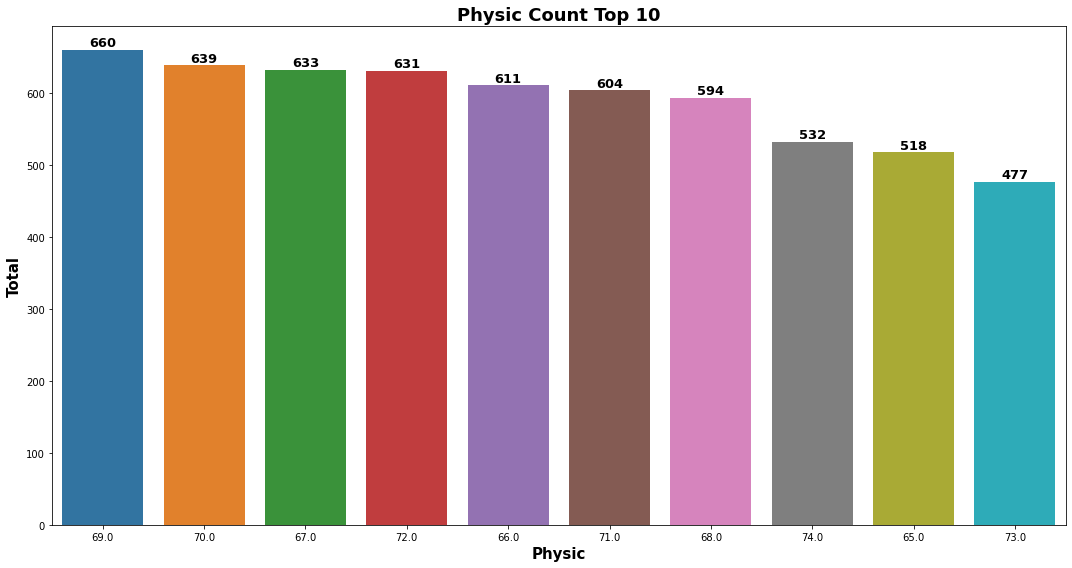

In [ ]:
barplot_analysis(data_col_float[7])

# Visualization Categorical Analysis

We will not use short_name, club, loaned_from and positions

In [ ]:
data_col_category

['short_name',
 'nationality',
 'club',
 'player_positions',
 'work_rate',
 'body_type',
 'team_position',
 'loaned_from',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

## Nationality Analysis

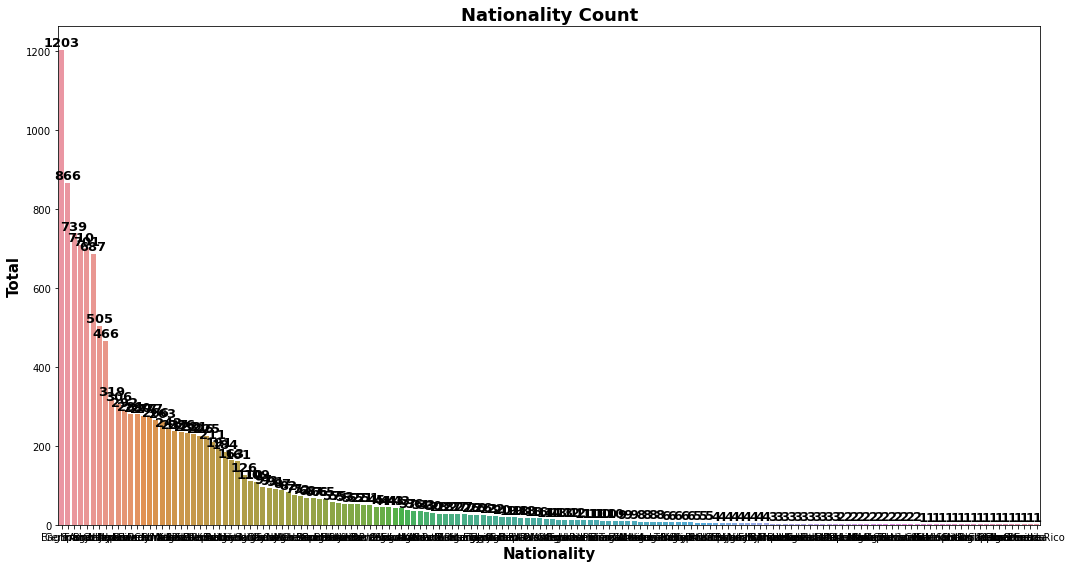

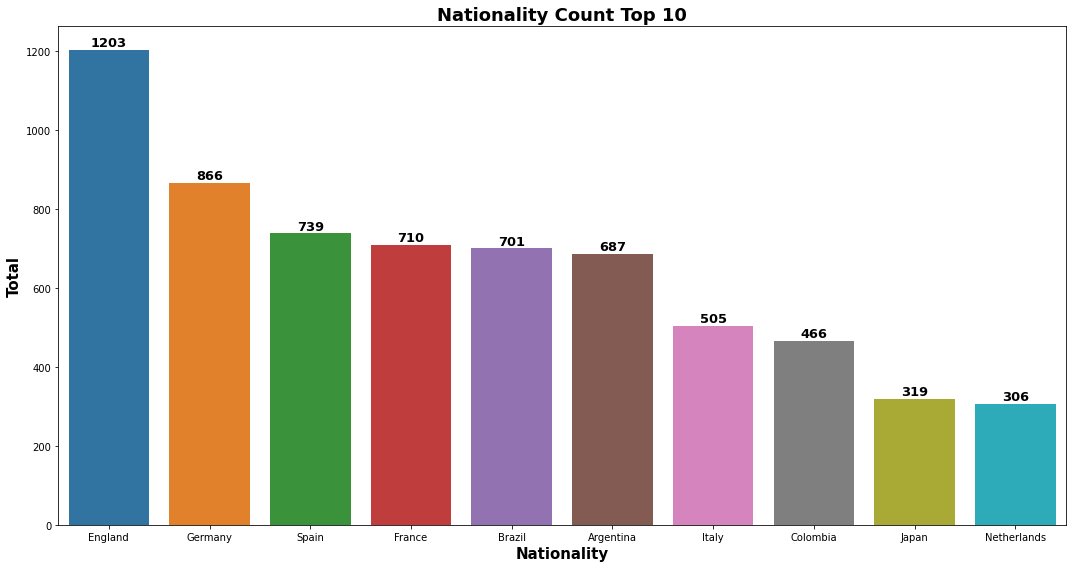

In [ ]:
barplot_analysis(data_col_category[1])

## Player_positions Analysis

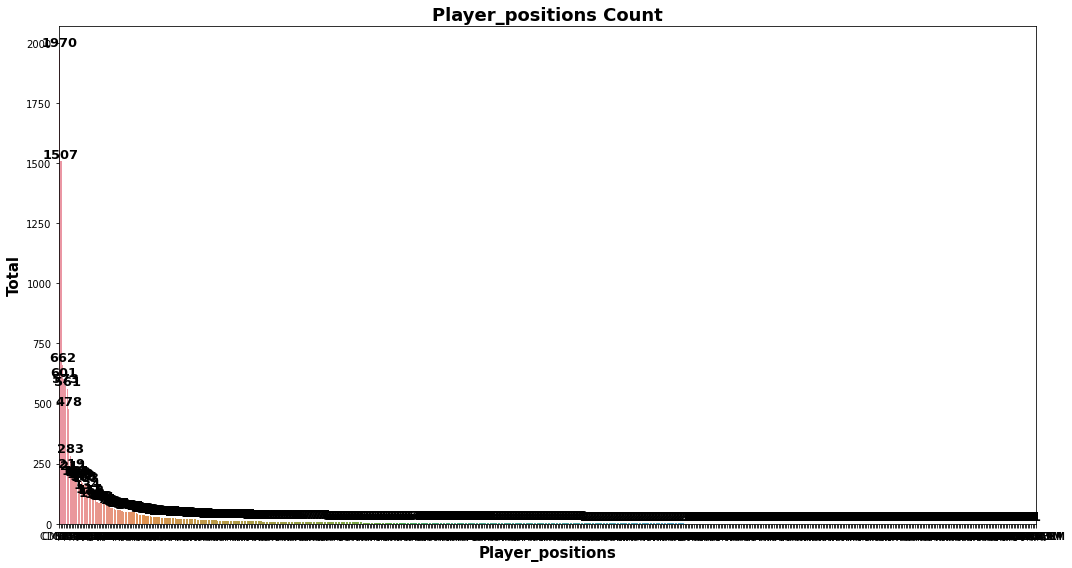

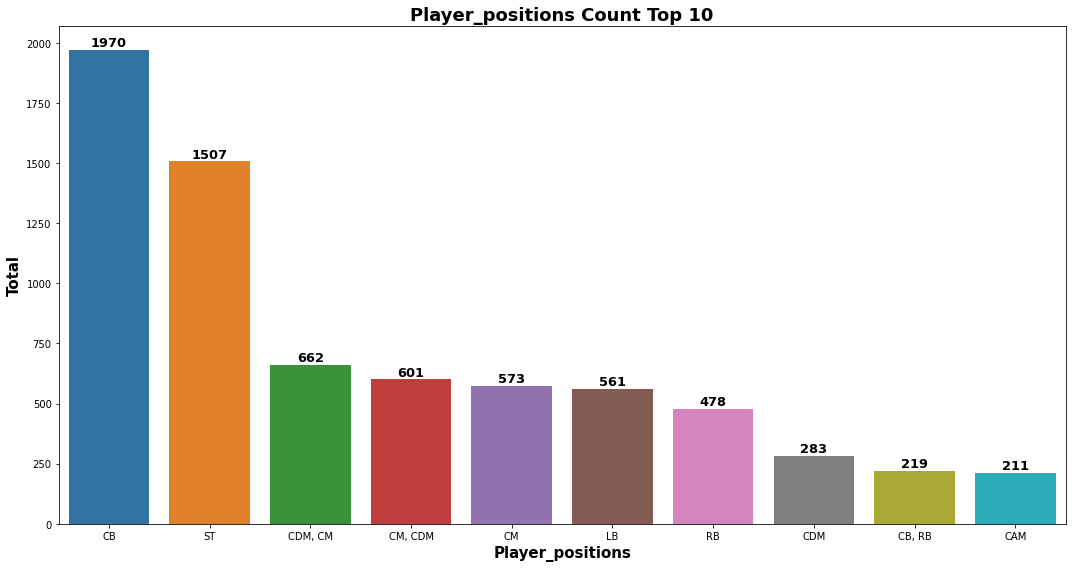

In [ ]:
barplot_analysis(data_col_category[3])

## Work_rate Analysis

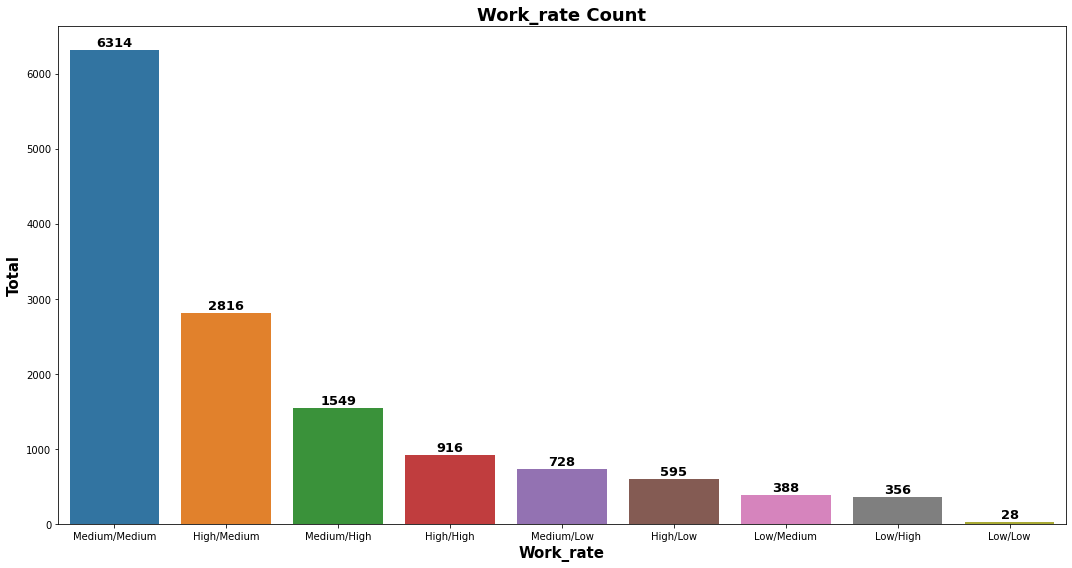

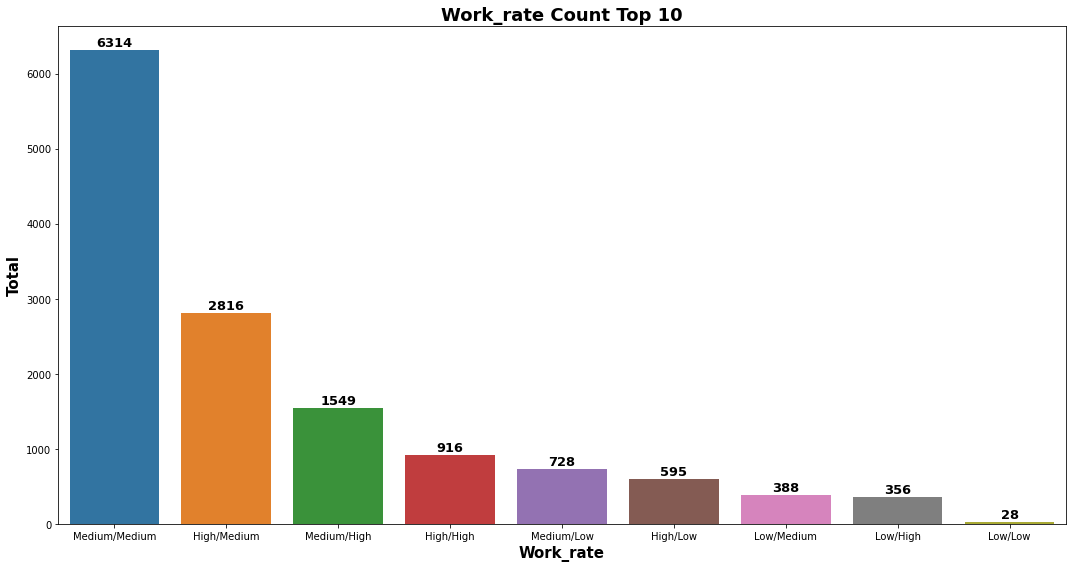

In [ ]:
barplot_analysis(data_col_category[4])

## Body_type Analysis

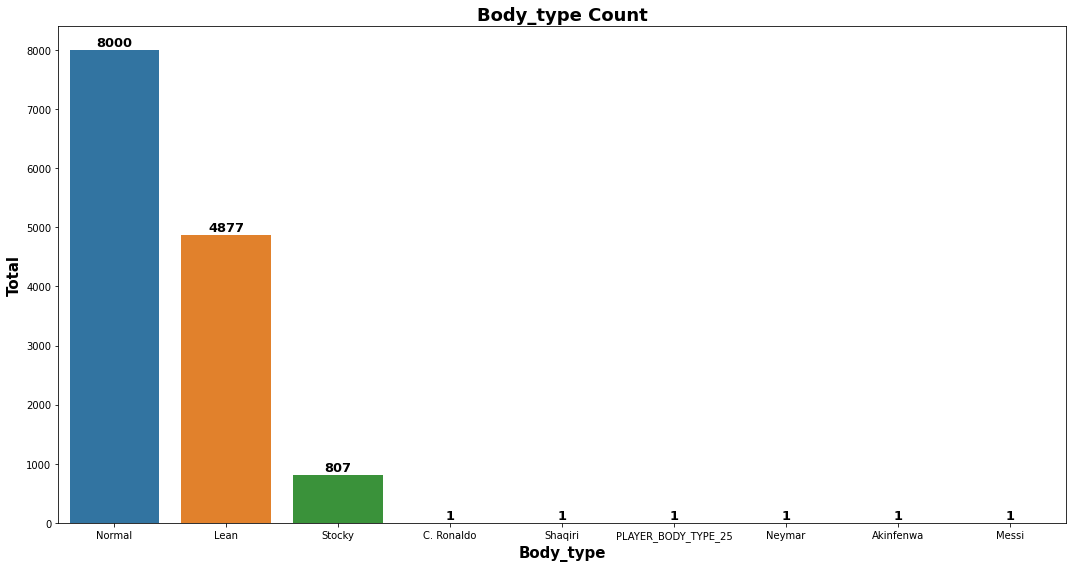

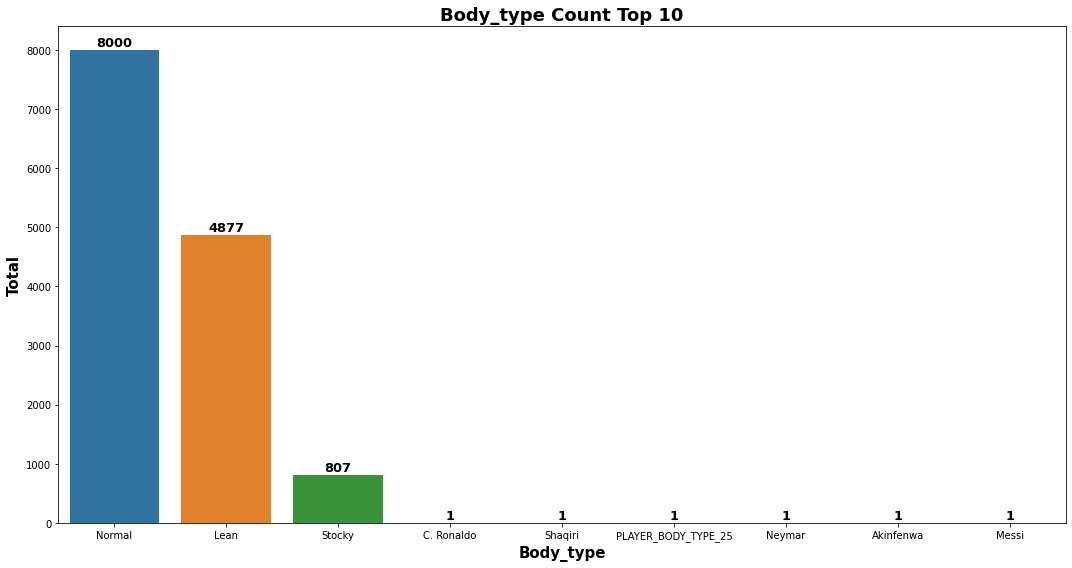

In [ ]:
barplot_analysis(data_col_category[5])

## Team_position Analysis

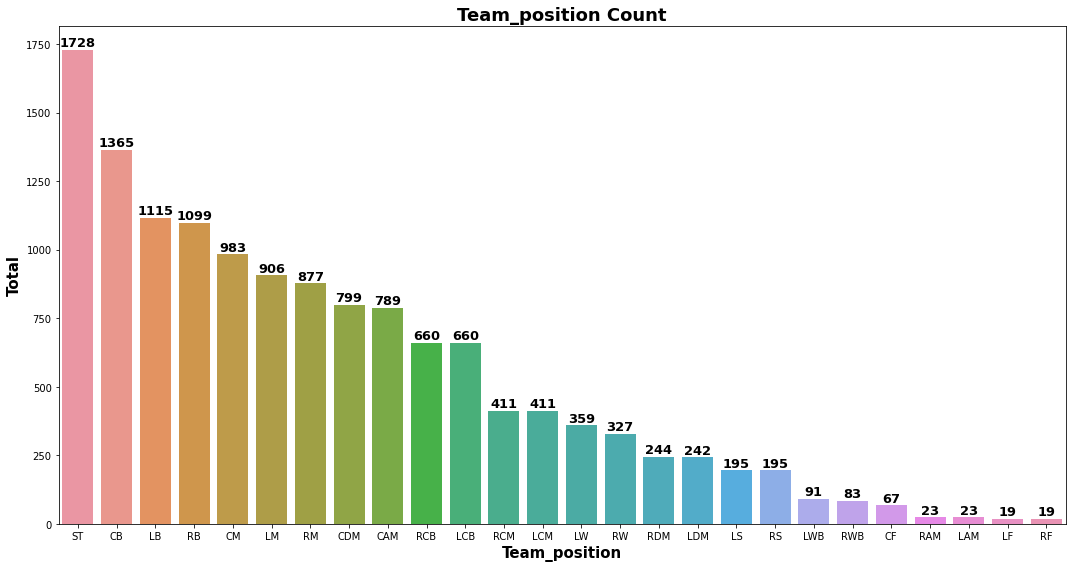

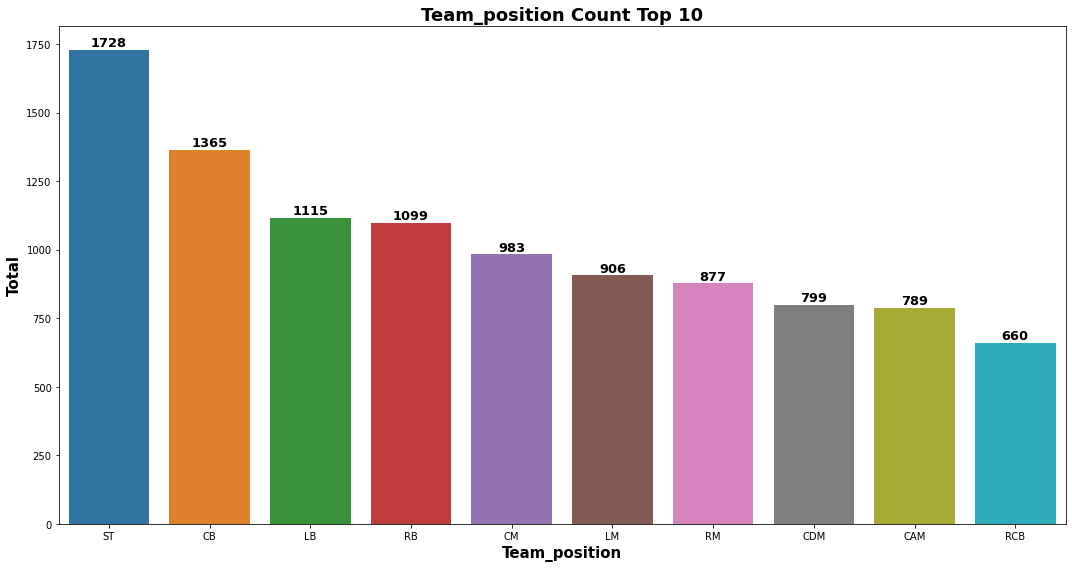

In [ ]:
barplot_analysis(data_col_category[6])

# Bivariate Analysis

## Bivariate numerical analysis based on age

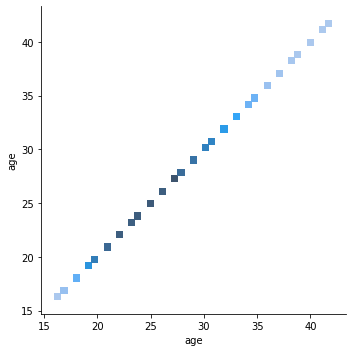

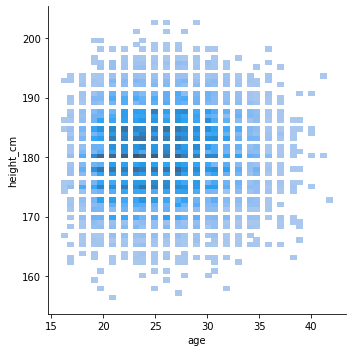

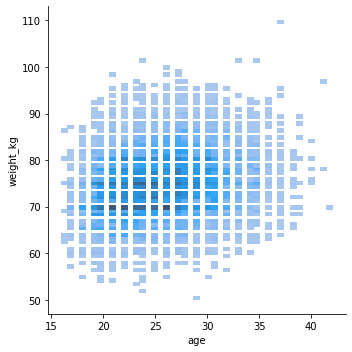

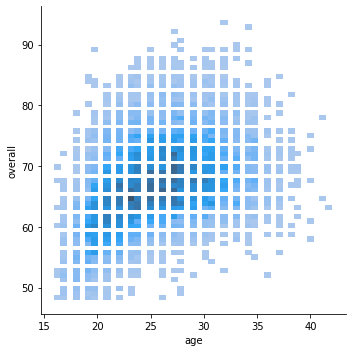

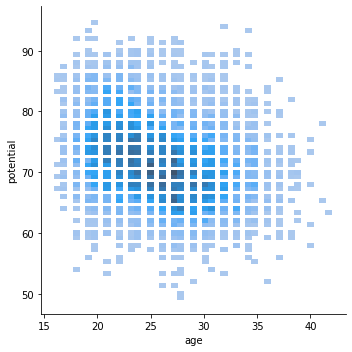

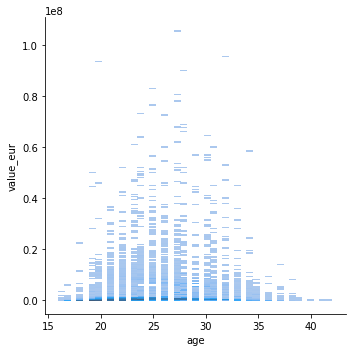

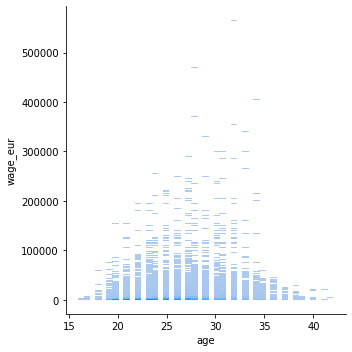

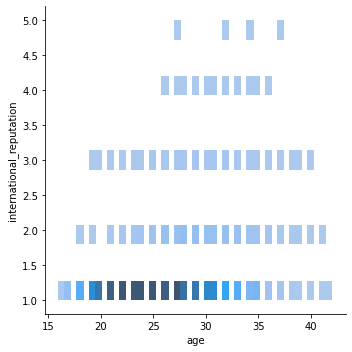

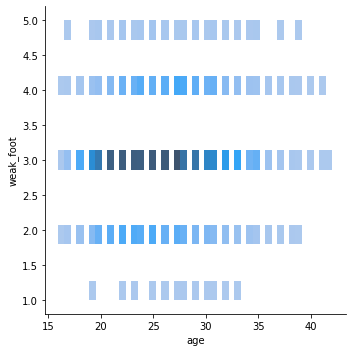

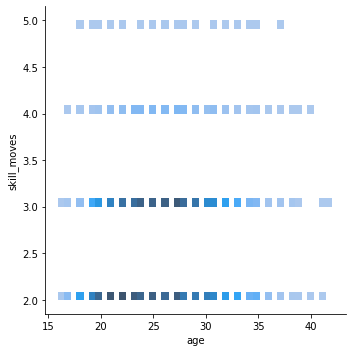

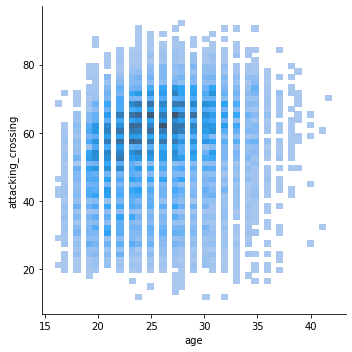

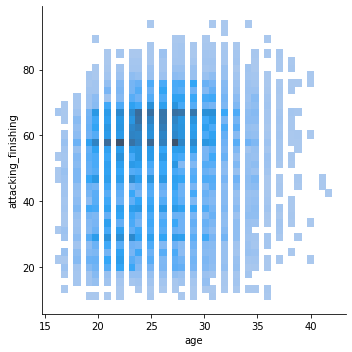

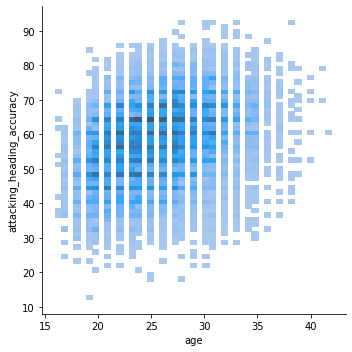

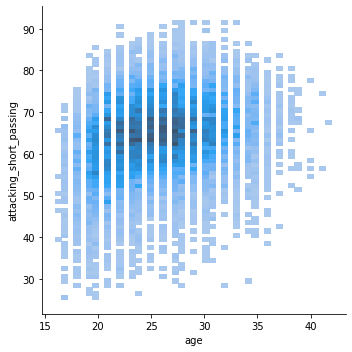

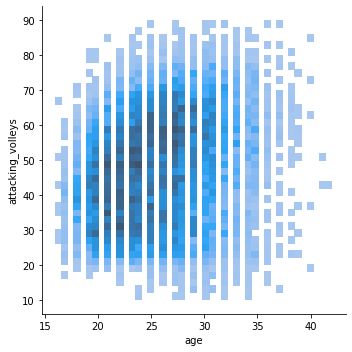

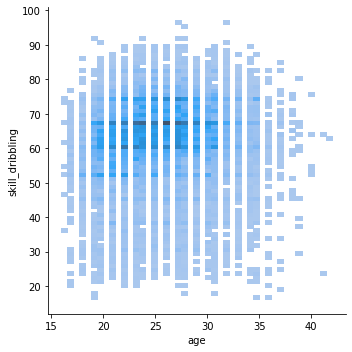

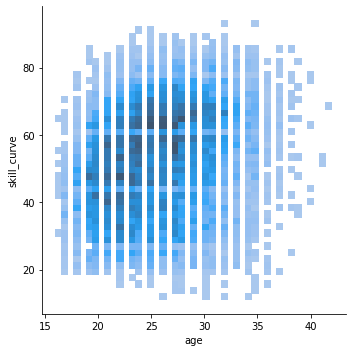

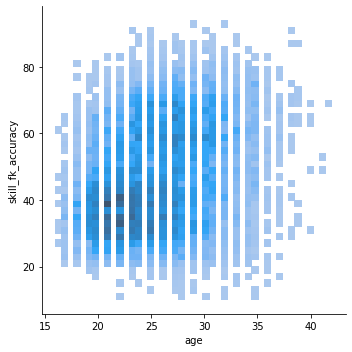

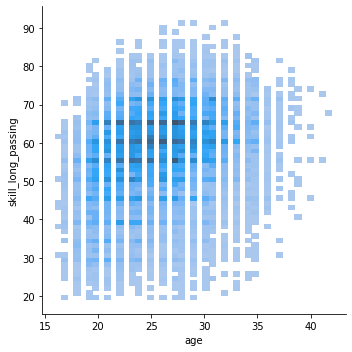

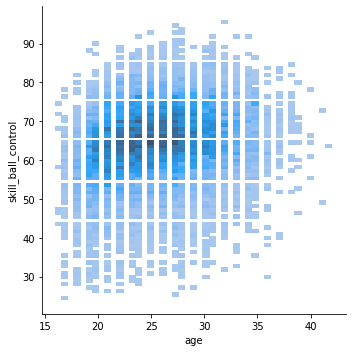

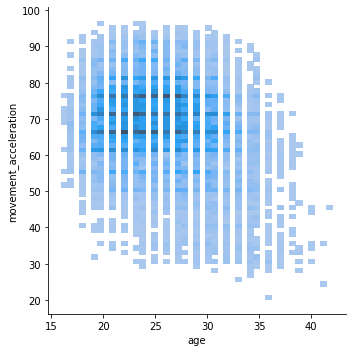

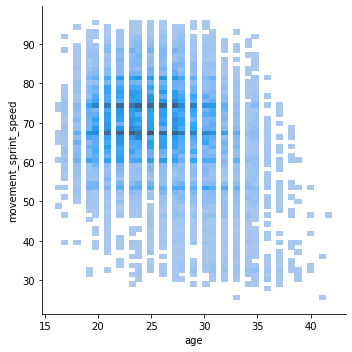

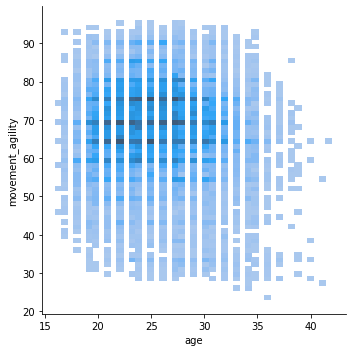

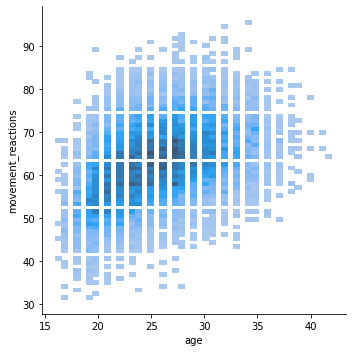

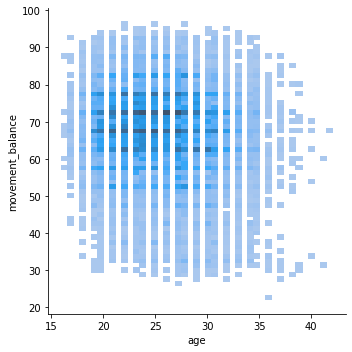

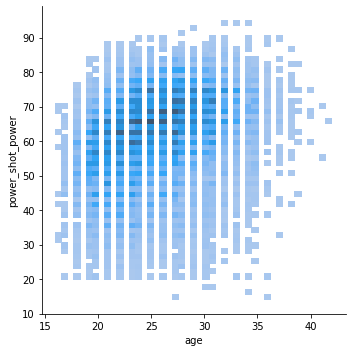

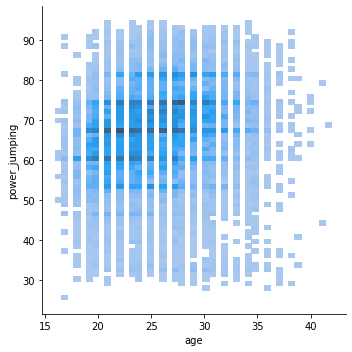

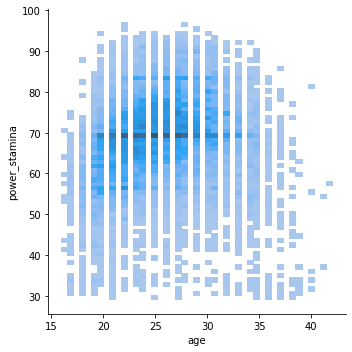

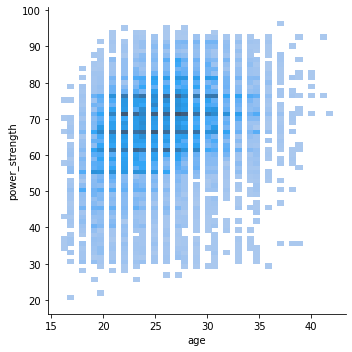

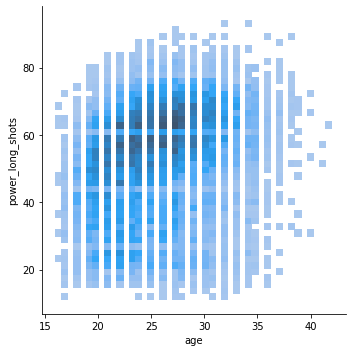

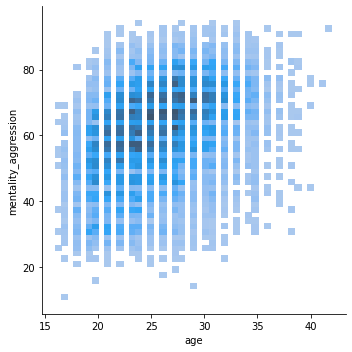

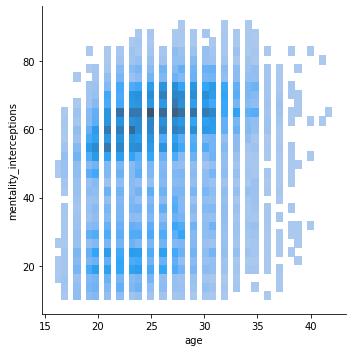

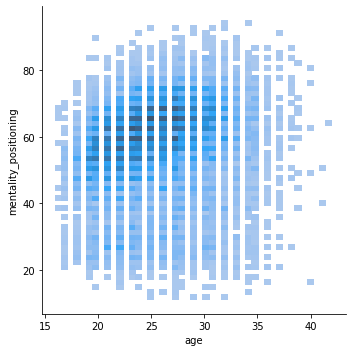

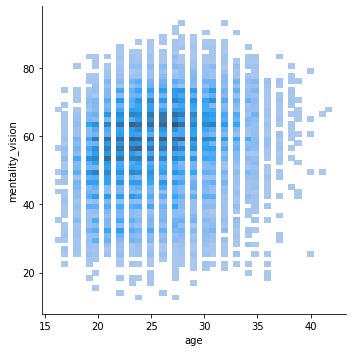

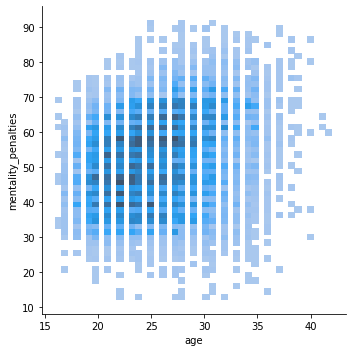

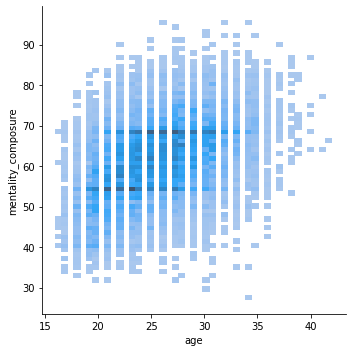

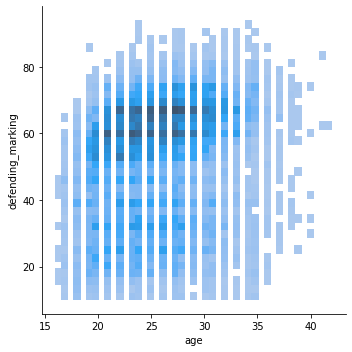

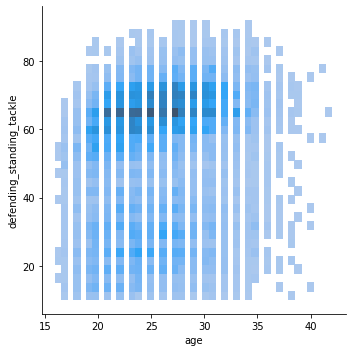

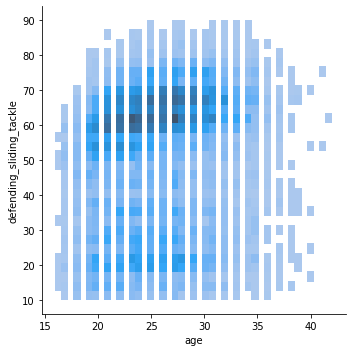

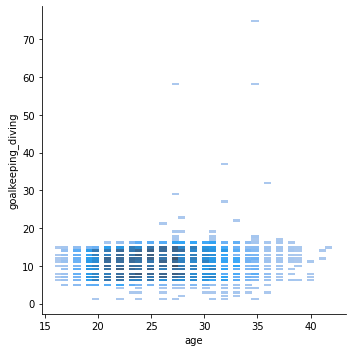

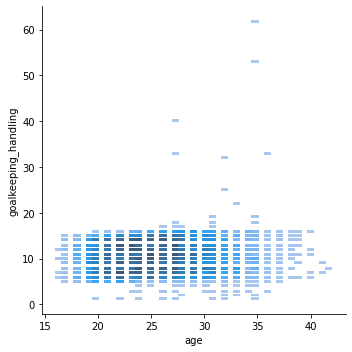

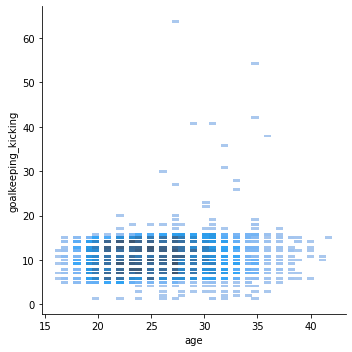

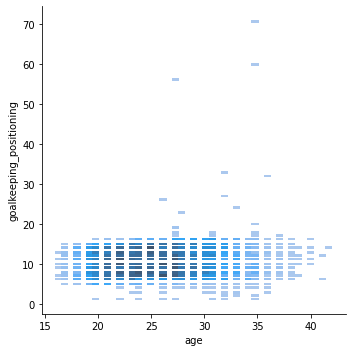

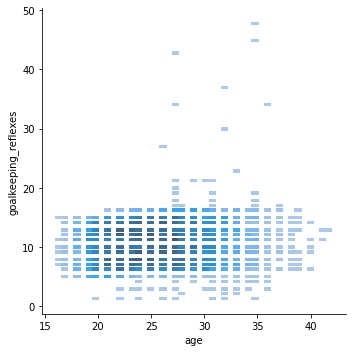

In [ ]:
for i in range (0,len(data_col_numeric)):
    sns.displot(new_data, x=new_data['age'], y=new_data[data_col_numeric[i]])

## Bivariate numerical analysis based on overall

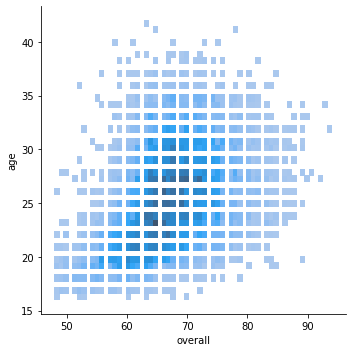

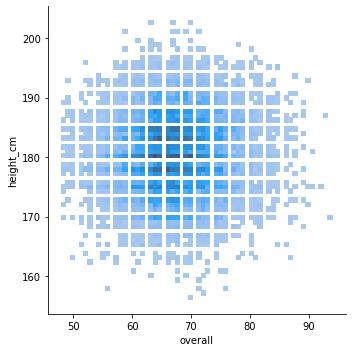

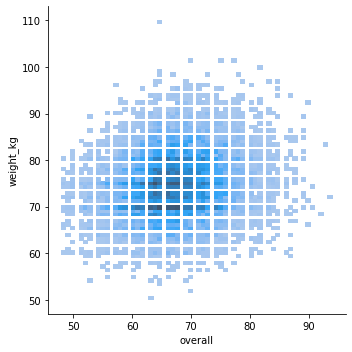

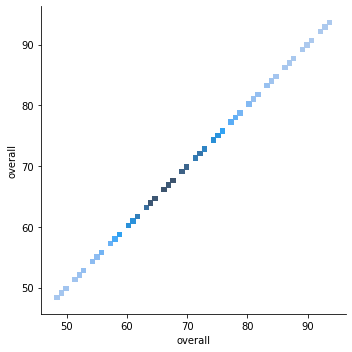

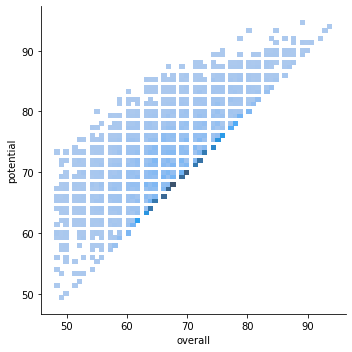

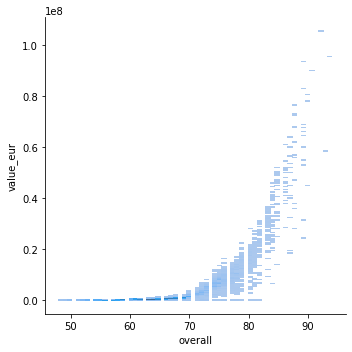

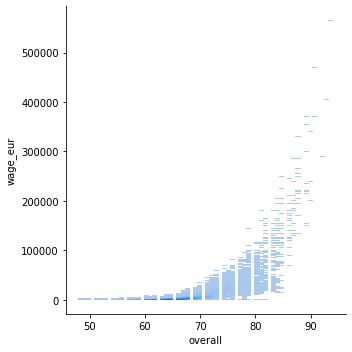

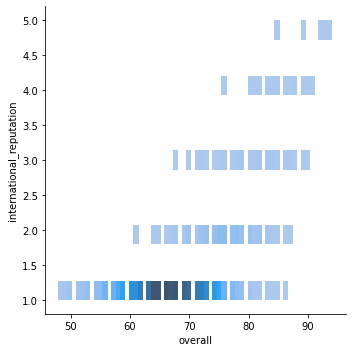

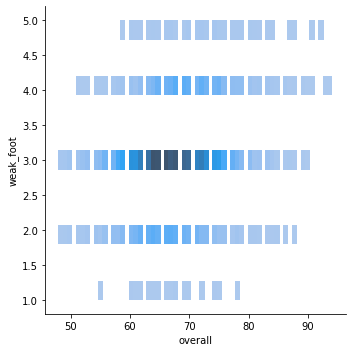

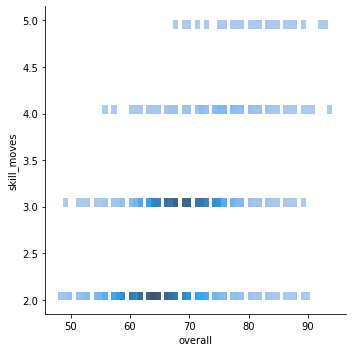

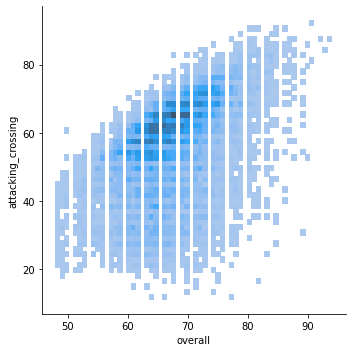

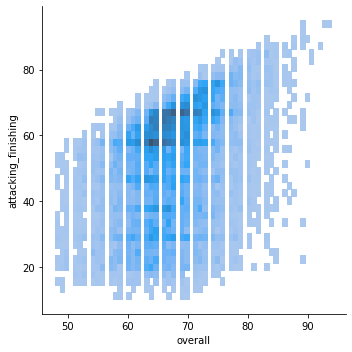

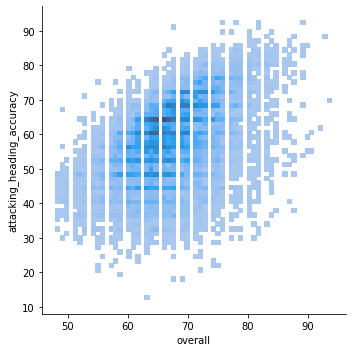

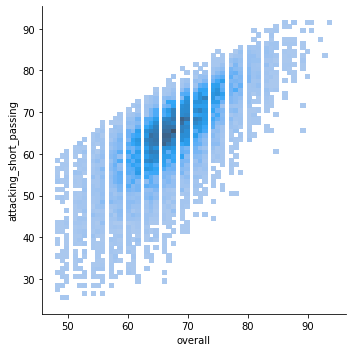

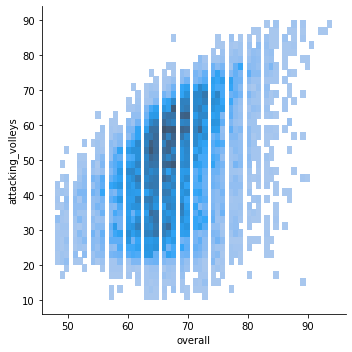

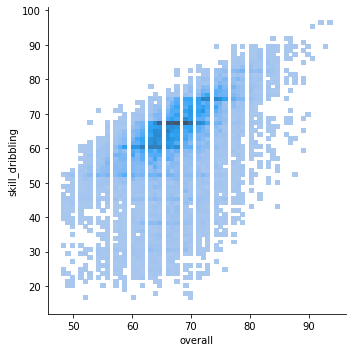

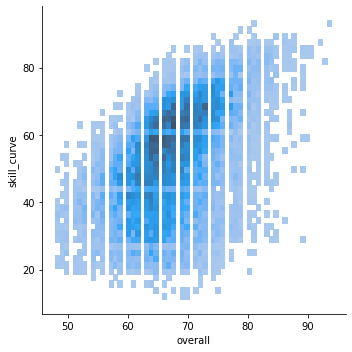

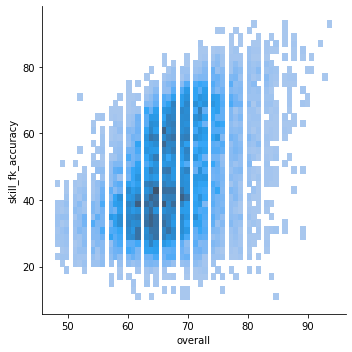

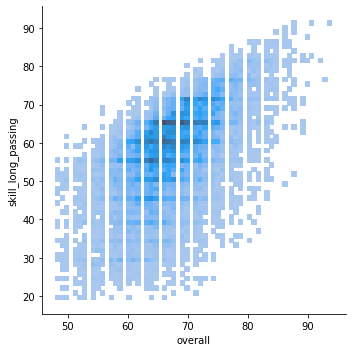

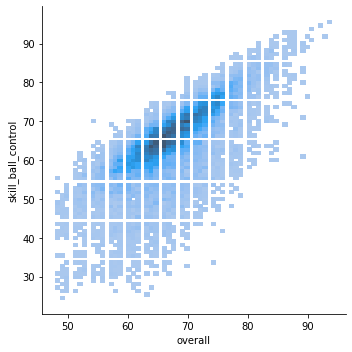

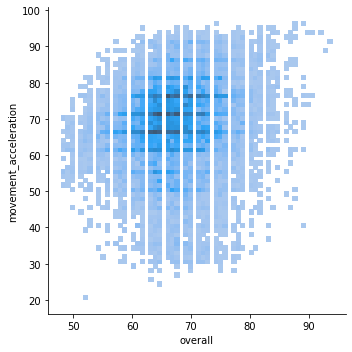

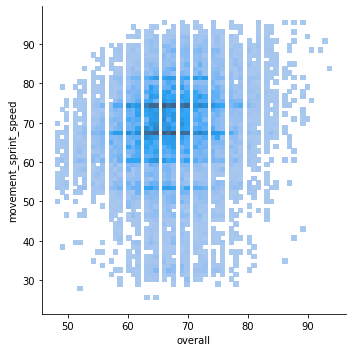

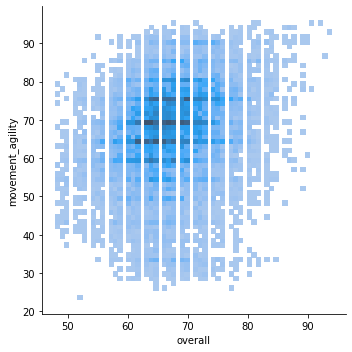

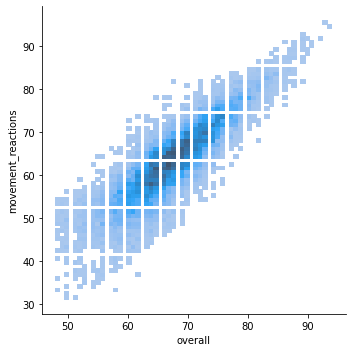

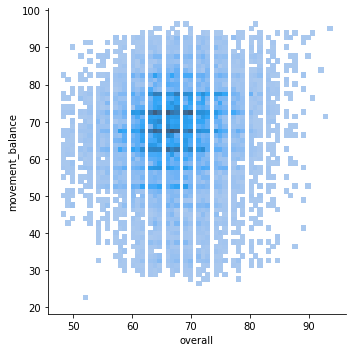

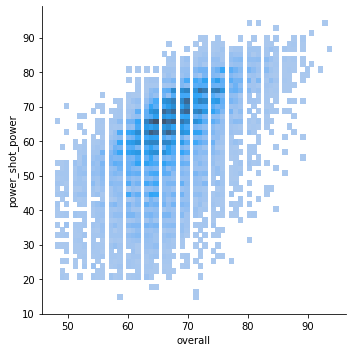

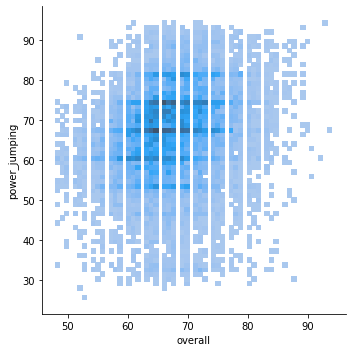

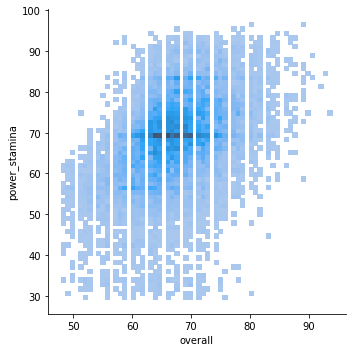

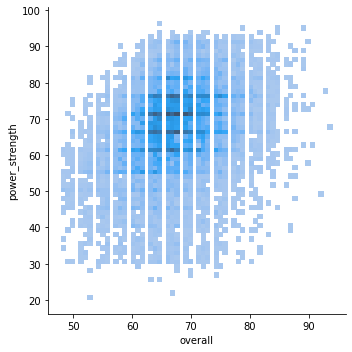

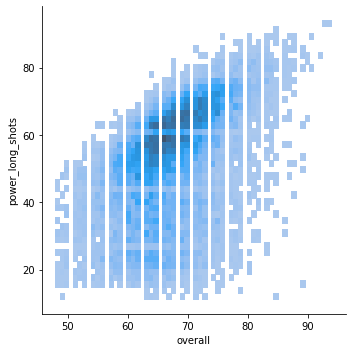

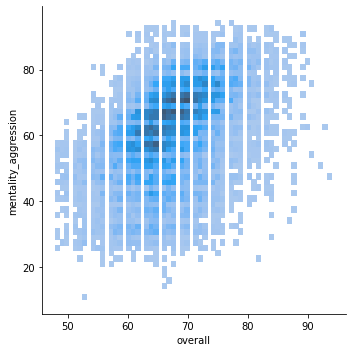

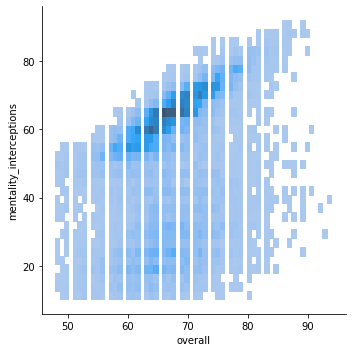

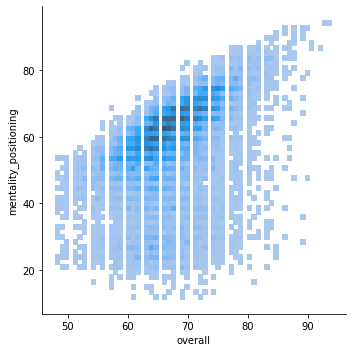

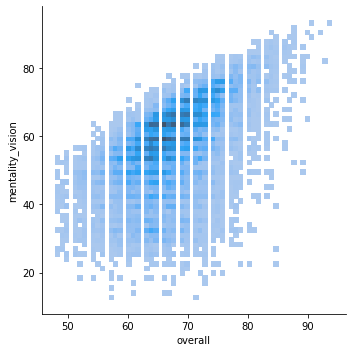

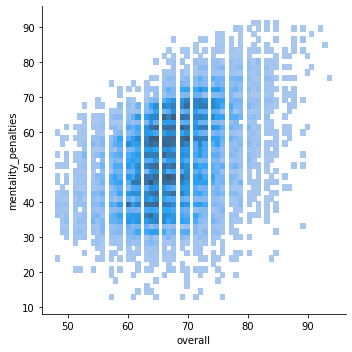

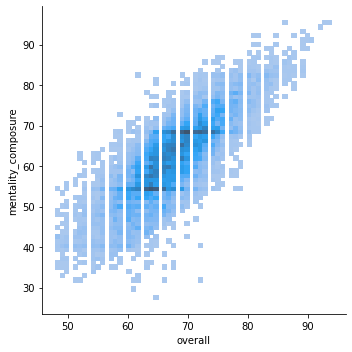

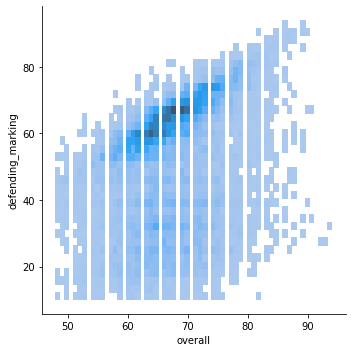

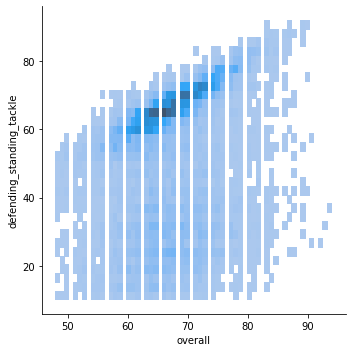

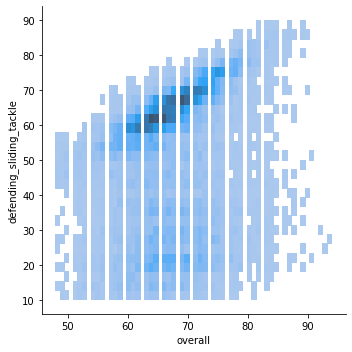

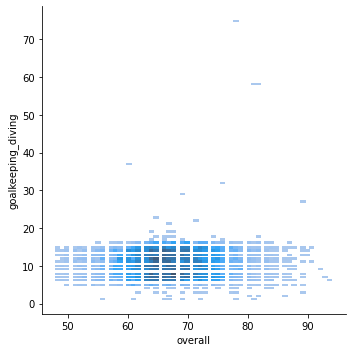

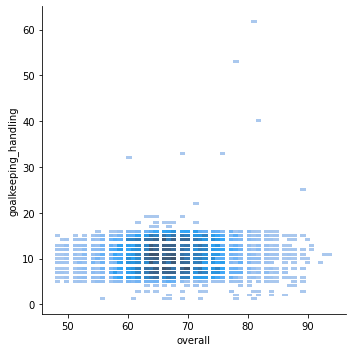

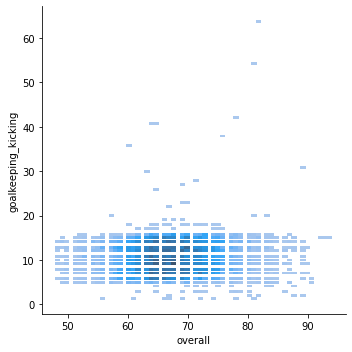

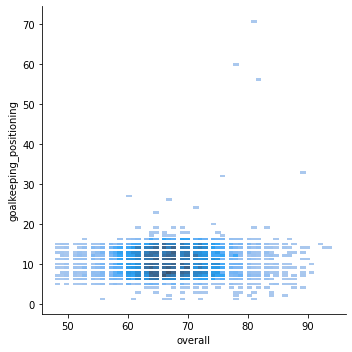

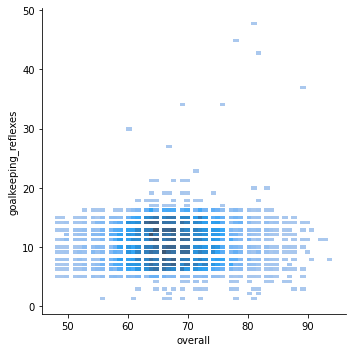

In [ ]:
for i in range (0,len(data_col_numeric)):
    sns.displot(new_data, x=new_data['overall'], y=new_data[data_col_numeric[i]])

## Bivariate float analysis based on age

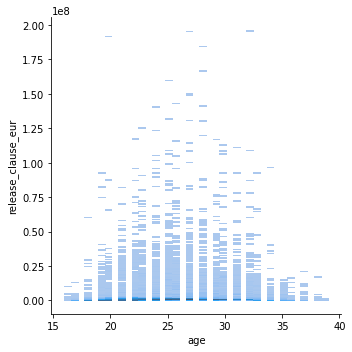

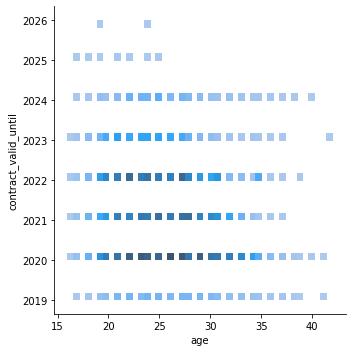

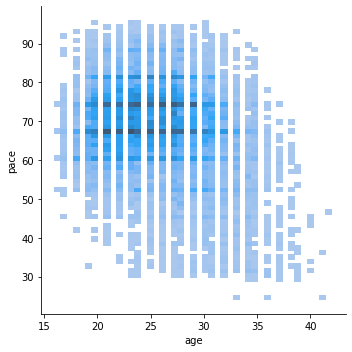

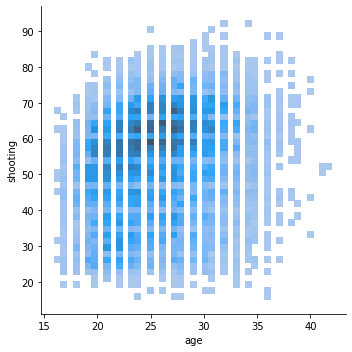

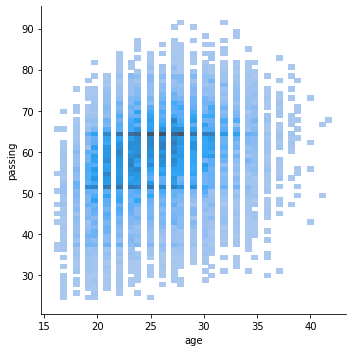

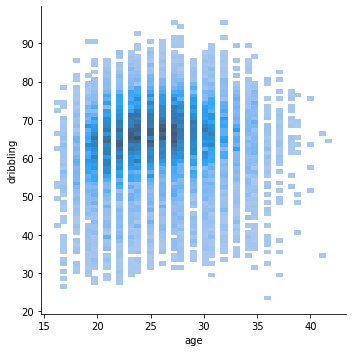

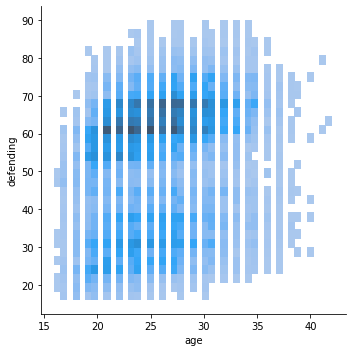

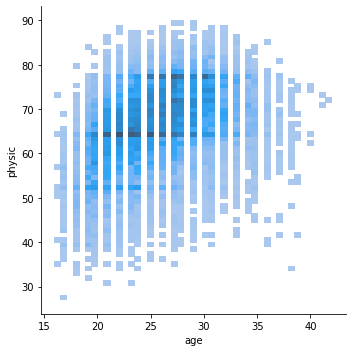

In [ ]:
for i in range (0,len(data_col_float)):
    sns.displot(new_data, x=new_data['age'], y=new_data[data_col_float[i]])

## Bivariate float analysis based on overall

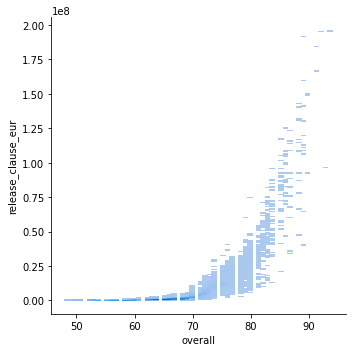

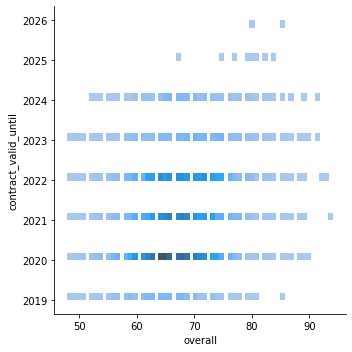

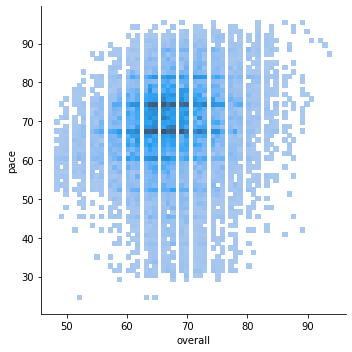

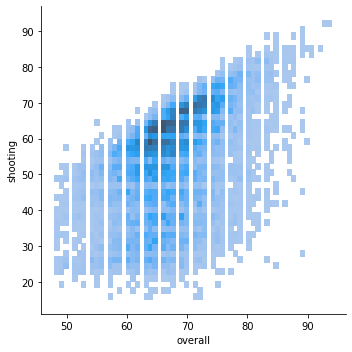

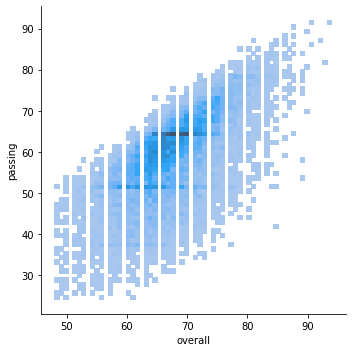

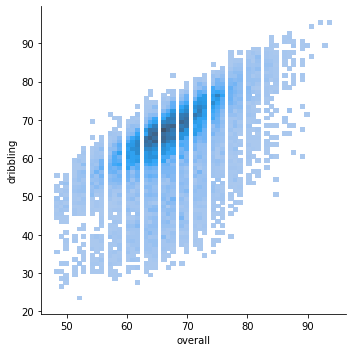

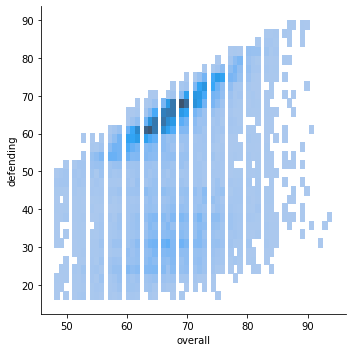

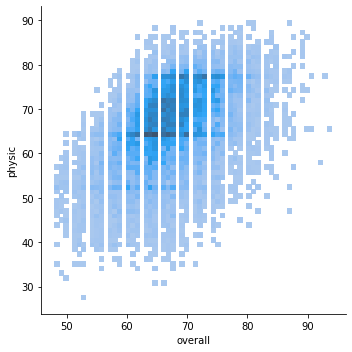

In [ ]:
for i in range (0,len(data_col_float)):
    sns.displot(new_data, x=new_data['overall'], y=new_data[data_col_float[i]])